# Mini Projeto 1 - Perceptron e Redes Neurais

Projeto para o módulo de Redes Neurais

Professor: Sandro Saorin

Aluno: Diolan Godinho

## Contextualização

Para resolver o primeiro mini projeto, o aluno ou o grupo de alunos (grupo de no máximo 3 pessoas) devem escolher um dos datasets indicados no Drive da turma para realizar o projeto. A partir do dataset escolhido, desenvolva os itens abaixo:

A) (10 pontos) Desenvolva uma análise exploratória dos dados adequada;

B) (5 pontos) Faça a preparação dos dados para treinar os modelos;

C) (15 pontos) Teste pelo menos 3 modelos de Machine Learning convencional, sendo algumas sugestões como Regressão Logística, Árvore de Decisão, Random Forest entre outros;

D) (30 pontos) Desenvolva uma rede neural Perceptron para fazer a separação entre as classes. O modelo consegue fazer a separação linear dos dados? Avaliar utilizando o PCA caso necessário;

E) (30 pontos) Monte duas redes neurais MLP utilizando combinações de camadas diferentes (teste algumas combinações para chegar em uma melhor performance dos resultados).

F) (10 pontos) Qual dos modelos teve a melhor performance entre os modelos convencionais, Perceptron e MLP? Discuta um pouco a respeito.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_theme()

# pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.options.display.float_format = '{:,.6f}'.format

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

## Análise Exploratória

In [2]:
df = pd.read_csv('./Dados/sports.csv')

In [3]:
df

Name  GamesPlayed  MinutesPlayed  PointsPerGame  \
0      Brandon Ingram           36      27.400000       7.400000   
1     Andrew Harrison           35      26.900000       7.200000   
2      JaKarr Sampson           74      15.300000       5.200000   
3         Malik Sealy           58      11.600000       5.700000   
4         Matt Geiger           48      11.500000       4.500000   
...               ...          ...            ...            ...   
1335      Chris Smith           80      15.800000       4.300000   
1336      Brent Price           68      12.600000       3.900000   
1337     Marlon Maxey           43      12.100000       5.400000   
1338  Litterial Green           52      12.000000       4.500000   
1339        Jon Barry           47      11.700000       4.400000   

      FieldGoalsMade  FieldGoalsAttempt  FieldGoalPercent  3PointMade  \
0           2.600000           7.600000         34.700000    0.500000   
1           2.000000           6.700000         29.600000    0.700000   
2           2.000000           4.700000         42.200000    0.400000   
3           2.300000           5.500000         42.600000    0.100000   
4           1.600000           3.000000         52.400000    0.000000   
...              ...                ...               ...         ...   
1335        1.600000           3.600000         43.300000    0.000000   
1336        1.500000           4.100000         35.800000    0.100000   
1337        2.200000           3.900000         55.000000    0.000000   
1338        1.700000           3.800000         43.900000    0.000000   
1339        1.600000           4.400000         36.900000    0.400000   

      3PointAttempt  3PointPercent  ...  FreeThrowAttempt  FreeThrowPercent  \
0          2.100000      25.000000  ...          2.300000         69.900000   
1          2.800000      23.500000  ...          3.400000         76.500000   
2          1.700000      24.400000  ...          1.300000         67.000000   
3          0.500000      22.600000  ...          1.300000         68.900000   
4          0.100000       0.000000  ...          1.900000         67.400000   
...             ...            ...  ...               ...               ...   
1335       0.200000      14.300000  ...          1.500000         79.200000   
1336       0.700000      16.700000  ...          1.000000         79.400000   
1337       0.000000       0.000000  ...          1.600000         64.300000   
1338       0.200000      10.000000  ...          1.800000         62.500000   
1339       1.300000      33.300000  ...          1.000000         67.300000   

      OffensiveRebounds  DefensiveRebounds  Rebounds  Assists   Steals  \
0              0.700000           3.400000  4.100000 1.900000 0.400000   
1              0.500000           2.000000  2.400000 3.700000 1.100000   
2              0.500000           1.700000  2.200000 1.000000 0.500000   
3              1.000000           0.900000  1.900000 0.800000 0.600000   
4              1.000000           1.500000  2.500000 0.300000 0.300000   
...                 ...                ...       ...      ...      ...   
1335           0.400000           0.800000  1.200000 2.500000 0.600000   
1336           0.400000           1.100000  1.500000 2.300000 0.800000   
1337           1.500000           2.300000  3.800000 0.300000 0.300000   
1338           0.200000           0.400000  0.700000 2.200000 0.400000   
1339           0.200000           0.700000  0.900000 1.400000 0.700000   

       Blocks  Turnovers  Target  
0    0.400000   1.300000       0  
1    0.500000   1.600000       0  
2    0.300000   1.000000       0  
3    0.100000   1.000000       1  
4    0.400000   0.800000       1  
...       ...        ...     ...  
1335 0.200000   0.800000       0  
1336 0.000000   1.300000       1  
1337 0.400000   0.900000       0  
1338 0.100000   0.800000       1  
1339 0.100000   0.900000       1  

[1340 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1340 non-null   object 
 1   GamesPlayed        1340 non-null   int64  
 2   MinutesPlayed      1340 non-null   float64
 3   PointsPerGame      1340 non-null   float64
 4   FieldGoalsMade     1340 non-null   float64
 5   FieldGoalsAttempt  1340 non-null   float64
 6   FieldGoalPercent   1340 non-null   float64
 7   3PointMade         1340 non-null   float64
 8   3PointAttempt      1340 non-null   float64
 9   3PointPercent      1329 non-null   float64
 10  FreeThrowMade      1340 non-null   float64
 11  FreeThrowAttempt   1340 non-null   float64
 12  FreeThrowPercent   1340 non-null   float64
 13  OffensiveRebounds  1340 non-null   float64
 14  DefensiveRebounds  1340 non-null   float64
 15  Rebounds           1340 non-null   float64
 16  Assists            1340 

Excetuando-se a variável *Name*, todas as demais são numéricas, incluindo o *Target*.

Portanto, não precisaremos realizar tranformações ou aplicar *enconders*.

In [5]:
df.isnull().sum()

Name                  0
GamesPlayed           0
MinutesPlayed         0
PointsPerGame         0
FieldGoalsMade        0
FieldGoalsAttempt     0
FieldGoalPercent      0
3PointMade            0
3PointAttempt         0
3PointPercent        11
FreeThrowMade         0
FreeThrowAttempt      0
FreeThrowPercent      0
OffensiveRebounds     0
DefensiveRebounds     0
Rebounds              0
Assists               0
Steals                0
Blocks                0
Turnovers             0
Target                0
dtype: int64

Apenas a variável *3PointPercent* possui dados faltantes e, mesmo assim, são bem poucos.

In [6]:
df.describe().T

count      mean       std       min       25%  \
GamesPlayed       1,340.000000 60.414179 17.433992 11.000000 47.000000   
MinutesPlayed     1,340.000000 17.624627  8.307964  3.100000 10.875000   
PointsPerGame     1,340.000000  6.801493  4.357545  0.700000  3.700000   
FieldGoalsMade    1,340.000000  2.629104  1.683555  0.300000  1.400000   
FieldGoalsAttempt 1,340.000000  5.885299  3.593488  0.800000  3.300000   
FieldGoalPercent  1,340.000000 44.169403  6.137679 23.800000 40.200000   
3PointMade        1,340.000000  0.247612  0.383688  0.000000  0.000000   
3PointAttempt     1,340.000000  0.779179  1.061847  0.000000  0.000000   
3PointPercent     1,329.000000 19.308126 16.022916  0.000000  0.000000   
FreeThrowMade     1,340.000000  1.297687  0.987246  0.000000  0.600000   
FreeThrowAttempt  1,340.000000  1.821940  1.322984  0.000000  0.900000   
FreeThrowPercent  1,340.000000 70.300299 10.578479  0.000000 64.700000   
OffensiveRebounds 1,340.000000  1.009403  0.777119  0.000000  0.400000   
DefensiveRebounds 1,340.000000  2.025746  1.360008  0.200000  1.000000   
Rebounds          1,340.000000  3.034478  2.057774  0.300000  1.500000   
Assists           1,340.000000  1.550522  1.471169  0.000000  0.600000   
Steals            1,340.000000  0.618507  0.409759  0.000000  0.300000   
Blocks            1,340.000000  0.368582  0.429049  0.000000  0.100000   
Turnovers         1,340.000000  1.193582  0.722541  0.100000  0.700000   
Target            1,340.000000  0.620149  0.485531  0.000000  0.000000   

                        50%       75%        max  
GamesPlayed       63.000000 77.000000  82.000000  
MinutesPlayed     16.100000 22.900000  40.900000  
PointsPerGame      5.550000  8.800000  28.200000  
FieldGoalsMade     2.100000  3.400000  10.200000  
FieldGoalsAttempt  4.800000  7.500000  19.800000  
FieldGoalPercent  44.100000 47.900000  73.700000  
3PointMade         0.100000  0.400000   2.300000  
3PointAttempt      0.300000  1.200000   6.500000  
3PointPercent     22.400000 32.500000 100.000000  
FreeThrowMade      1.000000  1.600000   7.700000  
FreeThrowAttempt   1.500000  2.300000  10.200000  
FreeThrowPercent  71.250000 77.600000 100.000000  
OffensiveRebounds  0.800000  1.400000   5.300000  
DefensiveRebounds  1.700000  2.600000   9.600000  
Rebounds           2.500000  4.000000  13.900000  
Assists            1.100000  2.000000  10.600000  
Steals             0.500000  0.800000   2.500000  
Blocks             0.200000  0.500000   3.900000  
Turnovers          1.000000  1.500000   4.400000  
Target             1.000000  1.000000   1.000000

Boa parte das variáveis são medidas estatísticas. Assim, em geral, as amplitudes não são muito grandes.

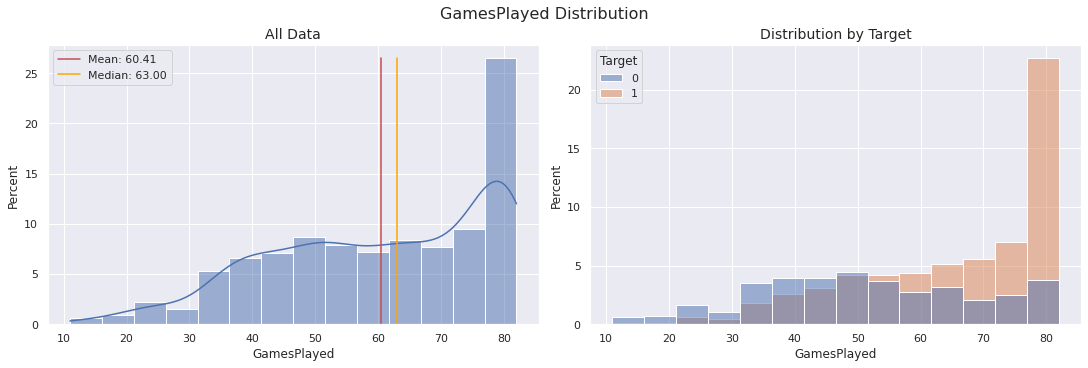

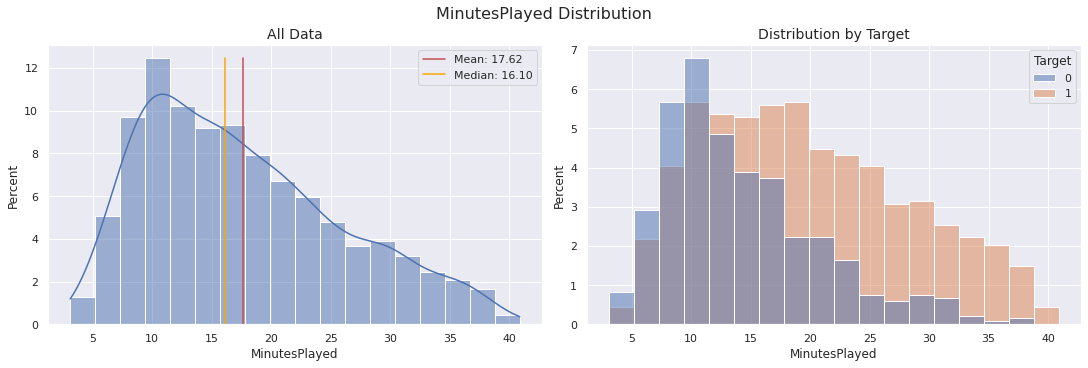

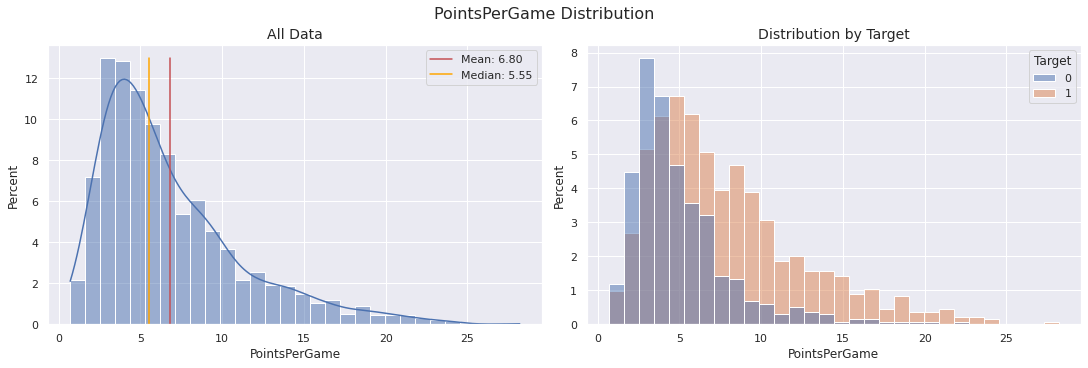

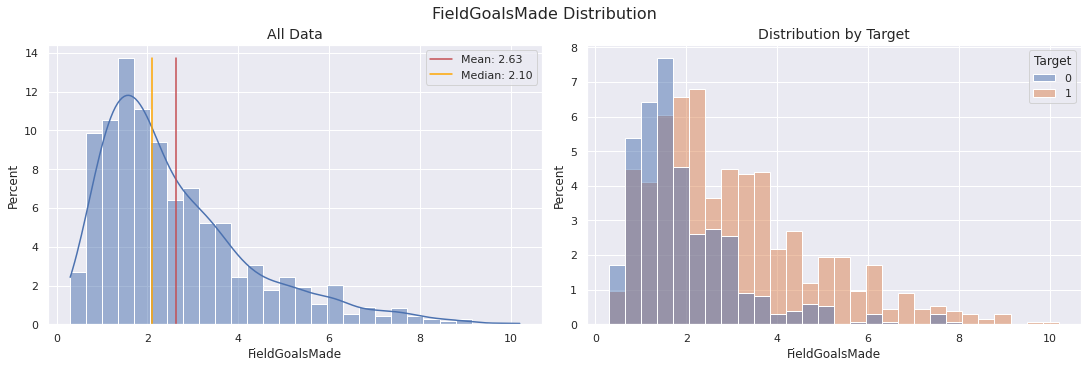

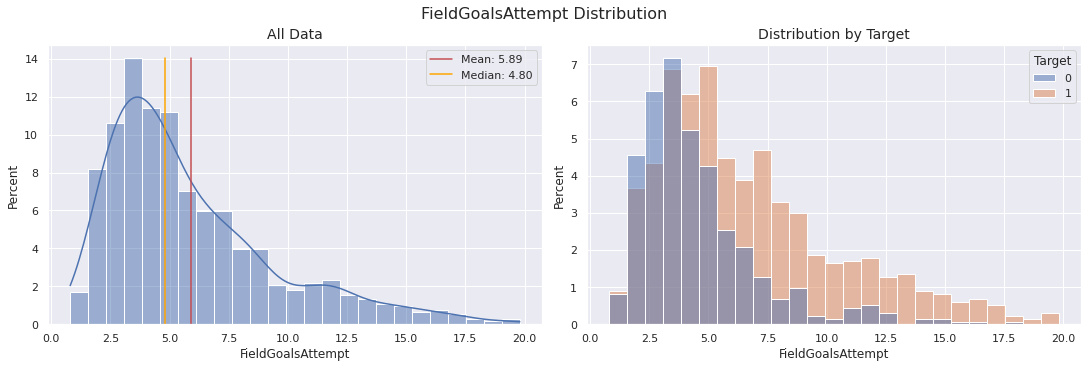

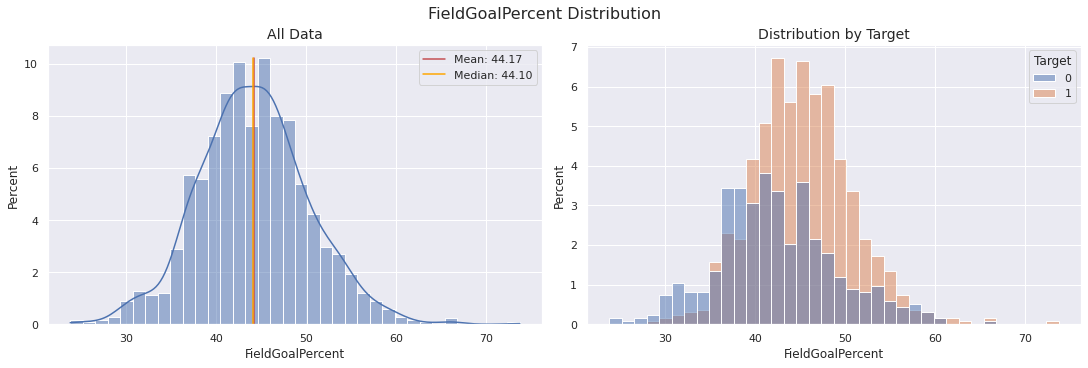

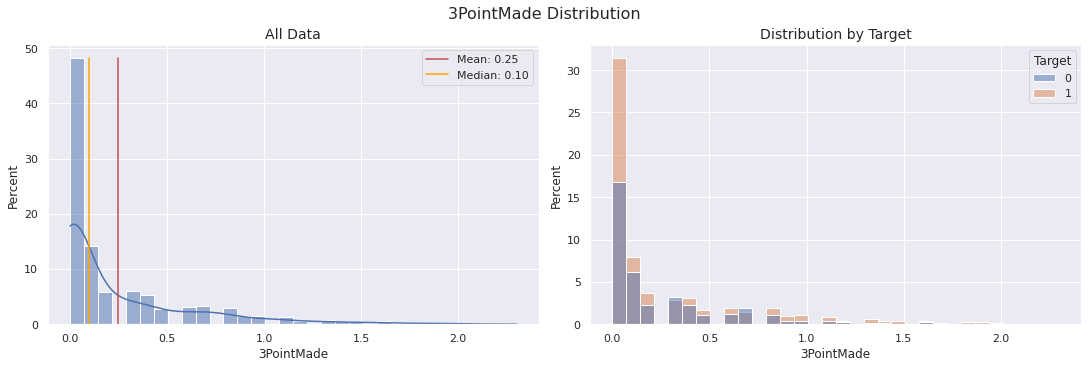

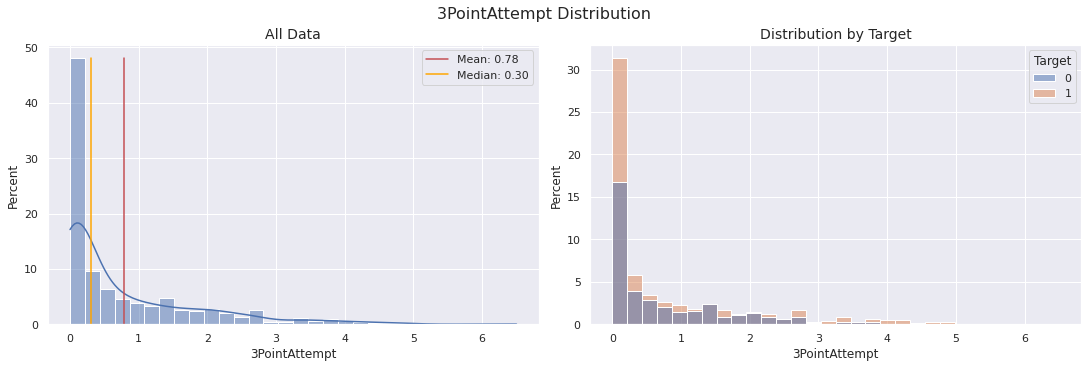

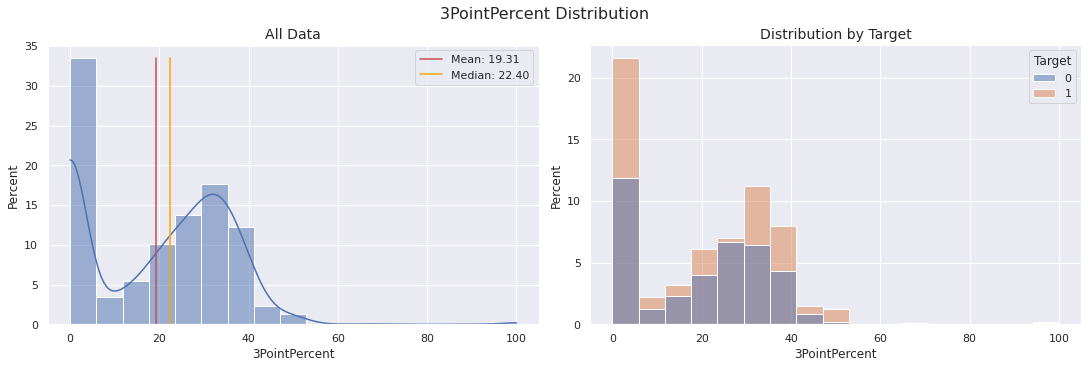

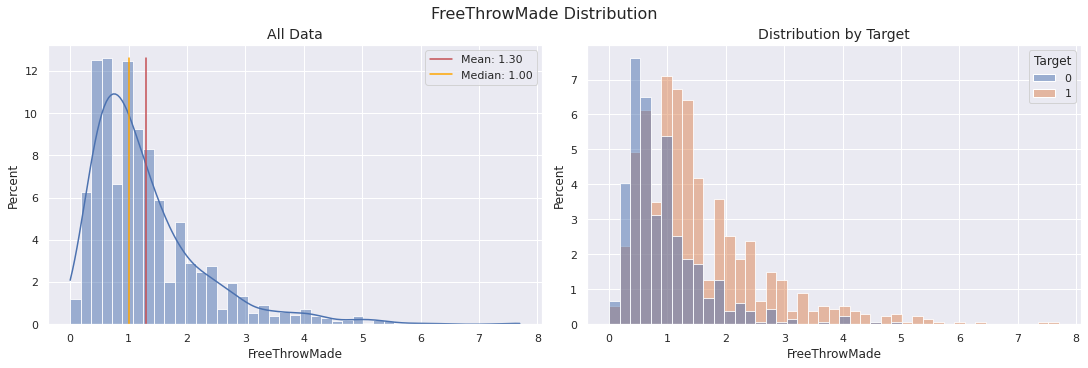

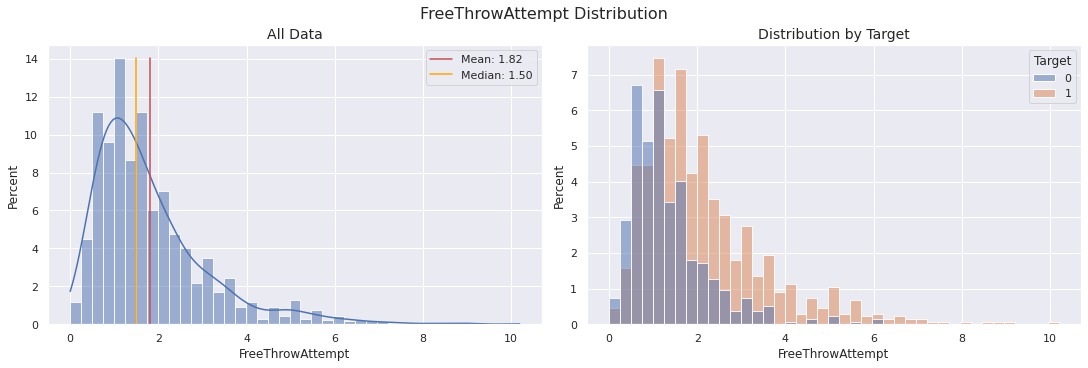

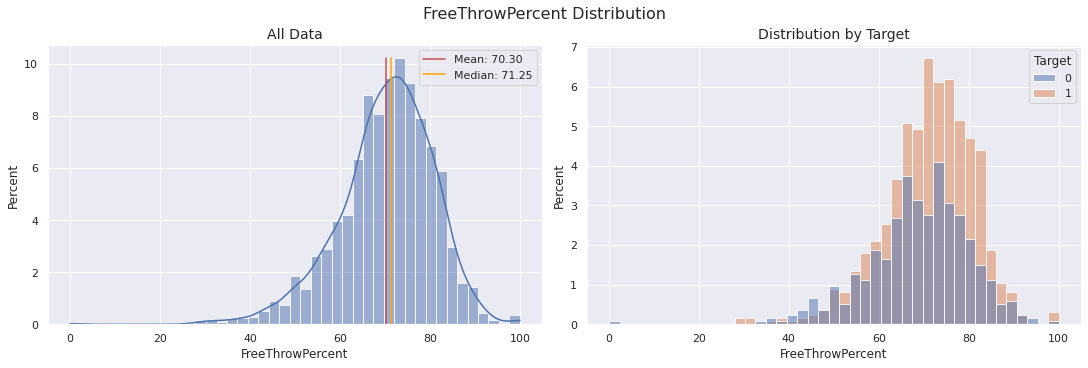

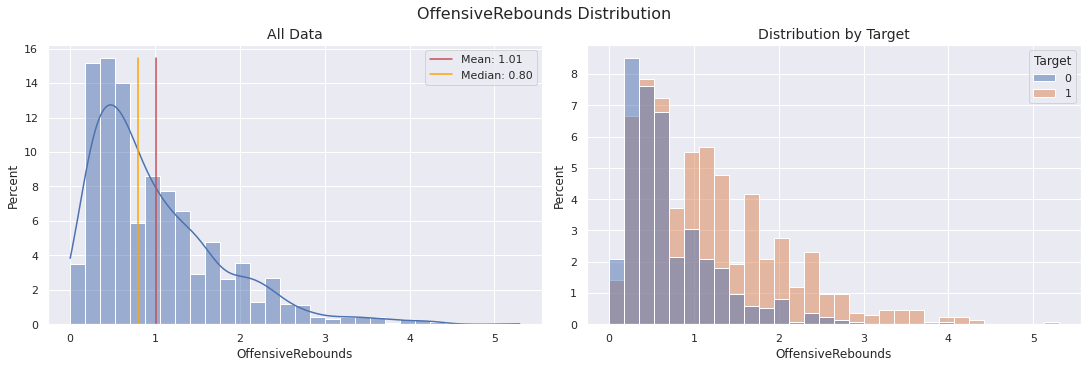

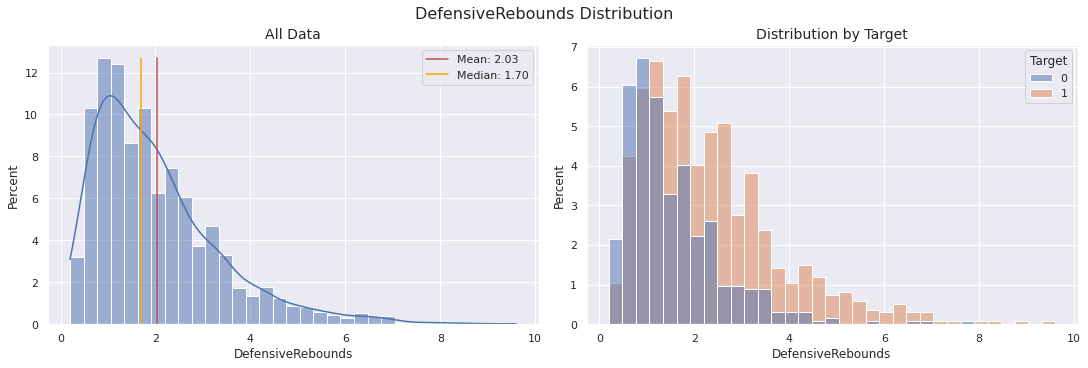

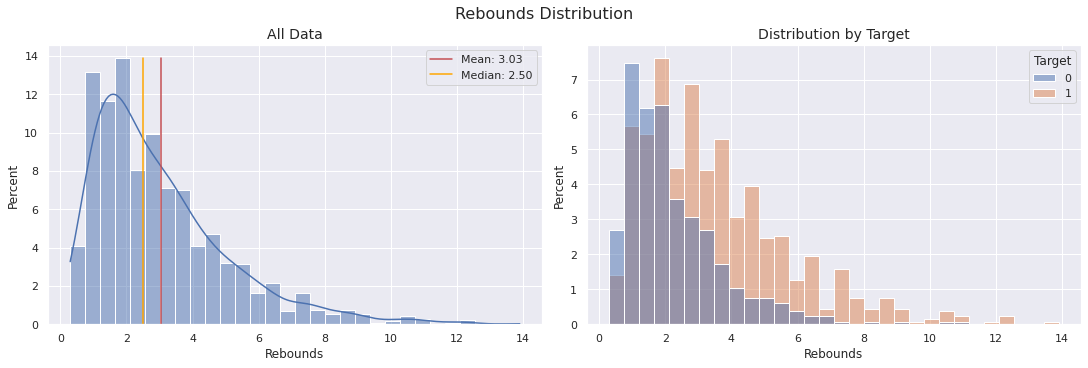

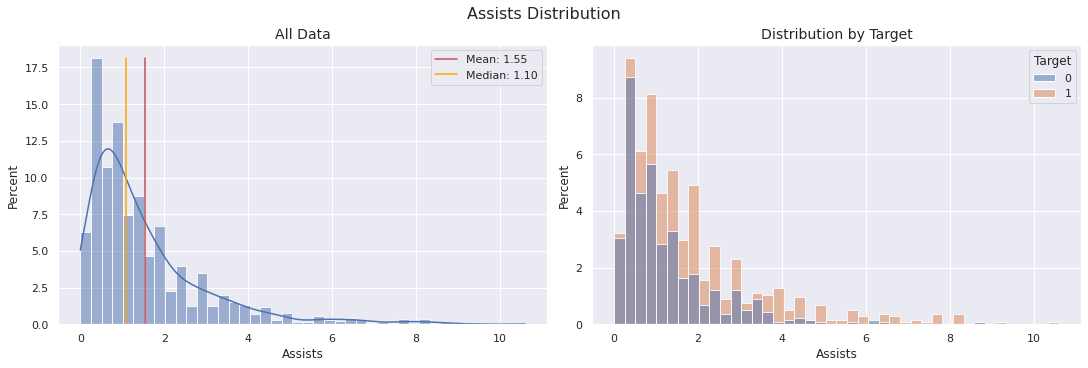

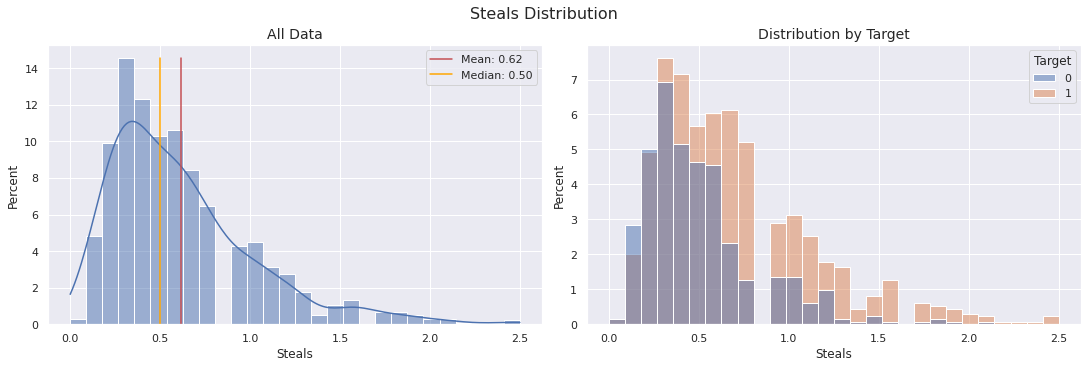

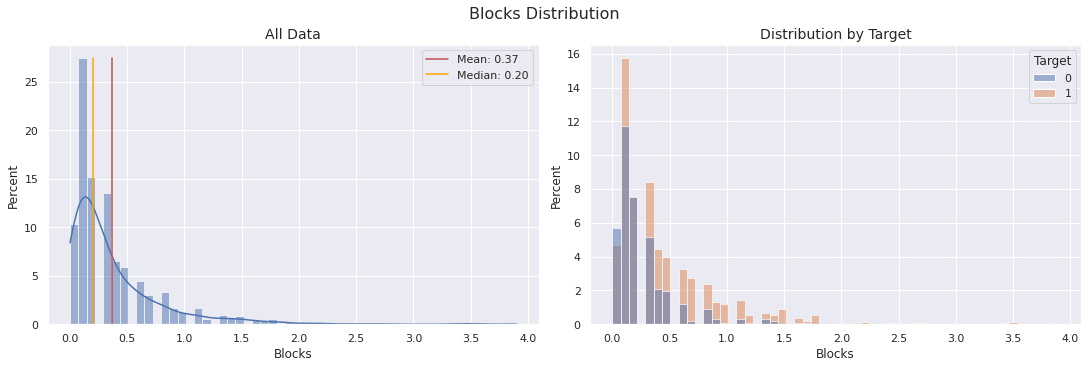

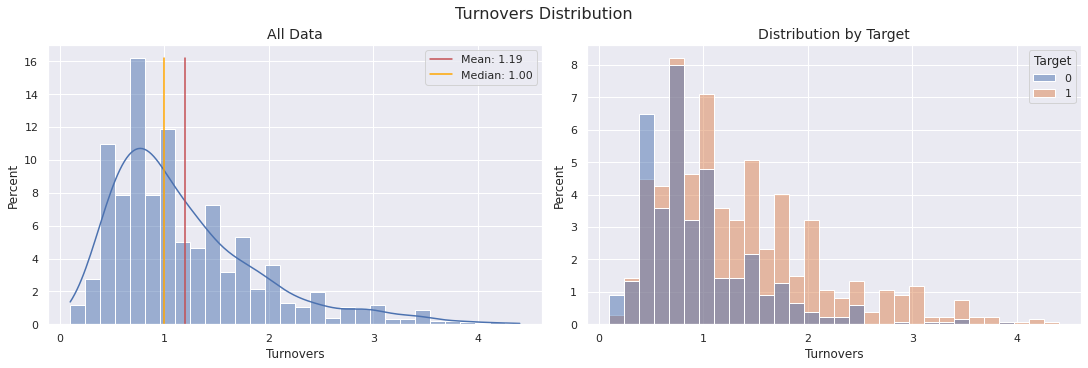

In [7]:
features = df.columns.to_list()[1:-1]

for feature in features:
    fig, axs = plt.subplots(ncols=2, figsize=(15, 5), constrained_layout=True)
    fig.suptitle(f'{feature} Distribution', fontsize=16)

    axs[0].set_title('All Data', fontsize=14)
    sns.histplot(df[feature], ax=axs[0], stat='percent', kde=True)
    
    mean = df[feature].mean()
    median = df[feature].median()
    # determina a altura das linhas verticais para a média e mediana
    # Esta altura é igual ao tamanho da maior das barras
    ymax = axs[0].dataLim.y1/axs[0].viewLim.y1
    # Linhas verticais para média e mediana
    axs[0].axvline(x=mean, ymax=ymax, color='r', label=f'Mean: {mean:.2f}')
    axs[0].axvline(x=median, ymax=ymax, color='orange', label=f'Median: {median:.2f}')
    
    axs[0].legend()
    # ==================================================================================
    
    axs[1].set_title('Distribution by Target', fontsize=14)
    sns.histplot(data=df, x=feature, hue='Target', stat='percent')
    
    plt.show()

Quando olhamos para as distribuições separadas pelo *Target*, é possível perceber uma tendência geral: 

*a distribuição da classe 0 está mais concentrada à esquerda e a da classe 1 mais à direita*.

Ou seja, como tendência geral, atletas cujos valores das estatísticas são menores tem chance maior de ser classificado como sendo da classe 0 e, atletas cujas estatísticas são maiores tem chance maior de ser classficado como sendo da classe 1.

A seguir vamos "discretizar" cada uma das variáveis em 10 classes visualizar a distribuição dentro das classes separadas pelo *Target*.

In [8]:
df_discrete = df.copy()
df_discrete.drop(columns=['Name', 'Target'], inplace=True)

df_discrete = df_discrete.apply(lambda x: pd.cut(x=x, bins=10))
df_discrete['Target'] = df.Target
df_discrete

GamesPlayed   MinutesPlayed PointsPerGame FieldGoalsMade  \
0     (32.3, 39.4]  (25.78, 29.56]   (6.2, 8.95]   (2.28, 3.27]   
1     (32.3, 39.4]  (25.78, 29.56]   (6.2, 8.95]   (1.29, 2.28]   
2     (67.8, 74.9]  (14.44, 18.22]   (3.45, 6.2]   (1.29, 2.28]   
3     (53.6, 60.7]  (10.66, 14.44]   (3.45, 6.2]   (2.28, 3.27]   
4     (46.5, 53.6]  (10.66, 14.44]   (3.45, 6.2]   (1.29, 2.28]   
...            ...             ...           ...            ...   
1335  (74.9, 82.0]  (14.44, 18.22]   (3.45, 6.2]   (1.29, 2.28]   
1336  (67.8, 74.9]  (10.66, 14.44]   (3.45, 6.2]   (1.29, 2.28]   
1337  (39.4, 46.5]  (10.66, 14.44]   (3.45, 6.2]   (1.29, 2.28]   
1338  (46.5, 53.6]  (10.66, 14.44]   (3.45, 6.2]   (1.29, 2.28]   
1339  (46.5, 53.6]  (10.66, 14.44]   (3.45, 6.2]   (1.29, 2.28]   

     FieldGoalsAttempt FieldGoalPercent       3PointMade    3PointAttempt  \
0           (6.5, 8.4]   (33.78, 38.77]     (0.46, 0.69]      (1.95, 2.6]   
1           (6.5, 8.4]   (28.79, 33.78]     (0.69, 0.92]      (2.6, 3.25]   
2           (4.6, 6.5]   (38.77, 43.76]     (0.23, 0.46]      (1.3, 1.95]   
3           (4.6, 6.5]   (38.77, 43.76]  (-0.0023, 0.23]  (-0.0065, 0.65]   
4           (2.7, 4.6]   (48.75, 53.74]  (-0.0023, 0.23]  (-0.0065, 0.65]   
...                ...              ...              ...              ...   
1335        (2.7, 4.6]   (38.77, 43.76]  (-0.0023, 0.23]  (-0.0065, 0.65]   
1336        (2.7, 4.6]   (33.78, 38.77]  (-0.0023, 0.23]      (0.65, 1.3]   
1337        (2.7, 4.6]   (53.74, 58.73]  (-0.0023, 0.23]  (-0.0065, 0.65]   
1338        (2.7, 4.6]   (43.76, 48.75]  (-0.0023, 0.23]  (-0.0065, 0.65]   
1339        (2.7, 4.6]   (33.78, 38.77]     (0.23, 0.46]      (0.65, 1.3]   

     3PointPercent    FreeThrowMade FreeThrowAttempt FreeThrowPercent  \
0     (20.0, 30.0]     (1.54, 2.31]     (2.04, 3.06]     (60.0, 70.0]   
1     (20.0, 30.0]     (2.31, 3.08]     (3.06, 4.08]     (70.0, 80.0]   
2     (20.0, 30.0]     (0.77, 1.54]     (1.02, 2.04]     (60.0, 70.0]   
3     (20.0, 30.0]     (0.77, 1.54]     (1.02, 2.04]     (60.0, 70.0]   
4     (-0.1, 10.0]     (0.77, 1.54]     (1.02, 2.04]     (60.0, 70.0]   
...            ...              ...              ...              ...   
1335  (10.0, 20.0]     (0.77, 1.54]     (1.02, 2.04]     (70.0, 80.0]   
1336  (10.0, 20.0]     (0.77, 1.54]  (-0.0102, 1.02]     (70.0, 80.0]   
1337  (-0.1, 10.0]     (0.77, 1.54]     (1.02, 2.04]     (60.0, 70.0]   
1338  (-0.1, 10.0]     (0.77, 1.54]     (1.02, 2.04]     (60.0, 70.0]   
1339  (30.0, 40.0]  (-0.0077, 0.77]  (-0.0102, 1.02]     (60.0, 70.0]   

     OffensiveRebounds DefensiveRebounds       Rebounds          Assists  \
0         (0.53, 1.06]      (3.02, 3.96]   (3.02, 4.38]     (1.06, 2.12]   
1      (-0.0053, 0.53]      (1.14, 2.08]   (1.66, 3.02]     (3.18, 4.24]   
2      (-0.0053, 0.53]      (1.14, 2.08]   (1.66, 3.02]  (-0.0106, 1.06]   
3         (0.53, 1.06]     (0.191, 1.14]   (1.66, 3.02]  (-0.0106, 1.06]   
4         (0.53, 1.06]      (1.14, 2.08]   (1.66, 3.02]  (-0.0106, 1.06]   
...                ...               ...            ...              ...   
1335   (-0.0053, 0.53]     (0.191, 1.14]  (0.286, 1.66]     (2.12, 3.18]   
1336   (-0.0053, 0.53]     (0.191, 1.14]  (0.286, 1.66]     (2.12, 3.18]   
1337      (1.06, 1.59]      (2.08, 3.02]   (3.02, 4.38]  (-0.0106, 1.06]   
1338   (-0.0053, 0.53]     (0.191, 1.14]  (0.286, 1.66]     (2.12, 3.18]   
1339   (-0.0053, 0.53]     (0.191, 1.14]  (0.286, 1.66]     (1.06, 2.12]   

           Steals           Blocks     Turnovers  Target  
0     (0.25, 0.5]     (0.39, 0.78]  (0.96, 1.39]       0  
1     (1.0, 1.25]     (0.39, 0.78]  (1.39, 1.82]       0  
2     (0.25, 0.5]  (-0.0039, 0.39]  (0.96, 1.39]       0  
3     (0.5, 0.75]  (-0.0039, 0.39]  (0.96, 1.39]       1  
4     (0.25, 0.5]     (0.39, 0.78]  (0.53, 0.96]       1  
...           ...              ...           ...     ...  
1335  (0.5, 0.75]  (-0.0039, 0.39]  (0.53, 0.96]       0  
1336  (0.75, 1.

In [9]:
df.columns.to_list()

['Name',
 'GamesPlayed',
 'MinutesPlayed',
 'PointsPerGame',
 'FieldGoalsMade',
 'FieldGoalsAttempt',
 'FieldGoalPercent',
 '3PointMade',
 '3PointAttempt',
 '3PointPercent',
 'FreeThrowMade',
 'FreeThrowAttempt',
 'FreeThrowPercent',
 'OffensiveRebounds',
 'DefensiveRebounds',
 'Rebounds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnovers',
 'Target']

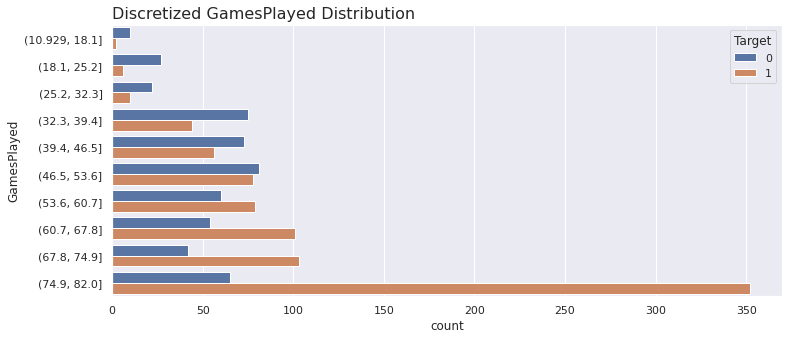

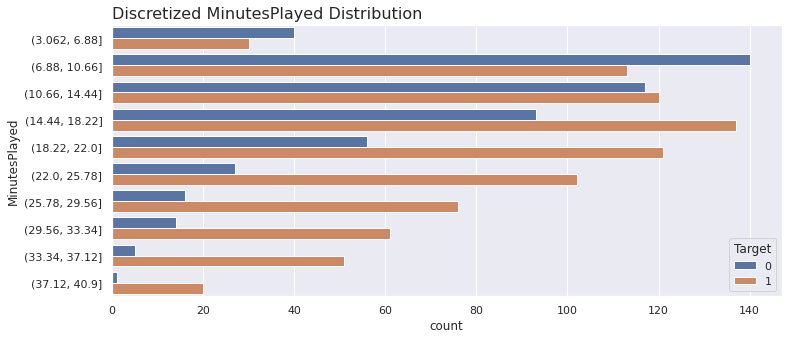

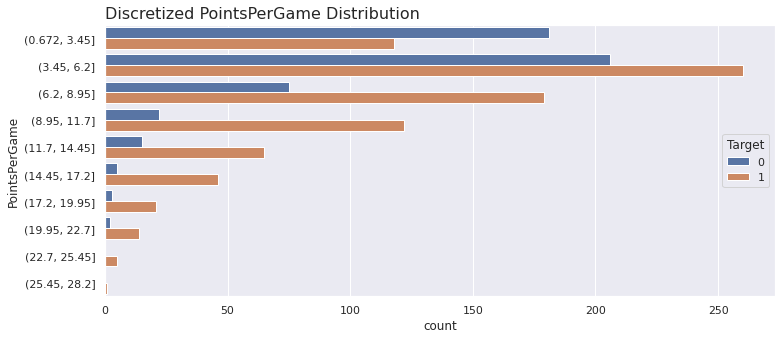

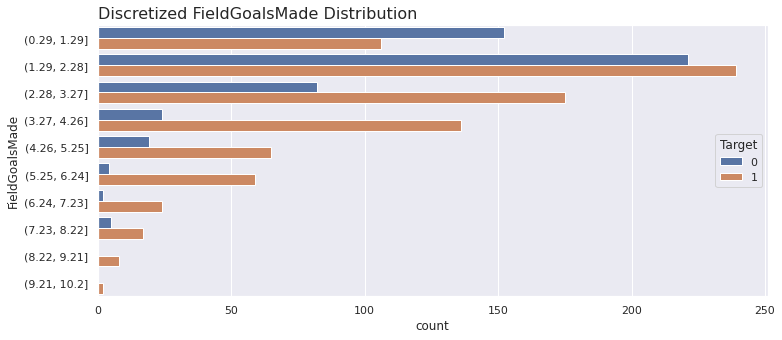

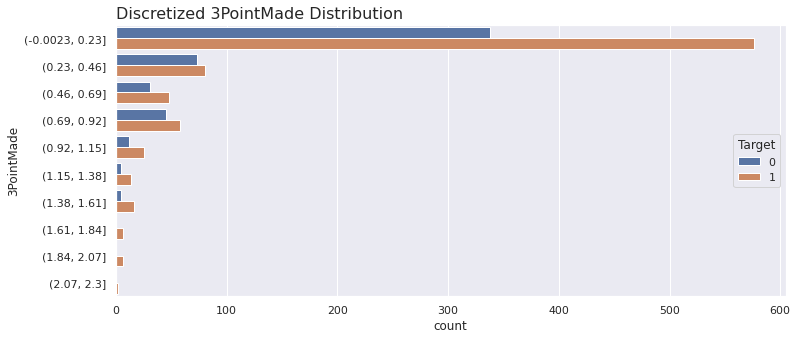

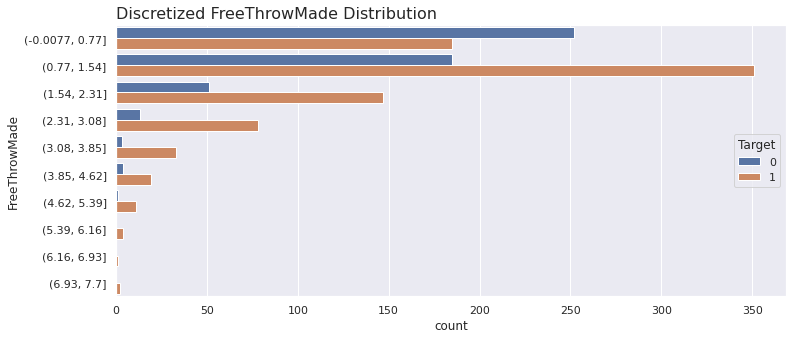

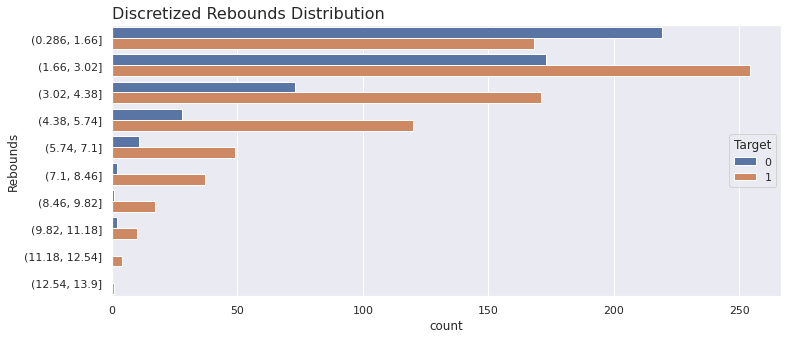

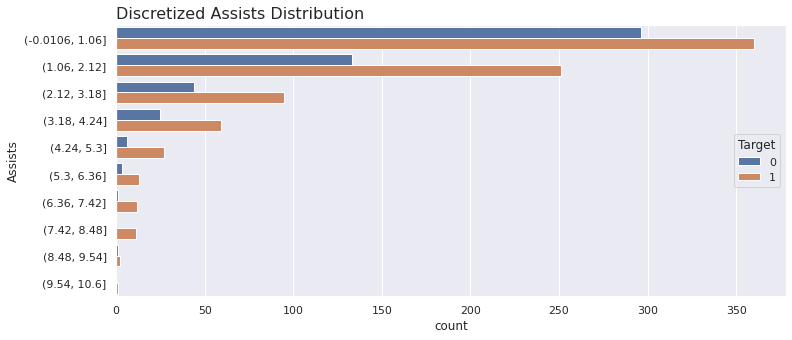

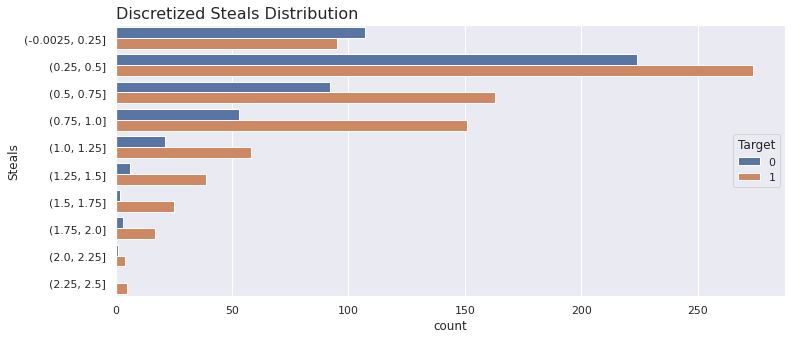

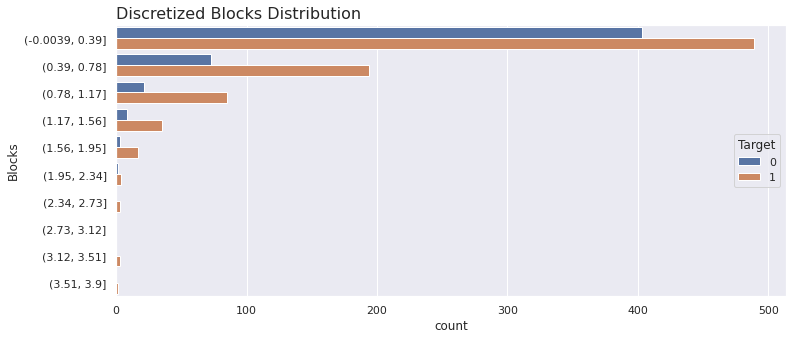

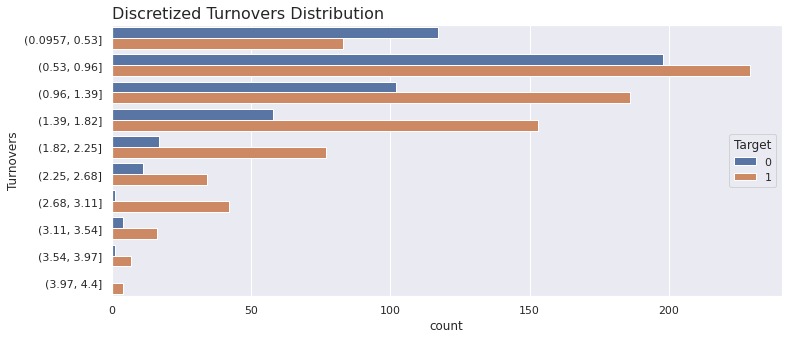

In [10]:
some_columns = [
    'GamesPlayed',
    'MinutesPlayed',
    'PointsPerGame',
    'FieldGoalsMade',
    '3PointMade',
    'FreeThrowMade',
    'Rebounds',
    'Assists',
    'Steals',
    'Blocks',
    'Turnovers'
]

for col in some_columns:
    plt.figure(figsize=(12, 5))
    ax = sns.countplot(data=df_discrete, y=col, hue='Target')
    ax.set_title(f'Discretized {col} Distribution', loc='left', fontsize=16)
    plt.show()

Os gráficos acima reforçam claramente a tendência geral observada anteriormente.

Excetuando-se as variáveis que tratam das estatísticas relacionadas aos "3 pontos", conforme cresce o valor da estatística cresce também a **proporção** dos registros classificados como 1 em relação àqueles classificados como 0.

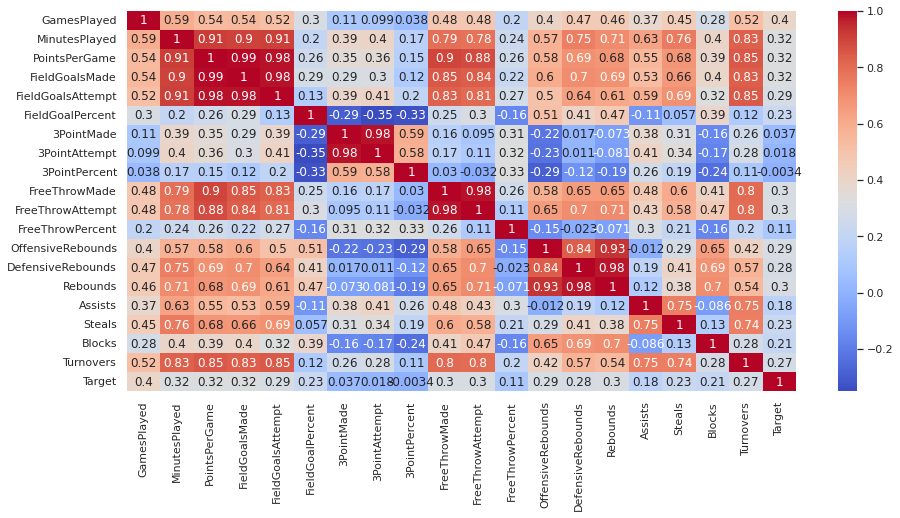

In [11]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

Aqui vemos que algumas variáveis estão fortemente correlacionadas com outras.

Portanto, talvez seja interessante realizarmos uma seleção de variáveis de modo a diminuir a redundância das mesmas e logo, otimizar o processamento.

## Pré-processamento de Dados

Em geral, vimos na seção anterior que os dados deste *dataset* são "bem comportados".

Assim, optamos por fazer a inputação de dados faltantes por meio de clusterização. 

Mais precisamente, vamos preencher os dados faltantes a partir do valor dos registros semelhantes por meio do *KNNImputer*.

### Seleção de *Features*

Vamos utilizar 3 métodos para selecionar as variáveis e compilar uma seleção final com aquelas que aparaceram em mais métodos difierentes.

Antes, porém, um pequeno pré-processamento.

In [12]:
X = df.drop(columns=['Name', 'Target'])
y = df.Target

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, RFECV, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42, 
                                                    stratify=y)

In [15]:
columns_names = X_train.columns.tolist()

Selecionando Features

In [16]:
input_pipe = Pipeline([('scaler', StandardScaler()), 
                       ('imputer', KNNImputer())])

X_train = ColumnTransformer([('tranf', input_pipe, columns_names)]).fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=columns_names)

In [17]:
X_train

GamesPlayed  MinutesPlayed  PointsPerGame  FieldGoalsMade  \
0        1.223694       0.499284       0.573002        0.750273   
1       -0.528497      -1.011530      -0.940265       -0.968538   
2       -0.076319      -0.892568      -0.825624       -0.731461   
3        1.223694      -0.107421      -0.367058       -0.435114   
4        0.545426       0.071022       0.137364        0.098310   
...           ...            ...            ...             ...   
1000     0.997604       0.701519      -0.091918       -0.138767   
1001    -1.432854       0.237568       0.114436        0.216849   
1002    -1.489376      -1.071010      -0.756839       -0.731461   
1003     0.828037       0.713415       1.398420        1.580044   
1004     1.167171       1.534251       1.719417        1.817122   

      FieldGoalsAttempt  FieldGoalPercent  3PointMade  3PointAttempt  \
0              0.695675          0.445177   -0.639284      -0.636395   
1             -0.890212         -0.837067   -0.376511      -0.445932   
2             -0.778922          0.228695   -0.639284      -0.636395   
3             -0.389405         -0.337491    1.200129       1.077778   
4             -0.445051          3.642462   -0.639284      -0.731627   
...                 ...               ...         ...            ...   
1000          -0.027712         -0.370796   -0.376511      -0.350700   
1001           0.278337         -0.037746    0.149036       0.125460   
1002          -0.611986         -0.803762    0.411809       0.601619   
1003           1.335595          0.911448   -0.376511      -0.350700   
1004           1.585998          0.894796   -0.376511      -0.350700   

      3PointPercent  FreeThrowMade  FreeThrowAttempt  FreeThrowPercent  \
0          0.192476       0.212771          0.287280         -0.422167   
1          0.273977      -0.705413         -0.764238         -0.038171   
2         -1.199317      -0.909454         -0.839346         -1.293182   
3          1.051374      -0.603393         -0.764238          1.703859   
4         -1.199317       0.416812          0.737931         -0.712506   
...             ...            ...               ...               ...   
1000       0.098435       0.212771          0.437497         -0.515825   
1001       0.681484      -0.297331         -0.238479         -0.675042   
1002       0.800601      -1.113495         -1.139780         -1.471132   
1003       0.744177       0.824894          0.888148          0.092949   
1004      -0.189954       1.539038          1.639232         -0.141195   

      OffensiveRebounds  DefensiveRebounds  Rebounds   Assists    Steals  \
0              1.556897           1.575466  1.628648 -0.774827 -0.524256   
1             -0.900650          -0.955569 -0.971268 -0.446455 -0.040882   
2             -0.641961          -1.027884 -0.971268 -0.249432 -0.040882   
3             -1.029995          -0.810938 -0.923121  1.392427  0.442491   
4              0.522140           0.707682  0.665716 -0.446455  0.200804   
...                 ...                ...       ...       ...       ...   
1000          -0.124583           0.563052  0.328690  1.458101  2.375984   
1001           0.134107           0.346106  0.280544 -0.446455 -0.524256   
1002          -0.771306          -1.172515 -1.067561 -0.643478 -0.765942   
1003          -0.771306          -0.377047 -0.537948  1.326752  0.442491   
1004          -0.124583          -0.232416 -0.249069  3.953726  2.859357   

        Blocks  Turnovers  
0     0.520710   0.137117  
1    -0.604211  -0.674283  
2    -0.604211   0.137117  
3    -0.829195  -0.539050  
4     0.970678  -0.133350  
...        ...        ...  
1000 -0.604211   0.813285  
1001  0.295725  -0.539050  
1002 -0.379227  -0.539050  
1003 -0.604211   2.300853  
1004 -0.604211   2.436086  

[1005 rows x 19 columns]

#### LASSO

In [18]:
lasso_selector = LassoCV(random_state=42, 
                         alphas=np.linspace(0.0001, 0.001, 100), 
                         n_jobs=-1, 
                         selection='random', 
                         cv=5, 
                         max_iter=10_000)

lasso_selector.fit(X_train, y_train)

LassoCV(alphas=array([0.0001    , 0.00010909, 0.00011818, 0.00012727, 0.00013636,
       0.00014545, 0.00015455, 0.00016364, 0.00017273, 0.00018182,
       0.00019091, 0.0002    , 0.00020909, 0.00021818, 0.00022727,
       0.00023636, 0.00024545, 0.00025455, 0.00026364, 0.00027273,
       0.00028182, 0.00029091, 0.0003    , 0.00030909, 0.00031818,
       0.00032727, 0.00033636, 0.00034545, 0.00035455, 0.00036364,
       0.00037273...
       0.00073636, 0.00074545, 0.00075455, 0.00076364, 0.00077273,
       0.00078182, 0.00079091, 0.0008    , 0.00080909, 0.00081818,
       0.00082727, 0.00083636, 0.00084545, 0.00085455, 0.00086364,
       0.00087273, 0.00088182, 0.00089091, 0.0009    , 0.00090909,
       0.00091818, 0.00092727, 0.00093636, 0.00094545, 0.00095455,
       0.00096364, 0.00097273, 0.00098182, 0.00099091, 0.001     ]),
        cv=5, max_iter=10000, n_jobs=-1, random_state=42, selection='random')

In [19]:
coefs = lasso_selector.coef_

In [20]:
lasso_selection = X_train.columns[np.abs(coefs) > 0]
lasso_selection

Index(['GamesPlayed', 'MinutesPlayed', 'FieldGoalsMade', 'FieldGoalsAttempt',
       'FieldGoalPercent', '3PointMade', '3PointAttempt', '3PointPercent',
       'FreeThrowMade', 'FreeThrowAttempt', 'FreeThrowPercent',
       'OffensiveRebounds', 'DefensiveRebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers'],
      dtype='object')

#### RFE (Recursive Feature Elimination)

In [21]:
dt = DecisionTreeClassifier(random_state=42)

rfe_selector = RFECV(estimator=dt, 
                     scoring='f1_weighted', 
                     cv=5, 
                     n_jobs=-1)

rfe_selector.fit(X_train, y_train)

RFECV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
      scoring='f1_weighted')

In [22]:
rfe_selection = rfe_selector.get_feature_names_out()
rfe_selection

array(['GamesPlayed', 'MinutesPlayed', 'PointsPerGame', 'FieldGoalsMade',
       'FieldGoalPercent', '3PointPercent', 'FreeThrowPercent',
       'OffensiveRebounds', 'DefensiveRebounds'], dtype=object)

#### *K Best* 

Vamos agora selecionar as *k* melhores *features*. 

Nesse caso, vamos definir *k* como sendo a média do número de featrures selecionadas nos métodos anteriores.

In [23]:
n_features = (len(lasso_selection) + len(rfe_selection))//2
n_features

13

In [24]:
kbest_selector = SelectKBest(f_classif, k=n_features).fit(X_train, y_train)

In [25]:
kbest_selection = kbest_selector.get_feature_names_out()
kbest_selection

array(['GamesPlayed', 'MinutesPlayed', 'PointsPerGame', 'FieldGoalsMade',
       'FieldGoalsAttempt', 'FieldGoalPercent', 'FreeThrowMade',
       'FreeThrowAttempt', 'OffensiveRebounds', 'DefensiveRebounds',
       'Rebounds', 'Steals', 'Turnovers'], dtype=object)

In [26]:
results = {
    'lasso': pd.Series([feature in lasso_selection for feature in features]), 
    'rfe': pd.Series([feature in rfe_selection for feature in features]), 
    'kbest': pd.Series([feature in kbest_selection for feature in features])
}

selection_result = pd.DataFrame(results).set_axis(columns_names, axis='index')
selection_result

lasso    rfe  kbest
GamesPlayed         True   True   True
MinutesPlayed       True   True   True
PointsPerGame      False   True   True
FieldGoalsMade      True   True   True
FieldGoalsAttempt   True  False   True
FieldGoalPercent    True   True   True
3PointMade          True  False  False
3PointAttempt       True  False  False
3PointPercent       True   True  False
FreeThrowMade       True  False   True
FreeThrowAttempt    True  False   True
FreeThrowPercent    True   True  False
OffensiveRebounds   True   True   True
DefensiveRebounds   True   True   True
Rebounds           False  False   True
Assists             True  False  False
Steals              True  False   True
Blocks              True  False  False
Turnovers           True  False   True

#### Seleção Final

Vamos escolher aquelas variáveis que apareceram em pelo dois dos três métodos utilizados.

In [27]:
final_selection = selection_result.sum(axis=1)
final_selection = final_selection[final_selection > 1].index.to_list()
final_selection

['GamesPlayed',
 'MinutesPlayed',
 'PointsPerGame',
 'FieldGoalsMade',
 'FieldGoalsAttempt',
 'FieldGoalPercent',
 '3PointPercent',
 'FreeThrowMade',
 'FreeThrowAttempt',
 'FreeThrowPercent',
 'OffensiveRebounds',
 'DefensiveRebounds',
 'Steals',
 'Turnovers']

## ML Tradicional

In [28]:
# splits
from sklearn.model_selection import train_test_split, StratifiedKFold

# Grids
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, classification_report

# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Scalers
from sklearn.preprocessing import MinMaxScaler

# Inputer
from sklearn.impute import KNNImputer

# Transformer
from sklearn.compose import ColumnTransformer

# Pipeline
from sklearn.pipeline import Pipeline

Vamos iniciar com 3 modelos de ML tradicional: 

1. Regressão Logística
2. SVM
3. GradientBoosting

Antes de iniciar vamos definir algumas funções auxiliares.

A função a seguir plota, lado a lado, as matrizes de confusão de treino e de teste.

In [29]:
def plot_confusion_martrices(y_train, y_pred_train, y_test, y_pred_test):
    values = {
        'Train': {'true': y_train, 'pred': y_pred_train}, 
        'Test': {'true': y_test, 'pred': y_pred_test} 
    }
       
    fig, axs = plt.subplots(ncols=2, figsize=(11, 5))
    fig.suptitle('Train and Test Confusion Matrices', x=0.2, fontsize=16)
    
    for i, k in enumerate(values.keys()):
        ConfusionMatrixDisplay.from_predictions(values[k]['true'], values[k]['pred'], ax=axs[i])
        axs[i].set_title(k, fontsize=14)
        axs[i].grid(False)
    
    plt.tight_layout()
    plt.show()

Já a seguinte função resume as métricas de um determinado modelo já ajustado.

Tal resumo consiste das matrizes de confusão e do relatório (*report*) de métricas.

In [30]:
def show_metrics_of(model, X_train, X_test, y_train, y_test, model_name=None):
       
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    line = '_'*90
    
    if model_name:
        n = (90 - len(model_name))//2
        print('='*n, f'{model_name}', '='*n)
    else:
        print(line)
        
    plot_confusion_martrices(y_train, y_pred_train, y_test, y_pred_test)
    
    print(line)
    print('Treino')
    print(classification_report(y_train, y_pred_train))
    
    print(line)
    print('Teste')
    print(classification_report(y_test, y_pred_test))
    
    print(line)

A função abaixo realiza o pré_processamento dos dados deixando-os prontos para serem utilizados nas modelagens.

In [31]:
def pre_process(columns=None):
    df = pd.read_csv('../Dados/sports.csv')
    y = df.Target
    
    if columns:
        X = df[columns]
    else:
        X = df.drop(columns=['Name', 'Target'])
    
    columns_names = X.columns.to_list()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.25, 
                                                        random_state=42, 
                                                        stratify=y)
    
    pipe_input = Pipeline([('ss', StandardScaler()), 
                           ('knni', KNNImputer()), 
                           ('mms', MinMaxScaler())])

    pre_processor = ColumnTransformer([('transf', pipe_input, columns_names)])
    
    return X_train, X_test, y_train, y_test, pre_processor

In [32]:
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Regressão Logística

=================================== Logistic Regression ===================================


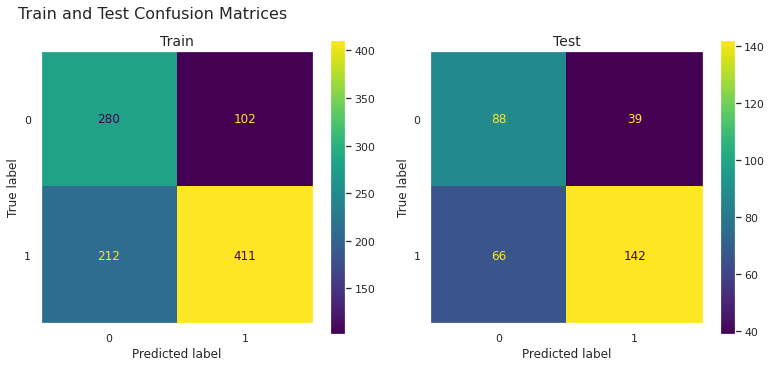

__________________________________________________________________________________________
Treino
              precision    recall  f1-score   support

           0       0.57      0.73      0.64       382
           1       0.80      0.66      0.72       623

    accuracy                           0.69      1005
   macro avg       0.69      0.70      0.68      1005
weighted avg       0.71      0.69      0.69      1005

__________________________________________________________________________________________
Teste
              precision    recall  f1-score   support

           0       0.57      0.69      0.63       127
           1       0.78      0.68      0.73       208

    accuracy                           0.69       335
   macro avg       0.68      0.69      0.68       335
weighted avg       0.70      0.69      0.69       335

__________________________________________________________________________________________


In [33]:
X_train, X_test, y_train, y_test, pre_processor = pre_process(columns=final_selection)

pipe_lr = Pipeline([('pre_proc', pre_processor), 
                    ('lr', LogisticRegression(penalty='elasticnet', 
                                              class_weight='balanced', 
                                              random_state=42, 
                                              solver='saga', 
                                              max_iter=500))])

params_lr = {
    'lr__C': np.linspace(0.1, 1.5, 5), 
    'lr__l1_ratio': np.linspace(0, 1, 5)
}

grid_lr = RandomizedSearchCV(estimator=pipe_lr, 
                             param_distributions=params_lr, 
                             cv=splitter, 
                             n_iter=20, 
                             scoring='f1_weighted',
                             random_state=42, 
                             n_jobs=-1)

grid_lr.fit(X_train, y_train)

data = (X_train, X_test, y_train, y_test)

show_metrics_of(grid_lr, *data, 'Logistic Regression')

In [34]:
grid_lr.best_params_

{'lr__l1_ratio': 0.0, 'lr__C': 0.1}

### SVM

=========================================== SVM ===========================================


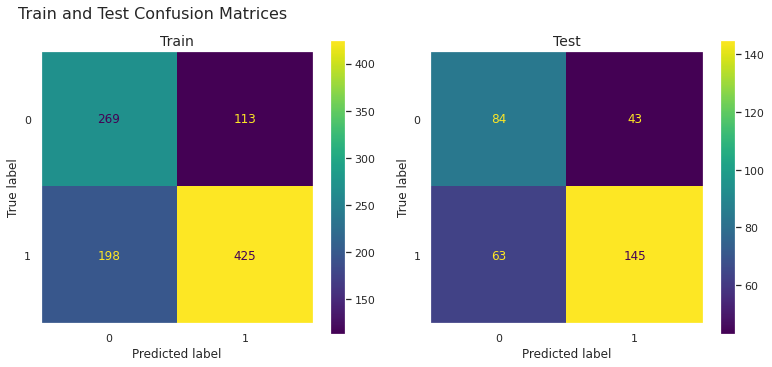

__________________________________________________________________________________________
Treino
              precision    recall  f1-score   support

           0       0.58      0.70      0.63       382
           1       0.79      0.68      0.73       623

    accuracy                           0.69      1005
   macro avg       0.68      0.69      0.68      1005
weighted avg       0.71      0.69      0.69      1005

__________________________________________________________________________________________
Teste
              precision    recall  f1-score   support

           0       0.57      0.66      0.61       127
           1       0.77      0.70      0.73       208

    accuracy                           0.68       335
   macro avg       0.67      0.68      0.67       335
weighted avg       0.70      0.68      0.69       335

__________________________________________________________________________________________


In [35]:
X_train, X_test, y_train, y_test, pre_processor = pre_process(columns=final_selection)

pipe_svc = Pipeline([('pre_proc', pre_processor), 
                     ('svc', SVC(random_state=42, 
                                 class_weight='balanced', 
                                 max_iter=1_00_000))])

params_svc = {
    'svc__C': np.logspace(-4, 4, 9), 
    'svc__kernel': ['poly', 'rbf', 'sigmoid'],
    'svc__gamma': np.logspace(-4, 4, 9)
}

grid_svc = RandomizedSearchCV(estimator=pipe_svc, 
                              param_distributions=params_svc, 
                              cv=splitter, 
                              n_iter=40, 
                              scoring='f1_weighted',
                              random_state=42, 
                              n_jobs=-1)

grid_svc.fit(X_train, y_train)

data = (X_train, X_test, y_train, y_test)

show_metrics_of(grid_svc, *data, 'SVM')

In [36]:
grid_svc.best_params_

{'svc__kernel': 'sigmoid', 'svc__gamma': 0.01, 'svc__C': 100.0}

### GradientBoost

==================================== Gradient Boosting ====================================


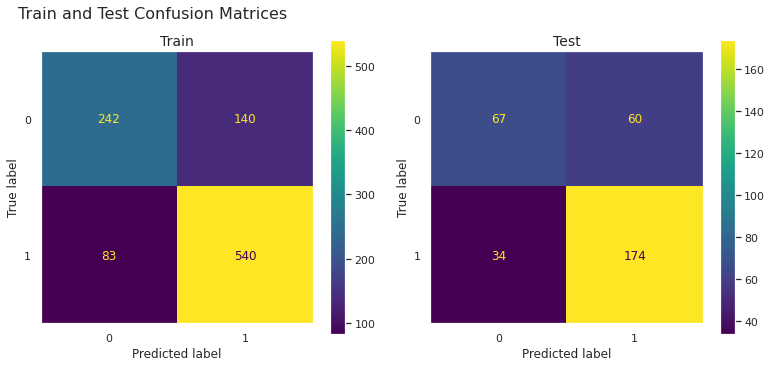

__________________________________________________________________________________________
Treino
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       382
           1       0.79      0.87      0.83       623

    accuracy                           0.78      1005
   macro avg       0.77      0.75      0.76      1005
weighted avg       0.78      0.78      0.77      1005

__________________________________________________________________________________________
Teste
              precision    recall  f1-score   support

           0       0.66      0.53      0.59       127
           1       0.74      0.84      0.79       208

    accuracy                           0.72       335
   macro avg       0.70      0.68      0.69       335
weighted avg       0.71      0.72      0.71       335

__________________________________________________________________________________________


In [37]:
X_train, X_test, y_train, y_test, pre_processor = pre_process(columns=final_selection)

pipe_gb = Pipeline([('pre_proc', pre_processor), 
                     ('gb', GradientBoostingClassifier(random_state=42))])

params_gb = {
    'gb__loss' : ['log_loss', 'exponential'],
    'gb__n_estimators' : range(100, 1000, 100),
    'gb__max_depth' : range(1, 5)
}

grid_gb = RandomizedSearchCV(estimator=pipe_gb, 
                             param_distributions=params_gb, 
                             cv=splitter, 
                             n_iter=30, 
                             scoring='f1_weighted',
                             random_state=42, 
                             n_jobs=-1)

grid_gb.fit(X_train, y_train)

data = (X_train, X_test, y_train, y_test)

show_metrics_of(grid_gb, *data, model_name='Gradient Boosting')

## Perceptron

In [38]:
from sklearn.linear_model import Perceptron

======================================== Perceptron ========================================


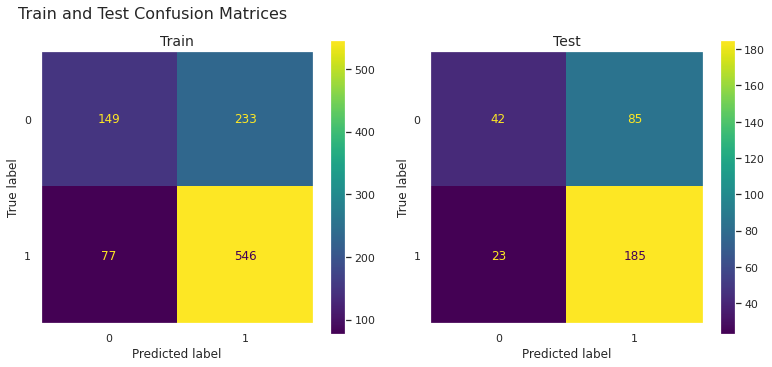

__________________________________________________________________________________________
Treino
              precision    recall  f1-score   support

           0       0.66      0.39      0.49       382
           1       0.70      0.88      0.78       623

    accuracy                           0.69      1005
   macro avg       0.68      0.63      0.63      1005
weighted avg       0.69      0.69      0.67      1005

__________________________________________________________________________________________
Teste
              precision    recall  f1-score   support

           0       0.65      0.33      0.44       127
           1       0.69      0.89      0.77       208

    accuracy                           0.68       335
   macro avg       0.67      0.61      0.61       335
weighted avg       0.67      0.68      0.65       335

__________________________________________________________________________________________


In [40]:
X_train, X_test, y_train, y_test, pre_processor = pre_process(columns=final_selection)

pipe_ppn = Pipeline([('pre_proc', pre_processor), 
                     ('ppn', Perceptron(random_state=42, 
                                        class_weight='balanced', 
                                        early_stopping=True, 
                                        n_iter_no_change=20))])

pipe_ppn.fit(X_train, y_train)

data = (X_train, X_test, y_train, y_test)

show_metrics_of(pipe_ppn, *data, model_name='Perceptron')

### Avaliação da Separabilidade pelo Perceptron

In [41]:
from sklearn.decomposition import PCA

from mlxtend.plotting import plot_decision_regions

ValueError: Filler values must be provided when X has more than 2 training features.

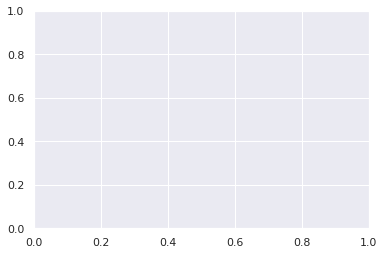

In [42]:
X_train, X_test, y_train, y_test, pre_processor = pre_process(columns=final_selection)

pipe_pca_ppn = Pipeline([('pre_proc', pre_processor), 
                         ('pca', PCA(n_components=2, random_state=42)), 
                         ('ppn', Perceptron(random_state=42, 
                                            class_weight='balanced', 
                                            early_stopping=True, 
                                            n_iter_no_change=10))])

pipe_pca_ppn.fit(X_train, y_train)

plot_decision_regions(X=X_train.values,
                      y=y_train.values,
                      clf=pipe_pca_ppn)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Região de Separação Perceptron (PCA com duas componentes)', loc='left', fontsize=16)
plt.legend()
plt.show()

Tentei plotar a regiao de decisão do Perceptron modelando-o com duas componentes principais do PCA.

Para tanto, inclui o PCA na pipeline de modelagem.

Mas a função acusa que está encontrando mais do que duas features.

In [43]:
pipe_pca_ppn.get_feature_names_out()

AttributeError: Estimator ppn does not provide get_feature_names_out. Did you mean to call pipeline[:-1].get_feature_names_out()?

A pipeline em si não devolve as *features* de saída.

Mas seguindo a sugestão do erro vemos que as *features* de saída de fato são as componentes do PCA.

In [44]:
pipe_pca_ppn[:-1].get_feature_names_out()

array(['pca0', 'pca1'], dtype=object)

Enfim, não consegui solucionar este problema.

## MLP

A idéia aqui é testar pelo menos duas arquiteturas de MLP diferentes.

Como existem muitos parâmetros que podem ser variados, vamos "empacotar" as redes como objetos do scikit-learn e testar várias opções com o *RandomizedSearch*.

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

A função abaixo cria o modelo de MLP que iremos usar. 

- *n_units*:
    - inteiro: ```n_units = 20``` cria um MLP de duas camadas ocultas com n_units neurônios cada
    - lista de inteiros: ```n_units = [10, 20, 5]``` cria uma MLP com 3 camadas ocultas; a primeira com 10 neurônios, a segunda com 20 e a terceira com 5.
    
- *rates*:
    - somente em caso de ```dropout = True```
    - float: ```rates = 0.2``` cria uma MLP com uma camada de Dropout com taxa de 20% entre cada par de camadas ocultas.
    - lista de floats: ```rates = [0.2, 0.3]``` cria duas camadas de Dropout; a primeira com taxa de 20% e a segunda com taxa de 30%.
    - Em caso de lista:
        - Se vazia, cai no caso de ser um float com valor padrão de 0.2
        - Se com tamanho maior do que número de camadas ocultas menos menos um, os excedentes são ignorados
        - Se com tamanho menor do que o número de camadas ocultas menos um, cria somente as camadas de Dropout entre os primeiros pares de camadas.

In [48]:
def create_model(n_units=20, optimizer='RMSprop', dropout=False, rates=[]):
    # Se n_units for uma lista, a rede terá len(n_units) camadas ocultas e a 
    # i-ésima camada terá n_units[i] neurônios. Se for um inteiro, será 
    # criada uma rede padrão com 2 camadas ocultas cada uma com n_units neurônios.
    if isinstance(n_units, int):
        n_units = [n_units] * 2
    
    m = len(n_units) - 1
    drop_rates = []
    const_rate = 0.0
    
    # Se houver opção por Dropout, verifica se uma lista com as 
    # taxas foi informada. A lista de taxas deve
    # ter tamanho igual à quantidade de camadas menos um.
    if dropout:
        if rates:
            # Se rates for um float haverá dropout entre cada
            # par de camada oculta com tal valor.
            if isinstance(rates, float):
                const_rate = rates
            # Se rates for uma lista, diminui de m o tamnaho da mesma.
            elif isinstance(rates, list):
                m -= len(rates)
                # Se a lista de rates for maior do que a quantidade de
                # camadas na rede menos um, ou seja, houver mais rates 
                # do que necessário, os excedentes serão ignorados.
                if m < 0:
                    m = 0
        else:
            # valor padrão a ser usado se houver opção por dropout, 
            # mas não for informado nada a respeito das taxas.
            const_rate = 0.2
    
    drop_rates += rates + [const_rate] * m
        
    model = Sequential()
    model.add(Dense(n_units[0], activation='relu', input_dim=X_train.shape[1]))
    for i in range(1, len(n_units)):
        model.add(Dropout(drop_rates[i-1]))
        model.add(Dense(n_units[i], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer, # RMSprop, Adam, Nadam, SGD
                  metrics=['binary_crossentropy'])
    
    return model

Aqui vamos testar uma MLP com duas ocultas cada uma com 20 neurônios e sem Dropout.

2022-06-20 02:28:26.704131: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-20 02:28:26.704168: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-20 02:28:26.704192: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (diolan): /proc/driver/nvidia/version does not exist
2022-06-20 02:28:26.704576: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


11/11 [==============================] - 0s 1ms/step
======================================= MLP: 20 - 20 =======================================


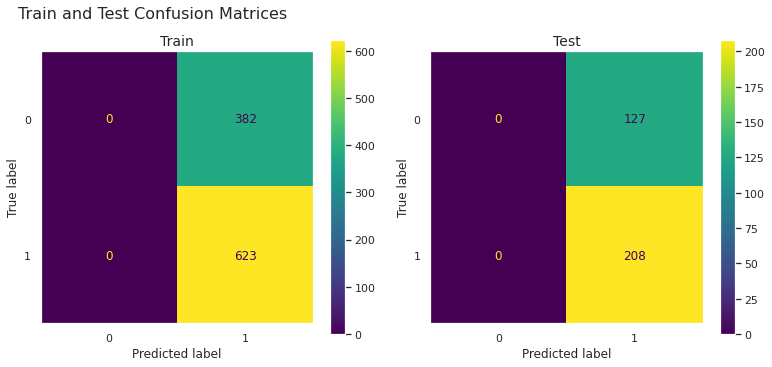

__________________________________________________________________________________________
Treino
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       382
           1       0.62      1.00      0.77       623

    accuracy                           0.62      1005
   macro avg       0.31      0.50      0.38      1005
weighted avg       0.38      0.62      0.47      1005

__________________________________________________________________________________________
Teste
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.62      1.00      0.77       208

    accuracy                           0.62       335
   macro avg       0.31      0.50      0.38       335
weighted avg       0.39      0.62      0.48       335

__________________________________________________________________________________________


In [49]:
X_train, X_test, y_train, y_test, pre_processor = pre_process(columns=final_selection)

pipe_mlp_1 = Pipeline([('pre_proc', pre_processor), 
                       ('mlp', KerasClassifier(build_fn=create_model))])

pipe_mlp_1.fit(X_train, y_train)

data = (X_train, X_test, y_train, y_test)

show_metrics_of(pipe_mlp_1, *data, model_name='MLP: 20 - 20')

### Modelo 1

Agora vamos testar os parâmetros.

In [50]:
X_train, X_test, y_train, y_test, pre_processor = pre_process(columns=final_selection)

pipe_mlp = Pipeline([('pre_proc', pre_processor), 
                     ('mlp', KerasClassifier(build_fn=create_model))])

params_mlp = {
    'mlp__n_units': [[20, 30, 10], [10, 20, 5], [15, 25, 20, 10]],
    'mlp__optimizer': ['RMSprop', 'Adam', 'Nadam', 'SGD'],
    'mlp__dropout': [True, False],
    'mlp__epochs': range(50, 151, 50), 
    'mlp__batch_size': range(5, 21, 5)
}

grid_mlp_1 = RandomizedSearchCV(estimator=pipe_mlp, 
                              param_distributions=params_mlp, 
                              cv=splitter, 
                              n_iter=40, 
                              scoring='f1_weighted',
                              random_state=42, 
                              n_jobs=-1)

grid_mlp_1.fit(X_train, y_train)

2022-06-20 02:32:06.736157: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-20 02:32:06.742423: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-20 02:32:06.742599: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-20 02:32:06.767761: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-20 02:32:06.7742

2022-06-20 02:32:09.278467: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-20 02:32:09.278496: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (diolan): /proc/driver/nvidia/version does not exist
2022-06-20 02:32:09.278893: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-20 02:32:09.306107: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-20 02:32:09.306290: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to

Epoch 1/50
Epoch 1/50
Epoch 1/100
Epoch 1/50
Epoch 1/50


2022-06-20 02:32:09.624702: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-20 02:32:09.624926: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-20 02:32:09.624962: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (diolan): /proc/driver/nvidia/version does not exist
2022-06-20 02:32:09.625366: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
Epoch 1/100
Epoch 1/100
54/54 [==============================] - 1s 4ms/step - loss: 0.6782 - binary_crossentropy: 0.6782
Epoch 2/100
161/161 [==============================] - 2s 4ms/step - loss: 0.6249 - binary_crossentropy: 0.6249
Epoch 2/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6385 - binary_crossentropy: 0.6385
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6300 - binary_crossentropy: 0.6300
Epoch 3/100
161/161 [==============================] - 2s 4ms/step - loss: 0.6360 - binary_crossentropy: 0.6360
Epoch 2/50
161/161 [==============================] - 2s 4ms/step - loss: 0.6804 - binary_crossentropy: 0.6804
Epoch 2/50
54/54 [==============================] - 1s 4ms/step - loss: 0.6796 - binary_crossentropy: 0.6796
Epoch 2/100
161/161 [==============================] - 2s 4ms/step - loss: 0.6275 - binary_crossentropy: 0.6275
Epoch 2/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6129 - binary_cros

54/54 [==============================] - 0s 4ms/step - loss: 0.5802 - binary_crossentropy: 0.5802
Epoch 16/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5797 - binary_crossentropy: 0.5797
Epoch 17/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5870 - binary_crossentropy: 0.5870
Epoch 16/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5748 - binary_crossentropy: 0.5748
Epoch 7/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5849 - binary_crossentropy: 0.5849
Epoch 18/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5675 - binary_crossentropy: 0.5675
Epoch 7/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5771 - binary_crossentropy: 0.5771
Epoch 7/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5893 - binary_crossentropy: 0.5893
Epoch 19/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5843 - binary_crossentropy: 0.5843
Epoch 18/100
5

54/54 [==============================] - 0s 4ms/step - loss: 0.5760 - binary_crossentropy: 0.5760
Epoch 27/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5713 - binary_crossentropy: 0.5713
Epoch 29/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5645 - binary_crossentropy: 0.5645
Epoch 29/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5531 - binary_crossentropy: 0.5531
Epoch 11/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5715 - binary_crossentropy: 0.5715
Epoch 30/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5737 - binary_crossentropy: 0.5737
Epoch 28/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5634 - binary_crossentropy: 0.5634
Epoch 11/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5727 - binary_crossentropy: 0.5727
Epoch 30/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5796 - binary_crossentropy: 0.5796
Epoch 11/5

161/161 [==============================] - 1s 4ms/step - loss: 0.5659 - binary_crossentropy: 0.5659
Epoch 15/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5687 - binary_crossentropy: 0.5687
Epoch 43/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5721 - binary_crossentropy: 0.5721
Epoch 41/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5679 - binary_crossentropy: 0.5679
Epoch 43/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5617 - binary_crossentropy: 0.5617
Epoch 44/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5658 - binary_crossentropy: 0.5658
Epoch 44/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5686 - binary_crossentropy: 0.5686
Epoch 16/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5618 - binary_crossentropy: 0.5618
Epoch 16/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5686 - binary_crossentropy: 0.5686
Epoch 45/10

161/161 [==============================] - 1s 3ms/step - loss: 0.5521 - binary_crossentropy: 0.5521
Epoch 20/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5651 - binary_crossentropy: 0.5651
Epoch 54/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5692 - binary_crossentropy: 0.5692
Epoch 20/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5628 - binary_crossentropy: 0.5628
Epoch 57/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5449 - binary_crossentropy: 0.5449
Epoch 20/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5559 - binary_crossentropy: 0.5559
Epoch 20/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5689 - binary_crossentropy: 0.5689
Epoch 55/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5427 - binary_crossentropy: 0.5427
Epoch 57/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5610 - binary_crossentropy: 0.5610
Epoch 20

161/161 [==============================] - 1s 3ms/step - loss: 0.5417 - binary_crossentropy: 0.5417
Epoch 24/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5568 - binary_crossentropy: 0.5568
Epoch 69/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5565 - binary_crossentropy: 0.5565
Epoch 24/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5658 - binary_crossentropy: 0.5658
Epoch 70/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5514 - binary_crossentropy: 0.5514
Epoch 70/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5510 - binary_crossentropy: 0.5510
Epoch 71/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5513 - binary_crossentropy: 0.5513
Epoch 71/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5575 - binary_crossentropy: 0.5575
Epoch 72/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5486 - binary_crossentropy: 0.5486
Epoch 25/5

54/54 [==============================] - 0s 3ms/step - loss: 0.5495 - binary_crossentropy: 0.5495
Epoch 83/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5694 - binary_crossentropy: 0.5694
Epoch 83/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5525 - binary_crossentropy: 0.5525
Epoch 84/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5513 - binary_crossentropy: 0.5513
Epoch 84/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5562 - binary_crossentropy: 0.5562
Epoch 81/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5348 - binary_crossentropy: 0.5348
Epoch 29/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5467 - binary_crossentropy: 0.5467
Epoch 85/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5484 - binary_crossentropy: 0.5484
Epoch 86/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5521 - binary_crossentropy: 0.5521
Epoch 83/100


161/161 [==============================] - 1s 4ms/step - loss: 0.5467 - binary_crossentropy: 0.5467
Epoch 39/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6708 - binary_crossentropy: 0.6708
Epoch 3/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5318 - binary_crossentropy: 0.5318
Epoch 39/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5772 - binary_crossentropy: 0.5772
Epoch 7/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5462 - binary_crossentropy: 0.5462
Epoch 39/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6511 - binary_crossentropy: 0.6511
Epoch 4/100
41/41 [==============================] - 1s 3ms/step - loss: 0.7025 - binary_crossentropy: 0.7025
Epoch 2/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5648 - binary_crossentropy: 0.5648
Epoch 8/100
41/41 [==============================] - 0s 2ms/step - loss: 0.6877 - binary_crossentropy: 0.6877
Epoch 3/50
161/16

161/161 [==============================] - 1s 4ms/step - loss: 0.5387 - binary_crossentropy: 0.5387
Epoch 43/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5991 - binary_crossentropy: 0.5991
Epoch 19/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5793 - binary_crossentropy: 0.5793
Epoch 16/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5965 - binary_crossentropy: 0.5965
Epoch 20/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5564 - binary_crossentropy: 0.5564
Epoch 44/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5609 - binary_crossentropy: 0.5609
Epoch 21/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5933 - binary_crossentropy: 0.5933
Epoch 21/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5717 - binary_crossentropy: 0.5717
Epoch 17/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5914 - binary_crossentropy: 0.5914
Epoch 22/50
54/

41/41 [==============================] - 0s 3ms/step - loss: 0.5775 - binary_crossentropy: 0.5775
Epoch 39/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5443 - binary_crossentropy: 0.5443
Epoch 47/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5509 - binary_crossentropy: 0.5509
Epoch 32/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5762 - binary_crossentropy: 0.5762
Epoch 28/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5578 - binary_crossentropy: 0.5578
Epoch 48/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5755 - binary_crossentropy: 0.5755
Epoch 41/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5691 - binary_crossentropy: 0.5691
Epoch 29/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5749 - binary_crossentropy: 0.5749
Epoch 42/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5541 - binary_crossentropy: 0.5541
Epoch 34/100
54/5

54/54 [==============================] - 0s 3ms/step - loss: 0.5669 - binary_crossentropy: 0.5669
Epoch 41/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5473 - binary_crossentropy: 0.5473
Epoch 45/100
41/41 [==============================] - 1s 2ms/step - loss: 0.6543 - binary_crossentropy: 0.6543
Epoch 2/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5562 - binary_crossentropy: 0.5562
Epoch 42/100
Epoch 46/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6340 - binary_crossentropy: 0.6340
Epoch 3/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5478 - binary_crossentropy: 0.5478
Epoch 47/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5683 - binary_crossentropy: 0.5683
Epoch 43/100
41/41 [==============================] - 0s 2ms/step - loss: 0.6281 - binary_crossentropy: 0.6281
Epoch 4/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6211 - binary_crossentropy: 0.6211
Epoch 5

41/41 [==============================] - 0s 2ms/step - loss: 0.5772 - binary_crossentropy: 0.5772
Epoch 10/50
Epoch 20/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5500 - binary_crossentropy: 0.5500
Epoch 58/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5573 - binary_crossentropy: 0.5573
Epoch 11/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5544 - binary_crossentropy: 0.5544
Epoch 54/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5793 - binary_crossentropy: 0.5793
Epoch 13/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5948 - binary_crossentropy: 0.5948
Epoch 11/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5777 - binary_crossentropy: 0.5777
Epoch 21/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5554 - binary_crossentropy: 0.5554
Epoch 12/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5773 - binary_crossentropy: 0.5773
Epoch 14

41/41 [==============================] - 0s 2ms/step - loss: 0.5722 - binary_crossentropy: 0.5722
Epoch 24/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5678 - binary_crossentropy: 0.5678
Epoch 35/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5511 - binary_crossentropy: 0.5511
Epoch 27/50
Epoch 25/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5432 - binary_crossentropy: 0.5432
Epoch 68/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5705 - binary_crossentropy: 0.5705
Epoch 25/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5540 - binary_crossentropy: 0.5540
Epoch 64/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5673 - binary_crossentropy: 0.5673
Epoch 36/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5490 - binary_crossentropy: 0.5490
Epoch 26/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5665 - binary_crossentropy: 0.5665
Epoch 28

41/41 [==============================] - 0s 2ms/step - loss: 0.5633 - binary_crossentropy: 0.5633
Epoch 49/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5579 - binary_crossentropy: 0.5579
Epoch 39/50
Epoch 73/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5609 - binary_crossentropy: 0.5609
Epoch 39/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5612 - binary_crossentropy: 0.5612
Epoch 41/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5623 - binary_crossentropy: 0.5623
Epoch 50/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5490 - binary_crossentropy: 0.5490
Epoch 40/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5300 - binary_crossentropy: 0.5300
Epoch 78/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5600 - binary_crossentropy: 0.5600
Epoch 40/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5471 - binary_crossentropy: 0.5471
Epoch 74

161/161 [==============================] - 0s 2ms/step - loss: 0.6024 - binary_crossentropy: 0.6024
Epoch 3/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5575 - binary_crossentropy: 0.5575
Epoch 9/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5726 - binary_crossentropy: 0.5726
Epoch 10/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5711 - binary_crossentropy: 0.5711
Epoch 10/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5734 - binary_crossentropy: 0.5734
Epoch 9/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5747 - binary_crossentropy: 0.5747
Epoch 12/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5692 - binary_crossentropy: 0.5692
Epoch 11/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5723 - binary_crossentropy: 0.5723
Epoch 11/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5569 - binary_crossentropy: 0.5569
Epoch 10/50

161/161 [==============================] - 1s 3ms/step - loss: 0.5515 - binary_crossentropy: 0.5515
Epoch 15/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5753 - binary_crossentropy: 0.5753
Epoch 9/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5722 - binary_crossentropy: 0.5722
Epoch 8/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5719 - binary_crossentropy: 0.5719
Epoch 18/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5665 - binary_crossentropy: 0.5665
Epoch 16/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5714 - binary_crossentropy: 0.5714
Epoch 10/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5715 - binary_crossentropy: 0.5715
Epoch 9/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5756 - binary_crossentropy: 0.5756
Epoch 10/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5581 - binary_crossentropy: 0.5581
Epoch 27/50
54/54

161/161 [==============================] - 1s 3ms/step - loss: 0.5502 - binary_crossentropy: 0.5502
Epoch 20/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5703 - binary_crossentropy: 0.5703
Epoch 22/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5566 - binary_crossentropy: 0.5566
Epoch 22/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5659 - binary_crossentropy: 0.5659
Epoch 21/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5596 - binary_crossentropy: 0.5596
Epoch 21/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5471 - binary_crossentropy: 0.5471
Epoch 40/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5649 - binary_crossentropy: 0.5649
Epoch 23/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5692 - binary_crossentropy: 0.5692
Epoch 23/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5621 - binary_crossentropy: 0.5621
Epoch 15/50


54/54 [==============================] - 0s 3ms/step - loss: 0.5523 - binary_crossentropy: 0.5523
Epoch 35/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5480 - binary_crossentropy: 0.5480
Epoch 25/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5576 - binary_crossentropy: 0.5576
Epoch 26/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5644 - binary_crossentropy: 0.5644
Epoch 36/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5489 - binary_crossentropy: 0.5489
Epoch 36/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5588 - binary_crossentropy: 0.5588
Epoch 37/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5478 - binary_crossentropy: 0.5478
Epoch 26/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5612 - binary_crossentropy: 0.5612
Epoch 38/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5569 - binary_crossentropy: 0.5569
Epoch 27/50
16

161/161 [==============================] - 1s 4ms/step - loss: 0.5646 - binary_crossentropy: 0.5646
Epoch 33/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5519 - binary_crossentropy: 0.5519
Epoch 50/50
54/54 [==============================] - 0s 5ms/step - loss: 0.5636 - binary_crossentropy: 0.5636
Epoch 7/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5522 - binary_crossentropy: 0.5522
Epoch 25/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5620 - binary_crossentropy: 0.5620
Epoch 8/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5471 - binary_crossentropy: 0.5471
Epoch 31/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5551 - binary_crossentropy: 0.5551
Epoch 32/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5617 - binary_crossentropy: 0.5617
Epoch 32/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5654 - binary_crossentropy: 0.5654
Epoch 34/50


54/54 [==============================] - 0s 4ms/step - loss: 0.5766 - binary_crossentropy: 0.5766
Epoch 10/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5473 - binary_crossentropy: 0.5473
Epoch 23/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5632 - binary_crossentropy: 0.5632
Epoch 39/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5721 - binary_crossentropy: 0.5721
Epoch 11/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5449 - binary_crossentropy: 0.5449
Epoch 24/50
Epoch 31/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5457 - binary_crossentropy: 0.5457
Epoch 37/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5438 - binary_crossentropy: 0.5438
Epoch 25/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6181 - binary_crossentropy: 0.6181
Epoch 4/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5430 - binary_crossentropy: 0.5430
Epo

Epoch 38/50
54/54 [==============================] - 0s 5ms/step - loss: 0.5528 - binary_crossentropy: 0.5528
Epoch 25/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5628 - binary_crossentropy: 0.5628
Epoch 45/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5340 - binary_crossentropy: 0.5340
Epoch 40/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5498 - binary_crossentropy: 0.5498
Epoch 27/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5586 - binary_crossentropy: 0.5586
Epoch 44/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5434 - binary_crossentropy: 0.5434
Epoch 43/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5439 - binary_crossentropy: 0.5439
Epoch 37/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5503 - binary_crossentropy: 0.5503
Epoch 44/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5520 - binary_crossentropy: 0.5520


161/161 [==============================] - 1s 3ms/step - loss: 0.5544 - binary_crossentropy: 0.5544
Epoch 49/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5450 - binary_crossentropy: 0.5450
Epoch 48/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5512 - binary_crossentropy: 0.5512
Epoch 49/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5913 - binary_crossentropy: 0.5913
Epoch 13/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5435 - binary_crossentropy: 0.5435
Epoch 42/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5443 - binary_crossentropy: 0.5443
Epoch 43/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5409 - binary_crossentropy: 0.5409
Epoch 44/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5795 - binary_crossentropy: 0.5795
Epoch 14/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5444 - binary_crossentropy: 0.5444
Epoch 45/50


161/161 [==============================] - 1s 3ms/step - loss: 0.5732 - binary_crossentropy: 0.5732
Epoch 7/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5717 - binary_crossentropy: 0.5717
Epoch 14/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5641 - binary_crossentropy: 0.5641
Epoch 13/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5684 - binary_crossentropy: 0.5684
Epoch 30/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5808 - binary_crossentropy: 0.5808
Epoch 17/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5799 - binary_crossentropy: 0.5799
Epoch 8/50
Epoch 16/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5644 - binary_crossentropy: 0.5644
Epoch 14/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5662 - binary_crossentropy: 0.5662
Epoch 15/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5702 - binary_crossentropy: 0

161/161 [==============================] - 1s 3ms/step - loss: 0.5722 - binary_crossentropy: 0.5722
Epoch 24/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5813 - binary_crossentropy: 0.5813
Epoch 25/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5785 - binary_crossentropy: 0.5785
Epoch 22/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5607 - binary_crossentropy: 0.5607
Epoch 17/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5669 - binary_crossentropy: 0.5669
Epoch 25/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5809 - binary_crossentropy: 0.5809
Epoch 26/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5837 - binary_crossentropy: 0.5837
Epoch 23/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5599 - binary_crossentropy: 0.5599
Epoch 18/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5593 - binary_crossentropy: 0.5593
Epoc

161/161 [==============================] - 1s 4ms/step - loss: 0.5723 - binary_crossentropy: 0.5723
Epoch 33/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6054 - binary_crossentropy: 0.6054
Epoch 3/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5597 - binary_crossentropy: 0.5597
Epoch 32/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5492 - binary_crossentropy: 0.5492
Epoch 33/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5663 - binary_crossentropy: 0.5663
Epoch 48/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5658 - binary_crossentropy: 0.5658
Epoch 34/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5803 - binary_crossentropy: 0.5803
Epoch 35/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5490 - binary_crossentropy: 0.5490
Epoch 28/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5543 - binary_crossentropy: 0.5543
Epoch

161/161 [==============================] - 1s 4ms/step - loss: 0.5667 - binary_crossentropy: 0.5667
Epoch 39/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5400 - binary_crossentropy: 0.5400
Epoch 35/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5606 - binary_crossentropy: 0.5606
Epoch 12/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5467 - binary_crossentropy: 0.5467
Epoch 42/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5529 - binary_crossentropy: 0.5529
Epoch 41/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5605 - binary_crossentropy: 0.5605
Epoch 39/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5505 - binary_crossentropy: 0.5505
Epoch 40/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5870 - binary_crossentropy: 0.5870
Epoch 3/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5413 - binary_crossentropy: 0.5413
Epoch

161/161 [==============================] - 1s 4ms/step - loss: 0.5645 - binary_crossentropy: 0.5645
Epoch 46/50
Epoch 48/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5704 - binary_crossentropy: 0.5704
Epoch 11/50
Epoch 49/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5324 - binary_crossentropy: 0.5324
Epoch 44/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5553 - binary_crossentropy: 0.5553
Epoch 21/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5567 - binary_crossentropy: 0.5567
Epoch 48/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5551 - binary_crossentropy: 0.5551
Epoch 49/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5527 - binary_crossentropy: 0.5527
Epoch 12/50
Epoch 47/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5673 - binary_crossentropy: 0.5673
Epoch 50/50
161/161 [==============================] - 1s 3ms/step - loss: 0.555

54/54 [==============================] - 0s 3ms/step - loss: 0.5951 - binary_crossentropy: 0.5951
Epoch 25/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5906 - binary_crossentropy: 0.5906
Epoch 18/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5894 - binary_crossentropy: 0.5894
Epoch 30/150
 57/161 [=========>....................] - ETA: 0s - loss: 0.5725 - binary_crossentropy: 0.5725Epoch 26/150
Epoch 35/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5953 - binary_crossentropy: 0.5953
Epoch 19/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5647 - binary_crossentropy: 0.5647
Epoch 11/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5900 - binary_crossentropy: 0.5900
Epoch 31/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5933 - binary_crossentropy: 0.5933
Epoch 20/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5973 - binary_crossentropy: 0.5973
Epoc

161/161 [==============================] - 0s 3ms/step - loss: 0.5575 - binary_crossentropy: 0.5575
Epoch 16/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5940 - binary_crossentropy: 0.5940
Epoch 41/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5465 - binary_crossentropy: 0.5465
Epoch 40/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5782 - binary_crossentropy: 0.5782
Epoch 46/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5909 - binary_crossentropy: 0.5909
Epoch 42/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5715 - binary_crossentropy: 0.5715
Epoch 47/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5824 - binary_crossentropy: 0.5824
Epoch 43/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5698 - binary_crossentropy: 0.5698
Epoch 36/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5321 - binary_crossentropy: 0.5321
Epoch 31/5

54/54 [==============================] - 0s 3ms/step - loss: 0.5879 - binary_crossentropy: 0.5879
Epoch 59/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5280 - binary_crossentropy: 0.5280
Epoch 36/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5515 - binary_crossentropy: 0.5515
Epoch 22/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5697 - binary_crossentropy: 0.5697
Epoch 51/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5673 - binary_crossentropy: 0.5673
Epoch 64/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5428 - binary_crossentropy: 0.5428
Epoch 46/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5648 - binary_crossentropy: 0.5648
Epoch 65/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5713 - binary_crossentropy: 0.5713
Epoch 61/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5795 - binary_crossentropy: 0.5795
Epoch 62/15

54/54 [==============================] - 0s 3ms/step - loss: 0.5634 - binary_crossentropy: 0.5634
Epoch 81/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5857 - binary_crossentropy: 0.5857
Epoch 77/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5694 - binary_crossentropy: 0.5694
Epoch 67/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5602 - binary_crossentropy: 0.5602
Epoch 82/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5697 - binary_crossentropy: 0.5697
Epoch 68/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5244 - binary_crossentropy: 0.5244
Epoch 42/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5462 - binary_crossentropy: 0.5462
Epoch 28/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5737 - binary_crossentropy: 0.5737
Epoch 83/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5755 - binary_crossentropy: 0.5755
Epoch 79/150

54/54 [==============================] - 0s 3ms/step - loss: 0.6669 - binary_crossentropy: 0.6669
Epoch 10/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5665 - binary_crossentropy: 0.5665
Epoch 83/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5709 - binary_crossentropy: 0.5709
Epoch 47/50
Epoch 98/150
Epoch 93/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5362 - binary_crossentropy: 0.5362
Epoch 33/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5738 - binary_crossentropy: 0.5738
Epoch 94/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5605 - binary_crossentropy: 0.5605
Epoch 99/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5580 - binary_crossentropy: 0.5580
Epoch 85/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5689 - binary_crossentropy: 0.5689
Epoch 95/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5615 - binary_crossentr

54/54 [==============================] - 0s 3ms/step - loss: 0.5657 - binary_crossentropy: 0.5657
Epoch 107/150
54/54 [==============================] - 0s 2ms/step - loss: 0.6264 - binary_crossentropy: 0.6264
Epoch 25/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5615 - binary_crossentropy: 0.5615
Epoch 112/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5643 - binary_crossentropy: 0.5643
Epoch 98/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5719 - binary_crossentropy: 0.5719
Epoch 108/150
54/54 [==============================] - 0s 2ms/step - loss: 0.6227 - binary_crossentropy: 0.6227
Epoch 26/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5551 - binary_crossentropy: 0.5551
Epoch 113/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5588 - binary_crossentropy: 0.5588
Epoch 99/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5724 - binary_crossentropy: 0.5724
Epoch 109/

54/54 [==============================] - 0s 2ms/step - loss: 0.5536 - binary_crossentropy: 0.5536
Epoch 126/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5640 - binary_crossentropy: 0.5640
Epoch 122/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5942 - binary_crossentropy: 0.5942
Epoch 11/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5820 - binary_crossentropy: 0.5820
Epoch 40/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5597 - binary_crossentropy: 0.5597
Epoch 127/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5929 - binary_crossentropy: 0.5929
Epoch 12/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5851 - binary_crossentropy: 0.5851
Epoch 41/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5588 - binary_crossentropy: 0.5588
Epoch 114/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5792 - binary_crossentropy: 0.5792
Epoch 124/

54/54 [==============================] - 0s 2ms/step - loss: 0.5669 - binary_crossentropy: 0.5669
Epoch 52/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5824 - binary_crossentropy: 0.5824
Epoch 134/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5255 - binary_crossentropy: 0.5255
Epoch 46/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5562 - binary_crossentropy: 0.5562
Epoch 138/150
Epoch 125/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5937 - binary_crossentropy: 0.5937
Epoch 23/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5625 - binary_crossentropy: 0.5625
Epoch 53/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5681 - binary_crossentropy: 0.5681
Epoch 135/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5545 - binary_crossentropy: 0.5545
Epoch 126/150
Epoch 139/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5842 - binary_cr

54/54 [==============================] - 0s 2ms/step - loss: 0.5738 - binary_crossentropy: 0.5738
Epoch 36/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5666 - binary_crossentropy: 0.5666
Epoch 66/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5635 - binary_crossentropy: 0.5635
Epoch 139/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5808 - binary_crossentropy: 0.5808
Epoch 37/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5685 - binary_crossentropy: 0.5685
Epoch 149/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5588 - binary_crossentropy: 0.5588
Epoch 67/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5535 - binary_crossentropy: 0.5535
Epoch 140/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5754 - binary_crossentropy: 0.5754
Epoch 38/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5657 - binary_crossentropy: 0.5657
Epoch 1/50


54/54 [==============================] - 0s 3ms/step - loss: 0.5743 - binary_crossentropy: 0.5743
Epoch 52/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5683 - binary_crossentropy: 0.5683
Epoch 82/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5737 - binary_crossentropy: 0.5737
Epoch 53/150
81/81 [==============================] - 0s 3ms/step - loss: 0.6086 - binary_crossentropy: 0.6086
Epoch 5/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6421 - binary_crossentropy: 0.6421
Epoch 6/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6016 - binary_crossentropy: 0.6016
Epoch 7/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5659 - binary_crossentropy: 0.5659
Epoch 83/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5626 - binary_crossentropy: 0.5626
Epoch 54/150
81/81 [==============================] - 0s 3ms/step - loss: 0.6023 - binary_crossentropy: 0.6023
Epoch 7/50
Epoch 6/5

54/54 [==============================] - 0s 3ms/step - loss: 0.5579 - binary_crossentropy: 0.5579
Epoch 98/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5905 - binary_crossentropy: 0.5905
Epoch 17/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5913 - binary_crossentropy: 0.5913
Epoch 16/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5656 - binary_crossentropy: 0.5656
Epoch 69/150
81/81 [==============================] - 0s 2ms/step - loss: 0.5847 - binary_crossentropy: 0.5847
Epoch 15/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5597 - binary_crossentropy: 0.5597
Epoch 99/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5753 - binary_crossentropy: 0.5753
Epoch 70/150
81/81 [==============================] - 0s 2ms/step - loss: 0.5885 - binary_crossentropy: 0.5885
Epoch 17/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5544 - binary_crossentropy: 0.5544
Epoch 100/150
81/8

54/54 [==============================] - 0s 3ms/step - loss: 0.5664 - binary_crossentropy: 0.5664
Epoch 26/50
Epoch 112/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5595 - binary_crossentropy: 0.5595
Epoch 83/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5833 - binary_crossentropy: 0.5833
Epoch 25/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5765 - binary_crossentropy: 0.5765
Epoch 24/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5749 - binary_crossentropy: 0.5749
Epoch 18/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5585 - binary_crossentropy: 0.5585
Epoch 113/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5654 - binary_crossentropy: 0.5654
Epoch 84/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5568 - binary_crossentropy: 0.5568
Epoch 114/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5846 - binary_crossentropy: 0.5846
Ep

81/81 [==============================] - 0s 3ms/step - loss: 0.5627 - binary_crossentropy: 0.5627
Epoch 32/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5706 - binary_crossentropy: 0.5706
Epoch 97/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5674 - binary_crossentropy: 0.5674
Epoch 26/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6261 - binary_crossentropy: 0.6261
Epoch 126/150
Epoch 7/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5833 - binary_crossentropy: 0.5833
Epoch 35/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5577 - binary_crossentropy: 0.5577
Epoch 127/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5713 - binary_crossentropy: 0.5713
Epoch 33/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5739 - binary_crossentropy: 0.5739
Epoch 27/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5582 - binary_crossentropy: 0.5582
Epoch 

81/81 [==============================] - 0s 3ms/step - loss: 0.5818 - binary_crossentropy: 0.5818
Epoch 41/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5600 - binary_crossentropy: 0.5600
Epoch 111/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5748 - binary_crossentropy: 0.5748
Epoch 43/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5670 - binary_crossentropy: 0.5670
Epoch 112/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5535 - binary_crossentropy: 0.5535
Epoch 35/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5620 - binary_crossentropy: 0.5620
Epoch 41/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5465 - binary_crossentropy: 0.5465
Epoch 42/50
Epoch 141/150
81/81 [==============================] - 0s 3ms/step - loss: 0.6027 - binary_crossentropy: 0.6027
Epoch 16/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5750 - binary_crossentropy: 0.5750
Epoc

81/81 [==============================] - 0s 3ms/step - loss: 0.5869 - binary_crossentropy: 0.5869
Epoch 23/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5518 - binary_crossentropy: 0.5518
Epoch 125/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5724 - binary_crossentropy: 0.5724
Epoch 49/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6647 - binary_crossentropy: 0.6647
Epoch 5/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5695 - binary_crossentropy: 0.5695
Epoch 49/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5581 - binary_crossentropy: 0.5581
Epoch 126/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5595 - binary_crossentropy: 0.5595
Epoch 43/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5893 - binary_crossentropy: 0.5893
Epoch 24/50
7/7 [==============================] - 0s 2ms/step
Epoch 50/50
54/54 [==============================] - 0s 2ms/step 

54/54 [==============================] - 0s 3ms/step - loss: 0.6278 - binary_crossentropy: 0.6278
Epoch 6/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5908 - binary_crossentropy: 0.5908
Epoch 31/50
54/54 [==============================] - 1s 3ms/step - loss: 0.6900 - binary_crossentropy: 0.6900
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6239 - binary_crossentropy: 0.6239
Epoch 20/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6125 - binary_crossentropy: 0.6125
Epoch 9/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6247 - binary_crossentropy: 0.6247
Epoch 7/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5528 - binary_crossentropy: 0.5528
Epoch 139/150
54/54 [==============================] - 0s 3ms/step - loss: 0.6703 - binary_crossentropy: 0.6703
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6207 - binary_crossentropy: 0.6207
Epoch 21/100
54/54 

54/54 [==============================] - 0s 2ms/step - loss: 0.5894 - binary_crossentropy: 0.5894
Epoch 20/100
Epoch 32/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6259 - binary_crossentropy: 0.6259
Epoch 14/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5934 - binary_crossentropy: 0.5934
Epoch 19/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6121 - binary_crossentropy: 0.6121
Epoch 6/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5826 - binary_crossentropy: 0.5826
Epoch 33/100
Epoch 21/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5815 - binary_crossentropy: 0.5815
Epoch 38/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5503 - binary_crossentropy: 0.5503
Epoch 150/150
54/54 [==============================] - 0s 3ms/step - loss: 0.6224 - binary_crossentropy: 0.6224
Epoch 20/100
Epoch 15/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5811 - bina

Epoch 17/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5851 - binary_crossentropy: 0.5851
Epoch 25/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5763 - binary_crossentropy: 0.5763
Epoch 31/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5738 - binary_crossentropy: 0.5738
Epoch 32/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5778 - binary_crossentropy: 0.5778
Epoch 44/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5825 - binary_crossentropy: 0.5825
Epoch 44/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5826 - binary_crossentropy: 0.5826
Epoch 18/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5817 - binary_crossentropy: 0.5817
Epoch 26/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5733 - binary_crossentropy: 0.5733
Epoch 33/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5770 - binary_crossentropy: 0.5770
Ep

54/54 [==============================] - 0s 3ms/step - loss: 0.5626 - binary_crossentropy: 0.5626
Epoch 35/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5712 - binary_crossentropy: 0.5712
Epoch 42/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6098 - binary_crossentropy: 0.6098
Epoch 10/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5723 - binary_crossentropy: 0.5723
Epoch 55/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5733 - binary_crossentropy: 0.5733
Epoch 28/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5677 - binary_crossentropy: 0.5677
Epoch 42/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5613 - binary_crossentropy: 0.5613
Epoch 36/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6105 - binary_crossentropy: 0.6105
Epoch 11/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5721 - binary_crossentropy: 0.5721
Epoch 56/100
54/

54/54 [==============================] - 0s 2ms/step - loss: 0.5676 - binary_crossentropy: 0.5676
Epoch 39/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6023 - binary_crossentropy: 0.6023
Epoch 23/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5681 - binary_crossentropy: 0.5681
Epoch 67/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5620 - binary_crossentropy: 0.5620
Epoch 53/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5686 - binary_crossentropy: 0.5686
Epoch 54/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5536 - binary_crossentropy: 0.5536
Epoch 47/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5674 - binary_crossentropy: 0.5674
Epoch 68/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5628 - binary_crossentropy: 0.5628
Epoch 54/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5543 - binary_crossentropy: 0.5543
Epoch 48/100
54

54/54 [==============================] - 0s 3ms/step - loss: 0.5652 - binary_crossentropy: 0.5652
Epoch 77/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6477 - binary_crossentropy: 0.6477
Epoch 9/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5598 - binary_crossentropy: 0.5598
Epoch 63/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5509 - binary_crossentropy: 0.5509
Epoch 57/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5670 - binary_crossentropy: 0.5670
Epoch 64/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5628 - binary_crossentropy: 0.5628
Epoch 50/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5868 - binary_crossentropy: 0.5868
Epoch 35/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5653 - binary_crossentropy: 0.5653
Epoch 78/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5602 - binary_crossentropy: 0.5602
Epoch 64/100
54/5

44/54 [=======================>......] - ETA: 0s - loss: 0.5580 - binary_crossentropy: 0.5580Epoch 20/50
Epoch 87/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5581 - binary_crossentropy: 0.5581
Epoch 73/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5602 - binary_crossentropy: 0.5602
Epoch 60/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5806 - binary_crossentropy: 0.5806
Epoch 45/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5487 - binary_crossentropy: 0.5487
Epoch 67/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5666 - binary_crossentropy: 0.5666
Epoch 74/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6017 - binary_crossentropy: 0.6017
Epoch 21/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5602 - binary_crossentropy: 0.5602
Epoch 74/100
Epoch 61/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5833 - binary_crossentropy: 0.5

54/54 [==============================] - 0s 2ms/step - loss: 0.5657 - binary_crossentropy: 0.5657
Epoch 84/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5565 - binary_crossentropy: 0.5565
Epoch 84/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5900 - binary_crossentropy: 0.5900
Epoch 71/100
Epoch 33/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5595 - binary_crossentropy: 0.5595
Epoch 98/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5472 - binary_crossentropy: 0.5472
Epoch 78/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5877 - binary_crossentropy: 0.5877
Epoch 85/100
Epoch 34/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5559 - binary_crossentropy: 0.5559
Epoch 85/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5580 - binary_crossentropy: 0.5580
Epoch 72/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5593 - binary_crossentrop

54/54 [==============================] - 0s 2ms/step - loss: 0.5535 - binary_crossentropy: 0.5535
Epoch 98/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5462 - binary_crossentropy: 0.5462
Epoch 91/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5556 - binary_crossentropy: 0.5556
Epoch 85/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5650 - binary_crossentropy: 0.5650
Epoch 98/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5827 - binary_crossentropy: 0.5827
Epoch 49/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5539 - binary_crossentropy: 0.5539
Epoch 99/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5455 - binary_crossentropy: 0.5455
Epoch 92/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5554 - binary_crossentropy: 0.5554
Epoch 86/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5794 - binary_crossentropy: 0.5794
Epoch 50/50
54/

41/41 [==============================] - 0s 2ms/step - loss: 0.5852 - binary_crossentropy: 0.5852
Epoch 14/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5826 - binary_crossentropy: 0.5826
Epoch 13/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6057 - binary_crossentropy: 0.6057
Epoch 11/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5855 - binary_crossentropy: 0.5855
Epoch 15/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5832 - binary_crossentropy: 0.5832
Epoch 14/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6060 - binary_crossentropy: 0.6060
Epoch 12/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6013 - binary_crossentropy: 0.6013
Epoch 16/50
161/161 [==============================] - 1s 2ms/step - loss: 0.6535 - binary_crossentropy: 0.6535
Epoch 2/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5910 - binary_crossentropy: 0.5910
Epoch 15/50
41/41 [=

41/41 [==============================] - 0s 2ms/step - loss: 0.5637 - binary_crossentropy: 0.5637
Epoch 32/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5776 - binary_crossentropy: 0.5776
Epoch 30/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5838 - binary_crossentropy: 0.5838
Epoch 34/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5599 - binary_crossentropy: 0.5599
Epoch 33/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5817 - binary_crossentropy: 0.5817
Epoch 31/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5725 - binary_crossentropy: 0.5725
Epoch 35/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5716 - binary_crossentropy: 0.5716
Epoch 34/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5864 - binary_crossentropy: 0.5864
Epoch 32/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5723 - binary_crossentropy: 0.5723
Epoch 36/50
41/41 [===

41/41 [==============================] - 0s 3ms/step - loss: 0.5753 - binary_crossentropy: 0.5753
Epoch 49/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5637 - binary_crossentropy: 0.5637
Epoch 50/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5991 - binary_crossentropy: 0.5991
Epoch 11/150
Epoch 10/150
161/161 [==============================] - 1s 3ms/step - loss: 0.6924 - binary_crossentropy: 0.6924
Epoch 2/150
161/161 [==============================] - 0s 2ms/step - loss: 0.6134 - binary_crossentropy: 0.6134
Epoch 4/150
161/161 [==============================] - 0s 2ms/step - loss: 0.5940 - binary_crossentropy: 0.5940
Epoch 11/150
161/161 [==============================] - 0s 2ms/step - loss: 0.6522 - binary_crossentropy: 0.6522
Epoch 3/150
161/161 [==============================] - 0s 2ms/step - loss: 0.5871 - binary_crossentropy: 0.5871
Epoch 12/150
161/161 [==============================] - 0s 2ms/step - loss: 0.5937 - binary_crossentropy:

81/81 [==============================] - 0s 4ms/step - loss: 0.5812 - binary_crossentropy: 0.5812
Epoch 11/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5685 - binary_crossentropy: 0.5685
Epoch 11/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5726 - binary_crossentropy: 0.5726
Epoch 13/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5746 - binary_crossentropy: 0.5746
Epoch 23/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5780 - binary_crossentropy: 0.5780
Epoch 12/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5668 - binary_crossentropy: 0.5668
Epoch 12/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5729 - binary_crossentropy: 0.5729
Epoch 14/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5898 - binary_crossentropy: 0.5898
Epoch 17/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5742 - binary_crossentropy: 0.5742
Epoch 31/150
8

81/81 [==============================] - 0s 3ms/step - loss: 0.5744 - binary_crossentropy: 0.5744
Epoch 22/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5589 - binary_crossentropy: 0.5589
Epoch 23/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5645 - binary_crossentropy: 0.5645
Epoch 25/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5812 - binary_crossentropy: 0.5812
Epoch 34/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5746 - binary_crossentropy: 0.5746
Epoch 28/150
Epoch 23/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5828 - binary_crossentropy: 0.5828
Epoch 22/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5591 - binary_crossentropy: 0.5591
Epoch 27/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5802 - binary_crossentropy: 0.5802
Epoch 36/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5578 - binary_crossentropy: 0.

81/81 [==============================] - 0s 3ms/step - loss: 0.5652 - binary_crossentropy: 0.5652
Epoch 35/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5753 - binary_crossentropy: 0.5753
Epoch 39/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5783 - binary_crossentropy: 0.5783
Epoch 33/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5713 - binary_crossentropy: 0.5713
Epoch 36/50
Epoch 27/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5439 - binary_crossentropy: 0.5439
Epoch 32/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5744 - binary_crossentropy: 0.5744
Epoch 41/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5519 - binary_crossentropy: 0.5519
Epoch 39/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5714 - binary_crossentropy: 0.5714
Epoch 40/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5522 - binary_crossentropy:

161/161 [==============================] - 1s 4ms/step - loss: 0.5727 - binary_crossentropy: 0.5727
Epoch 46/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5640 - binary_crossentropy: 0.5640
Epoch 47/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5452 - binary_crossentropy: 0.5452
Epoch 49/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5455 - binary_crossentropy: 0.5455
Epoch 50/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5694 - binary_crossentropy: 0.5694
Epoch 39/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5471 - binary_crossentropy: 0.5471
Epoch 38/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5626 - binary_crossentropy: 0.5626
Epoch 49/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5674 - binary_crossentropy: 0.5674
Epoch 47/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5738 - binary_crossentropy: 0.5738
Epoch 46

81/81 [==============================] - 0s 4ms/step - loss: 0.5917 - binary_crossentropy: 0.5917
Epoch 6/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5680 - binary_crossentropy: 0.5680
Epoch 6/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5998 - binary_crossentropy: 0.5998
Epoch 14/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5971 - binary_crossentropy: 0.5971
Epoch 15/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5890 - binary_crossentropy: 0.5890
Epoch 7/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5646 - binary_crossentropy: 0.5646
Epoch 38/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5950 - binary_crossentropy: 0.5950
Epoch 16/150
81/81 [==============================] - 0s 5ms/step - loss: 0.5650 - binary_crossentropy: 0.5650
Epoch 7/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5685 - binary_crossentropy: 0.5685
Epoch 50/150
161/1

81/81 [==============================] - 0s 3ms/step - loss: 0.5735 - binary_crossentropy: 0.5735
Epoch 16/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5735 - binary_crossentropy: 0.5735
Epoch 37/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5558 - binary_crossentropy: 0.5558
Epoch 16/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5685 - binary_crossentropy: 0.5685
Epoch 48/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5728 - binary_crossentropy: 0.5728
Epoch 38/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5703 - binary_crossentropy: 0.5703
Epoch 17/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5449 - binary_crossentropy: 0.5449
Epoch 47/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5728 - binary_crossentropy: 0.5728
Epoch 39/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5549 - binary_crossentropy: 0.5549
Epoch 17/50
1

161/161 [==============================] - 1s 4ms/step - loss: 0.5654 - binary_crossentropy: 0.5654
Epoch 52/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5503 - binary_crossentropy: 0.5503
Epoch 26/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5686 - binary_crossentropy: 0.5686
Epoch 59/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5683 - binary_crossentropy: 0.5683
Epoch 60/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5583 - binary_crossentropy: 0.5583
Epoch 46/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5481 - binary_crossentropy: 0.5481
Epoch 27/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5679 - binary_crossentropy: 0.5679
Epoch 61/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5647 - binary_crossentropy: 0.5647
Epoch 53/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5671 - binary_crossentropy: 0.5671
Epoch 64/1

41/41 [==============================] - 0s 3ms/step - loss: 0.5644 - binary_crossentropy: 0.5644
Epoch 79/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5410 - binary_crossentropy: 0.5410
Epoch 55/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5454 - binary_crossentropy: 0.5454
Epoch 36/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5503 - binary_crossentropy: 0.5503
Epoch 50/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5644 - binary_crossentropy: 0.5644
Epoch 80/150
137/161 [========================>.....] - ETA: 0s - loss: 0.5668 - binary_crossentropy: 0.5668Epoch 62/150
Epoch 37/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5638 - binary_crossentropy: 0.5638
Epoch 81/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5570 - binary_crossentropy: 0.5570
Epoch 64/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5459 - binary_crossentropy: 0.5459


161/161 [==============================] - 1s 4ms/step - loss: 0.5528 - binary_crossentropy: 0.5528
Epoch 54/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5611 - binary_crossentropy: 0.5611
Epoch 101/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5582 - binary_crossentropy: 0.5582
Epoch 68/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5514 - binary_crossentropy: 0.5514
Epoch 66/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5456 - binary_crossentropy: 0.5456
Epoch 47/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5612 - binary_crossentropy: 0.5612
Epoch 103/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5654 - binary_crossentropy: 0.5654
Epoch 61/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5379 - binary_crossentropy: 0.5379
Epoch 47/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5440 - binary_crossentropy: 0.5440
Epoc

41/41 [==============================] - 0s 3ms/step - loss: 0.5592 - binary_crossentropy: 0.5592
Epoch 123/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6413 - binary_crossentropy: 0.6413
Epoch 5/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5594 - binary_crossentropy: 0.5594
Epoch 124/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6380 - binary_crossentropy: 0.6380
Epoch 5/150
Epoch 6/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5370 - binary_crossentropy: 0.5370
Epoch 64/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5591 - binary_crossentropy: 0.5591
Epoch 125/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6348 - binary_crossentropy: 0.6348
Epoch 7/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6417 - binary_crossentropy: 0.6417
Epoch 6/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5591 - binary_crossentropy: 0.5591
E

Epoch 19/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6056 - binary_crossentropy: 0.6056
Epoch 20/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5583 - binary_crossentropy: 0.5583
Epoch 139/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5401 - binary_crossentropy: 0.5401
Epoch 67/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6031 - binary_crossentropy: 0.6031
Epoch 20/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6035 - binary_crossentropy: 0.6035
Epoch 21/150
Epoch 68/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5579 - binary_crossentropy: 0.5579
Epoch 140/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6019 - binary_crossentropy: 0.6019
Epoch 22/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5986 - binary_crossentropy: 0.5986
Epoch 22/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5575 - binary_cross

41/41 [==============================] - 0s 3ms/step - loss: 0.5832 - binary_crossentropy: 0.5832
Epoch 38/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5783 - binary_crossentropy: 0.5783
Epoch 36/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5644 - binary_crossentropy: 0.5644
Epoch 76/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5661 - binary_crossentropy: 0.5661
Epoch 71/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5830 - binary_crossentropy: 0.5830
Epoch 39/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5776 - binary_crossentropy: 0.5776
Epoch 37/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5822 - binary_crossentropy: 0.5822
Epoch 40/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5772 - binary_crossentropy: 0.5772
Epoch 38/150
 46/161 [=======>......................] - ETA: 0s - loss: 0.5180 - binary_crossentropy: 0.5180Epoch 65/150


161/161 [==============================] - 1s 4ms/step - loss: 0.5578 - binary_crossentropy: 0.5578
Epoch 79/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5701 - binary_crossentropy: 0.5701
Epoch 53/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6571 - binary_crossentropy: 0.6571
Epoch 16/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5747 - binary_crossentropy: 0.5747
Epoch 56/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5508 - binary_crossentropy: 0.5508
Epoch 82/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5697 - binary_crossentropy: 0.5697
Epoch 54/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5478 - binary_crossentropy: 0.5478
Epoch 68/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5739 - binary_crossentropy: 0.5739
Epoch 57/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5696 - binary_crossentropy: 0.5696
Epoch 55

41/41 [==============================] - 0s 2ms/step - loss: 0.5663 - binary_crossentropy: 0.5663
Epoch 85/150
Epoch 70/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5514 - binary_crossentropy: 0.5514
Epoch 82/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5592 - binary_crossentropy: 0.5592
Epoch 71/150
Epoch 33/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5690 - binary_crossentropy: 0.5690
Epoch 73/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6382 - binary_crossentropy: 0.6382
Epoch 34/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5695 - binary_crossentropy: 0.5695
Epoch 74/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5580 - binary_crossentropy: 0.5580
Epoch 78/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5322 - binary_crossentropy: 0.5322
Epoch 77/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5656 - binary_c

161/161 [==============================] - 1s 4ms/step - loss: 0.5590 - binary_crossentropy: 0.5590
Epoch 81/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6002 - binary_crossentropy: 0.6002
Epoch 50/150
Epoch 87/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5445 - binary_crossentropy: 0.5445
Epoch 80/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5665 - binary_crossentropy: 0.5665
Epoch 90/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5629 - binary_crossentropy: 0.5629
Epoch 88/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5978 - binary_crossentropy: 0.5978
Epoch 51/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5664 - binary_crossentropy: 0.5664
Epoch 91/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5626 - binary_crossentropy: 0.5626
Epoch 89/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5946 - binary_crossentropy: 0.59

41/41 [==============================] - 0s 3ms/step - loss: 0.5644 - binary_crossentropy: 0.5644
Epoch 107/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5605 - binary_crossentropy: 0.5605
Epoch 104/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5649 - binary_crossentropy: 0.5649
Epoch 108/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5632 - binary_crossentropy: 0.5632
Epoch 68/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5500 - binary_crossentropy: 0.5500
Epoch 92/150
156/161 [============================>.] - ETA: 0s - loss: 0.5575 - binary_crossentropy: 0.5575Epoch 105/150
Epoch 78/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5624 - binary_crossentropy: 0.5624
Epoch 69/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5654 - binary_crossentropy: 0.5654
Epoch 109/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5608 - binary_crossentropy: 0.56

41/41 [==============================] - 0s 3ms/step - loss: 0.5626 - binary_crossentropy: 0.5626
Epoch 123/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5565 - binary_crossentropy: 0.5565
Epoch 83/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5443 - binary_crossentropy: 0.5443
Epoch 95/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5594 - binary_crossentropy: 0.5594
Epoch 121/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5560 - binary_crossentropy: 0.5560
Epoch 84/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5641 - binary_crossentropy: 0.5641
Epoch 124/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5601 - binary_crossentropy: 0.5601
Epoch 92/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5594 - binary_crossentropy: 0.5594
Epoch 122/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5473 - binary_crossentropy: 0.5473
Epoc

41/41 [==============================] - 0s 2ms/step - loss: 0.5508 - binary_crossentropy: 0.5508
Epoch 114/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5504 - binary_crossentropy: 0.5504
Epoch 101/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5507 - binary_crossentropy: 0.5507
Epoch 116/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5568 - binary_crossentropy: 0.5568
Epoch 98/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5311 - binary_crossentropy: 0.5311
Epoch 87/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5292 - binary_crossentropy: 0.5292
Epoch 93/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5508 - binary_crossentropy: 0.5508
Epoch 117/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5505 - binary_crossentropy: 0.5505
Epoch 118/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5509 - binary_crossentropy: 0.5509
E

41/41 [==============================] - 0s 3ms/step - loss: 0.5807 - binary_crossentropy: 0.5807
Epoch 27/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5413 - binary_crossentropy: 0.5413
Epoch 98/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5796 - binary_crossentropy: 0.5796
Epoch 28/150
161/161 [==============================] - 1s 3ms/step - loss: 0.6041 - binary_crossentropy: 0.6041
Epoch 3/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5788 - binary_crossentropy: 0.5788
Epoch 29/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5781 - binary_crossentropy: 0.5781
Epoch 30/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5754 - binary_crossentropy: 0.5754
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5768 - binary_crossentropy: 0.5768
Epoch 31/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5462 - binary_crossentropy: 0.5462
Epoch 11

41/41 [==============================] - 0s 3ms/step - loss: 0.5671 - binary_crossentropy: 0.5671
Epoch 52/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5708 - binary_crossentropy: 0.5708
Epoch 12/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5672 - binary_crossentropy: 0.5672
Epoch 53/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5403 - binary_crossentropy: 0.5403
Epoch 117/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5670 - binary_crossentropy: 0.5670
Epoch 54/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5289 - binary_crossentropy: 0.5289
Epoch 103/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5540 - binary_crossentropy: 0.5540
Epoch 110/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5772 - binary_crossentropy: 0.5772
Epoch 9/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5658 - binary_crossentropy: 0.5658
Ep

41/41 [==============================] - 0s 3ms/step - loss: 0.5585 - binary_crossentropy: 0.5585
Epoch 104/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5326 - binary_crossentropy: 0.5326
Epoch 119/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5580 - binary_crossentropy: 0.5580
Epoch 105/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5341 - binary_crossentropy: 0.5341
Epoch 113/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5434 - binary_crossentropy: 0.5434
Epoch 120/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5664 - binary_crossentropy: 0.5664
Epoch 21/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5547 - binary_crossentropy: 0.5547
Epoch 25/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5569 - binary_crossentropy: 0.5569
Epoch 108/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5573 - binary_crossentropy: 0.557

161/161 [==============================] - 1s 4ms/step - loss: 0.5211 - binary_crossentropy: 0.5211
Epoch 124/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5551 - binary_crossentropy: 0.5551
Epoch 130/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5280 - binary_crossentropy: 0.5280
Epoch 118/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5551 - binary_crossentropy: 0.5551
Epoch 131/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5552 - binary_crossentropy: 0.5552
Epoch 125/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5614 - binary_crossentropy: 0.5614
Epoch 27/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5482 - binary_crossentropy: 0.5482
Epoch 31/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5522 - binary_crossentropy: 0.5522
Epoch 133/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5554 - binary_crossentropy: 0.5

161/161 [==============================] - 1s 4ms/step - loss: 0.5334 - binary_crossentropy: 0.5334
Epoch 130/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5590 - binary_crossentropy: 0.5590
Epoch 41/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5433 - binary_crossentropy: 0.5433
Epoch 137/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5190 - binary_crossentropy: 0.5190
Epoch 137/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5362 - binary_crossentropy: 0.5362
Epoch 46/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5715 - binary_crossentropy: 0.5715
Epoch 9/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5406 - binary_crossentropy: 0.5406
Epoch 141/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5393 - binary_crossentropy: 0.5393
Epoch 131/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5575 - binary_crossentropy:

161/161 [==============================] - 0s 2ms/step - loss: 0.5543 - binary_crossentropy: 0.5543
Epoch 60/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5266 - binary_crossentropy: 0.5266
Epoch 147/150
161/161 [==============================] - 0s 2ms/step - loss: 0.5270 - binary_crossentropy: 0.5270
Epoch 65/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5532 - binary_crossentropy: 0.5532
Epoch 61/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5556 - binary_crossentropy: 0.5556
Epoch 29/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5145 - binary_crossentropy: 0.5145
Epoch 66/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5186 - binary_crossentropy: 0.5186
Epoch 148/150
161/161 [==============================] - 1s 2ms/step - loss: 0.6189 - binary_crossentropy: 0.6189
Epoch 2/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5462 - binary_crossentropy: 0.

161/161 [==============================] - 0s 2ms/step - loss: 0.5448 - binary_crossentropy: 0.5448
Epoch 28/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5595 - binary_crossentropy: 0.5595
Epoch 21/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5413 - binary_crossentropy: 0.5413
Epoch 56/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5434 - binary_crossentropy: 0.5434
Epoch 88/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5063 - binary_crossentropy: 0.5063
Epoch 93/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5429 - binary_crossentropy: 0.5429
Epoch 29/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5578 - binary_crossentropy: 0.5578
Epoch 22/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5425 - binary_crossentropy: 0.5425
Epoch 57/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5389 - binary_crossentropy: 0.5

161/161 [==============================] - 0s 2ms/step - loss: 0.5392 - binary_crossentropy: 0.5392
Epoch 43/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5482 - binary_crossentropy: 0.5482
Epoch 36/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5379 - binary_crossentropy: 0.5379
Epoch 71/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5487 - binary_crossentropy: 0.5487
Epoch 37/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5387 - binary_crossentropy: 0.5387
Epoch 44/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5347 - binary_crossentropy: 0.5347
Epoch 72/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5472 - binary_crossentropy: 0.5472
Epoch 38/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5381 - binary_crossentropy: 0.5381
Epoch 45/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5324 - binary_crossentropy: 0.5

161/161 [==============================] - 0s 2ms/step - loss: 0.5315 - binary_crossentropy: 0.5315
Epoch 40/50
Epoch 83/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5753 - binary_crossentropy: 0.5753
Epoch 41/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5716 - binary_crossentropy: 0.5716
Epoch 42/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5444 - binary_crossentropy: 0.5444
Epoch 49/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5657 - binary_crossentropy: 0.5657
Epoch 43/50
Epoch 56/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5285 - binary_crossentropy: 0.5285
Epoch 84/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5732 - binary_crossentropy: 0.5732
Epoch 44/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5679 - binary_crossentropy: 0.5679
Epoch 45/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5720 - binary_crossentr

161/161 [==============================] - 0s 2ms/step - loss: 0.5200 - binary_crossentropy: 0.5200
Epoch 80/100
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5986 - binary_crossentropy: 0.5986
Epoch 7/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6123 - binary_crossentropy: 0.6123
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6069 - binary_crossentropy: 0.6069
Epoch 8/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6113 - binary_crossentropy: 0.6113
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5916 - binary_crossentropy: 0.5916
Epoch 9/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5979 - binary_crossentropy: 0.5979
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5912 - binary_crossentropy: 0.5912
Epoch 10/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5154 - binary_crossentropy: 0.5154
Epoch 81/100

161/161 [==============================] - 0s 2ms/step - loss: 0.5153 - binary_crossentropy: 0.5153
Epoch 9/50
Epoch 98/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5169 - binary_crossentropy: 0.5169
Epoch 92/100
41/41 [==============================] - 0s 2ms/step - loss: 0.6020 - binary_crossentropy: 0.6020
Epoch 10/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6276 - binary_crossentropy: 0.6276
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5876 - binary_crossentropy: 0.5876
Epoch 12/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5111 - binary_crossentropy: 0.5111
Epoch 99/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5802 - binary_crossentropy: 0.5802
Epoch 13/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5177 - binary_crossentropy: 0.5177
Epoch 93/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5995 - binary_crossentropy: 0.599

161/161 [==============================] - 0s 2ms/step - loss: 0.5937 - binary_crossentropy: 0.5937
Epoch 13/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6233 - binary_crossentropy: 0.6233
Epoch 5/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5824 - binary_crossentropy: 0.5824
Epoch 14/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6029 - binary_crossentropy: 0.6029
Epoch 6/50
161/161 [==============================] - 1s 2ms/step - loss: 0.6544 - binary_crossentropy: 0.6544
Epoch 2/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5919 - binary_crossentropy: 0.5919
Epoch 15/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6158 - binary_crossentropy: 0.6158
Epoch 7/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6452 - binary_crossentropy: 0.6452
Epoch 3/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5859 - binary_crossentropy: 0.5859
Epoch 16/

161/161 [==============================] - 0s 2ms/step - loss: 0.5665 - binary_crossentropy: 0.5665
Epoch 16/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5824 - binary_crossentropy: 0.5824
Epoch 17/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5733 - binary_crossentropy: 0.5733
Epoch 32/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5914 - binary_crossentropy: 0.5914
Epoch 20/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5912 - binary_crossentropy: 0.5912
Epoch 24/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5683 - binary_crossentropy: 0.5683
Epoch 18/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5726 - binary_crossentropy: 0.5726
Epoch 33/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5871 - binary_crossentropy: 0.5871
Epoch 21/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5913 - binary_crossentropy: 0.5913
Epoc

161/161 [==============================] - 0s 2ms/step - loss: 0.5690 - binary_crossentropy: 0.5690
Epoch 36/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5522 - binary_crossentropy: 0.5522
Epoch 34/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5831 - binary_crossentropy: 0.5831
Epoch 40/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5694 - binary_crossentropy: 0.5694
Epoch 48/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5638 - binary_crossentropy: 0.5638
Epoch 35/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5781 - binary_crossentropy: 0.5781
Epoch 41/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5687 - binary_crossentropy: 0.5687
Epoch 49/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5747 - binary_crossentropy: 0.5747
Epoch 38/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5685 - binary_crossentropy: 0.5685
Epoc

41/41 [==============================] - 0s 3ms/step - loss: 0.5922 - binary_crossentropy: 0.5922
Epoch 14/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6069 - binary_crossentropy: 0.6069
Epoch 17/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5785 - binary_crossentropy: 0.5785
Epoch 16/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6062 - binary_crossentropy: 0.6062
Epoch 18/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5838 - binary_crossentropy: 0.5838
Epoch 17/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5871 - binary_crossentropy: 0.5871
Epoch 35/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5909 - binary_crossentropy: 0.5909
Epoch 19/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5756 - binary_crossentropy: 0.5756
Epoch 18/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6038 - binary_crossentropy: 0.6038
Epoch 19/50
41/41 [=

41/41 [==============================] - 1s 4ms/step - loss: 0.6735 - binary_crossentropy: 0.6735
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5731 - binary_crossentropy: 0.5731
Epoch 28/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5806 - binary_crossentropy: 0.5806
Epoch 29/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5868 - binary_crossentropy: 0.5868
Epoch 48/50
41/41 [==============================] - 0s 5ms/step - loss: 0.5888 - binary_crossentropy: 0.5888
Epoch 30/50
41/41 [==============================] - 0s 4ms/step - loss: 0.6507 - binary_crossentropy: 0.6507
Epoch 3/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5835 - binary_crossentropy: 0.5835
Epoch 30/50
41/41 [==============================] - 0s 4ms/step - loss: 0.6013 - binary_crossentropy: 0.6013
Epoch 49/50
Epoch 13/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5650 - binary_crossentropy: 0.5650
Epoch 29/5

41/41 [==============================] - 0s 3ms/step - loss: 0.5938 - binary_crossentropy: 0.5938
Epoch 41/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5680 - binary_crossentropy: 0.5680
Epoch 41/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6006 - binary_crossentropy: 0.6006
Epoch 24/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5870 - binary_crossentropy: 0.5870
Epoch 42/50
41/41 [==============================] - 1s 4ms/step - loss: 0.6433 - binary_crossentropy: 0.6433
Epoch 2/100
38/41 [==========================>...] - ETA: 0s - loss: 0.5862 - binary_crossentropy: 0.5862Epoch 42/50
Epoch 40/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5875 - binary_crossentropy: 0.5875
Epoch 14/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5880 - binary_crossentropy: 0.5880
Epoch 25/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5889 - binary_crossentropy: 0.5889
Epoch 41/50


41/41 [==============================] - 0s 4ms/step - loss: 0.5959 - binary_crossentropy: 0.5959
Epoch 32/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5967 - binary_crossentropy: 0.5967
Epoch 21/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5589 - binary_crossentropy: 0.5589
Epoch 48/50
41/41 [==============================] - 0s 4ms/step - loss: 0.6128 - binary_crossentropy: 0.6128
Epoch 10/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5887 - binary_crossentropy: 0.5887
Epoch 33/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5664 - binary_crossentropy: 0.5664
Epoch 49/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5800 - binary_crossentropy: 0.5800
Epoch 27/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5907 - binary_crossentropy: 0.5907
Epoch 22/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6055 - binary_crossentropy: 0.6055
Epoch 11/100
41/4

41/41 [==============================] - 0s 3ms/step - loss: 0.5709 - binary_crossentropy: 0.5709
Epoch 47/50
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5797 - binary_crossentropy: 0.5797
Epoch 21/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5864 - binary_crossentropy: 0.5864
Epoch 23/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5758 - binary_crossentropy: 0.5758
Epoch 48/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6325 - binary_crossentropy: 0.6325
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5800 - binary_crossentropy: 0.5800
Epoch 22/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5986 - binary_crossentropy: 0.5986
Epoch 24/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5775 - binary_crossentropy: 0.5775
Epoch 49/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6264 - binary_crossentropy: 0.6264
Epoch 

41/41 [==============================] - 0s 3ms/step - loss: 0.5787 - binary_crossentropy: 0.5787
Epoch 50/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5802 - binary_crossentropy: 0.5802
Epoch 38/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5712 - binary_crossentropy: 0.5712
Epoch 21/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5671 - binary_crossentropy: 0.5671
Epoch 37/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5748 - binary_crossentropy: 0.5748
Epoch 35/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5671 - binary_crossentropy: 0.5671
Epoch 51/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5837 - binary_crossentropy: 0.5837
Epoch 39/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5795 - binary_crossentropy: 0.5795
Epoch 38/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5801 - binary_crossentropy: 0.5801
Epoch 52/100


Epoch 51/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5604 - binary_crossentropy: 0.5604
Epoch 65/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5750 - binary_crossentropy: 0.5750
Epoch 53/100
81/81 [==============================] - 1s 2ms/step - loss: 0.6918 - binary_crossentropy: 0.6918
Epoch 2/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5669 - binary_crossentropy: 0.5669
Epoch 52/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5589 - binary_crossentropy: 0.5589
Epoch 36/100
41/41 [==============================] - 1s 3ms/step - loss: 0.6965 - binary_crossentropy: 0.6965
Epoch 39/50
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5677 - binary_crossentropy: 0.5677
Epoch 54/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6569 - binary_crossentropy: 0.6569
Epoch 3/50
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5714 - binary_cro

41/41 [==============================] - 0s 4ms/step - loss: 0.5873 - binary_crossentropy: 0.5873
Epoch 21/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5619 - binary_crossentropy: 0.5619
Epoch 85/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6647 - binary_crossentropy: 0.6647
Epoch 8/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5603 - binary_crossentropy: 0.5603
Epoch 71/100
Epoch 74/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5745 - binary_crossentropy: 0.5745
Epoch 22/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6096 - binary_crossentropy: 0.6096
Epoch 16/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5647 - binary_crossentropy: 0.5647
Epoch 86/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5436 - binary_crossentropy: 0.5436
Epoch 58/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5616 - binary_crossentropy: 0.5616
Epoc

Epoch 96/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5521 - binary_crossentropy: 0.5521
Epoch 68/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6520 - binary_crossentropy: 0.6520
Epoch 16/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5717 - binary_crossentropy: 0.5717
Epoch 33/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5540 - binary_crossentropy: 0.5540
Epoch 86/100
Epoch 83/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5588 - binary_crossentropy: 0.5588
Epoch 97/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5472 - binary_crossentropy: 0.5472
Epoch 69/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5673 - binary_crossentropy: 0.5673
Epoch 48/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5748 - binary_crossentropy: 0.5748
Epoch 34/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6502 - binary_crossentr

41/41 [==============================] - 0s 4ms/step - loss: 0.5507 - binary_crossentropy: 0.5507
Epoch 80/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5663 - binary_crossentropy: 0.5663
Epoch 44/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5526 - binary_crossentropy: 0.5526
Epoch 94/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6297 - binary_crossentropy: 0.6297
Epoch 24/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5640 - binary_crossentropy: 0.5640
Epoch 45/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5469 - binary_crossentropy: 0.5469
Epoch 81/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5569 - binary_crossentropy: 0.5569
Epoch 95/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5947 - binary_crossentropy: 0.5947
Epoch 31/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5566 - binary_crossentropy: 0.5566
Epoch 98/100
41/

81/81 [==============================] - 0s 2ms/step - loss: 0.6698 - binary_crossentropy: 0.6698
Epoch 5/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5612 - binary_crossentropy: 0.5612
Epoch 58/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6199 - binary_crossentropy: 0.6199
Epoch 8/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5387 - binary_crossentropy: 0.5387
Epoch 94/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5855 - binary_crossentropy: 0.5855
Epoch 39/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6799 - binary_crossentropy: 0.6799
Epoch 3/50
81/81 [==============================] - 0s 2ms/step - loss: 0.6168 - binary_crossentropy: 0.6168
Epoch 33/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5412 - binary_crossentropy: 0.5412
Epoch 95/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6109 - binary_crossentropy: 0.6109
Epoch 9/50
81/81 [====

41/41 [==============================] - 0s 3ms/step - loss: 0.5556 - binary_crossentropy: 0.5556
Epoch 73/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6623 - binary_crossentropy: 0.6623
Epoch 15/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5904 - binary_crossentropy: 0.5904
Epoch 42/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6393 - binary_crossentropy: 0.6393
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5443 - binary_crossentropy: 0.5443
Epoch 74/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5926 - binary_crossentropy: 0.5926
Epoch 18/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5907 - binary_crossentropy: 0.5907
Epoch 49/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6282 - binary_crossentropy: 0.6282
Epoch 13/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6607 - binary_crossentropy: 0.6607
Epoch 16/50
81/81 [=

81/81 [==============================] - 0s 3ms/step - loss: 0.6130 - binary_crossentropy: 0.6130
Epoch 21/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5957 - binary_crossentropy: 0.5957
Epoch 21/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6531 - binary_crossentropy: 0.6531
Epoch 24/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5474 - binary_crossentropy: 0.5474
Epoch 87/100
41/41 [==============================] - 0s 2ms/step - loss: 0.6344 - binary_crossentropy: 0.6344
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5939 - binary_crossentropy: 0.5939
Epoch 22/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5756 - binary_crossentropy: 0.5756
Epoch 27/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6170 - binary_crossentropy: 0.6170
Epoch 22/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6298 - binary_crossentropy: 0.6298
Epoch 6/100
41/41 [

41/41 [==============================] - 0s 3ms/step - loss: 0.5771 - binary_crossentropy: 0.5771
Epoch 35/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6376 - binary_crossentropy: 0.6376
Epoch 3/100
Epoch 31/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5925 - binary_crossentropy: 0.5925
Epoch 19/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5763 - binary_crossentropy: 0.5763
Epoch 36/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6576 - binary_crossentropy: 0.6576
Epoch 4/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5513 - binary_crossentropy: 0.5513
Epoch 99/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5903 - binary_crossentropy: 0.5903
Epoch 20/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5827 - binary_crossentropy: 0.5827
Epoch 34/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5753 - binary_crossentropy: 0.5753
Epoch

41/41 [==============================] - 0s 3ms/step - loss: 0.5793 - binary_crossentropy: 0.5793
Epoch 32/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6188 - binary_crossentropy: 0.6188
Epoch 10/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6072 - binary_crossentropy: 0.6072
Epoch 38/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6183 - binary_crossentropy: 0.6183
Epoch 17/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5777 - binary_crossentropy: 0.5777
Epoch 33/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5825 - binary_crossentropy: 0.5825
Epoch 40/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6158 - binary_crossentropy: 0.6158
Epoch 18/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5779 - binary_crossentropy: 0.5779
Epoch 34/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5694 - binary_crossentropy: 0.5694
Epoch 51/100
41/

41/41 [==============================] - 0s 2ms/step - loss: 0.5672 - binary_crossentropy: 0.5672
Epoch 62/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5929 - binary_crossentropy: 0.5929
Epoch 41/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5734 - binary_crossentropy: 0.5734
Epoch 45/100
Epoch 44/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5875 - binary_crossentropy: 0.5875
Epoch 29/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5725 - binary_crossentropy: 0.5725
Epoch 46/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5670 - binary_crossentropy: 0.5670
Epoch 63/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5729 - binary_crossentropy: 0.5729
Epoch 46/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5734 - binary_crossentropy: 0.5734
Epoch 24/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5856 - binary_crossentropy: 0.5856
Epoc

41/41 [==============================] - 0s 3ms/step - loss: 0.5652 - binary_crossentropy: 0.5652
Epoch 76/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5704 - binary_crossentropy: 0.5704
Epoch 59/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5933 - binary_crossentropy: 0.5933
Epoch 48/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5731 - binary_crossentropy: 0.5731
Epoch 42/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5598 - binary_crossentropy: 0.5598
Epoch 37/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5703 - binary_crossentropy: 0.5703
Epoch 60/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5728 - binary_crossentropy: 0.5728
Epoch 43/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5593 - binary_crossentropy: 0.5593
Epoch 38/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5654 - binary_crossentropy: 0.5654
Epoch 77/100
41

41/41 [==============================] - 0s 2ms/step - loss: 0.5636 - binary_crossentropy: 0.5636
Epoch 90/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5679 - binary_crossentropy: 0.5679
Epoch 73/100
Epoch 56/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6144 - binary_crossentropy: 0.6144
Epoch 8/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5548 - binary_crossentropy: 0.5548
Epoch 52/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5642 - binary_crossentropy: 0.5642
Epoch 91/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6116 - binary_crossentropy: 0.6116
Epoch 74/100
Epoch 9/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5676 - binary_crossentropy: 0.5676
Epoch 57/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5633 - binary_crossentropy: 0.5633
Epoch 92/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5545 - binary_crossentrop

41/41 [==============================] - 0s 3ms/step - loss: 0.5525 - binary_crossentropy: 0.5525
Epoch 63/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5876 - binary_crossentropy: 0.5876
Epoch 19/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5525 - binary_crossentropy: 0.5525
Epoch 64/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5658 - binary_crossentropy: 0.5658
Epoch 69/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6147 - binary_crossentropy: 0.6147
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5670 - binary_crossentropy: 0.5670
Epoch 86/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5957 - binary_crossentropy: 0.5957
Epoch 7/100
81/81 [==============================] - 1s 3ms/step - loss: 0.6360 - binary_crossentropy: 0.6360
Epoch 2/100
Epoch 1/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5649 - binary_crossentropy: 0.5649
Epoch

41/41 [==============================] - 0s 3ms/step - loss: 0.5631 - binary_crossentropy: 0.5631
Epoch 81/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5742 - binary_crossentropy: 0.5742
Epoch 31/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5654 - binary_crossentropy: 0.5654
Epoch 98/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5625 - binary_crossentropy: 0.5625
Epoch 82/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6011 - binary_crossentropy: 0.6011
Epoch 32/100
Epoch 8/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5511 - binary_crossentropy: 0.5511
Epoch 77/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5799 - binary_crossentropy: 0.5799
Epoch 99/100
Epoch 13/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6241 - binary_crossentropy: 0.6241
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5637 - binary_crossentrop

81/81 [==============================] - 0s 3ms/step - loss: 0.5700 - binary_crossentropy: 0.5700
Epoch 24/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6035 - binary_crossentropy: 0.6035
Epoch 6/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5699 - binary_crossentropy: 0.5699
Epoch 14/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5622 - binary_crossentropy: 0.5622
Epoch 58/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5710 - binary_crossentropy: 0.5710
Epoch 20/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5871 - binary_crossentropy: 0.5871
Epoch 23/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5810 - binary_crossentropy: 0.5810
Epoch 25/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5621 - binary_crossentropy: 0.5621
Epoch 59/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5957 - binary_crossentropy: 0.5957
Epoch 7/100
81/

41/41 [==============================] - 0s 3ms/step - loss: 0.5574 - binary_crossentropy: 0.5574
Epoch 74/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6145 - binary_crossentropy: 0.6145
Epoch 22/100
Epoch 5/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5552 - binary_crossentropy: 0.5552
Epoch 75/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5687 - binary_crossentropy: 0.5687
Epoch 27/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5780 - binary_crossentropy: 0.5780
Epoch 32/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5791 - binary_crossentropy: 0.5791
Epoch 14/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5580 - binary_crossentropy: 0.5580
Epoch 76/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5922 - binary_crossentropy: 0.5922
Epoch 7/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5677 - binary_crossentropy: 0.5677
Epoch

81/81 [==============================] - 0s 3ms/step - loss: 0.5790 - binary_crossentropy: 0.5790
Epoch 20/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5737 - binary_crossentropy: 0.5737
Epoch 37/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5620 - binary_crossentropy: 0.5620
Epoch 12/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5779 - binary_crossentropy: 0.5779
Epoch 13/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5630 - binary_crossentropy: 0.5630
Epoch 34/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5603 - binary_crossentropy: 0.5603
Epoch 30/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5537 - binary_crossentropy: 0.5537
Epoch 92/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5766 - binary_crossentropy: 0.5766
Epoch 13/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5543 - binary_crossentropy: 0.5543
Epoch 93/100
81/8

81/81 [==============================] - 0s 3ms/step - loss: 0.5669 - binary_crossentropy: 0.5669
Epoch 46/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5618 - binary_crossentropy: 0.5618
Epoch 41/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5735 - binary_crossentropy: 0.5735
Epoch 19/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5830 - binary_crossentropy: 0.5830
Epoch 45/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5641 - binary_crossentropy: 0.5641
Epoch 29/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5682 - binary_crossentropy: 0.5682
Epoch 20/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5638 - binary_crossentropy: 0.5638
Epoch 47/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5492 - binary_crossentropy: 0.5492
Epoch 38/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5634 - binary_crossentropy: 0.5634
Epoch 30/100
81/

81/81 [==============================] - 0s 3ms/step - loss: 0.5685 - binary_crossentropy: 0.5685
Epoch 26/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5608 - binary_crossentropy: 0.5608
Epoch 54/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5467 - binary_crossentropy: 0.5467
Epoch 45/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5630 - binary_crossentropy: 0.5630
Epoch 26/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5642 - binary_crossentropy: 0.5642
Epoch 53/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5789 - binary_crossentropy: 0.5789
Epoch 7/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5609 - binary_crossentropy: 0.5609
Epoch 50/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5620 - binary_crossentropy: 0.5620
Epoch 37/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5646 - binary_crossentropy: 0.5646
Epoch 27/50
81/81 

81/81 [==============================] - 0s 3ms/step - loss: 0.5733 - binary_crossentropy: 0.5733
Epoch 61/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5748 - binary_crossentropy: 0.5748
Epoch 14/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5543 - binary_crossentropy: 0.5543
Epoch 58/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5593 - binary_crossentropy: 0.5593
Epoch 63/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5620 - binary_crossentropy: 0.5620
Epoch 34/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5629 - binary_crossentropy: 0.5629
Epoch 34/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5481 - binary_crossentropy: 0.5481
Epoch 54/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5566 - binary_crossentropy: 0.5566
Epoch 46/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5614 - binary_crossentropy: 0.5614
Epoch 64/100
81/8

81/81 [==============================] - 0s 4ms/step - loss: 0.5583 - binary_crossentropy: 0.5583
Epoch 41/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5601 - binary_crossentropy: 0.5601
Epoch 54/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5652 - binary_crossentropy: 0.5652
Epoch 22/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5619 - binary_crossentropy: 0.5619
Epoch 72/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5590 - binary_crossentropy: 0.5590
Epoch 42/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5559 - binary_crossentropy: 0.5559
Epoch 67/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5634 - binary_crossentropy: 0.5634
Epoch 42/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5617 - binary_crossentropy: 0.5617
Epoch 71/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5565 - binary_crossentropy: 0.5565
Epoch 55/100
81/81

81/81 [==============================] - 0s 4ms/step - loss: 0.5561 - binary_crossentropy: 0.5561
Epoch 48/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5594 - binary_crossentropy: 0.5594
Epoch 29/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5649 - binary_crossentropy: 0.5649
Epoch 78/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5574 - binary_crossentropy: 0.5574
Epoch 62/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5602 - binary_crossentropy: 0.5602
Epoch 49/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5573 - binary_crossentropy: 0.5573
Epoch 49/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5403 - binary_crossentropy: 0.5403
Epoch 71/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5588 - binary_crossentropy: 0.5588
Epoch 75/100
Epoch 30/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5597 - binary_crossentropy: 0.5597
Epoch 

81/81 [==============================] - 0s 3ms/step - loss: 0.5385 - binary_crossentropy: 0.5385
Epoch 80/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5566 - binary_crossentropy: 0.5566
Epoch 87/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6487 - binary_crossentropy: 0.6487
Epoch 3/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5851 - binary_crossentropy: 0.5851
Epoch 4/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5582 - binary_crossentropy: 0.5582
Epoch 84/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5449 - binary_crossentropy: 0.5449
Epoch 81/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5519 - binary_crossentropy: 0.5519
Epoch 88/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5463 - binary_crossentropy: 0.5463
Epoch 85/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5530 - binary_crossentropy: 0.5530
Epoch 39/50
Epoch 

81/81 [==============================] - 0s 3ms/step - loss: 0.5662 - binary_crossentropy: 0.5662
Epoch 11/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5556 - binary_crossentropy: 0.5556
Epoch 91/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5350 - binary_crossentropy: 0.5350
Epoch 88/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5552 - binary_crossentropy: 0.5552
Epoch 95/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5482 - binary_crossentropy: 0.5482
Epoch 97/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5541 - binary_crossentropy: 0.5541
Epoch 45/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5822 - binary_crossentropy: 0.5822
Epoch 10/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5646 - binary_crossentropy: 0.5646
Epoch 96/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5511 - binary_crossentropy: 0.5511
Epoch 98/100
81/8

81/81 [==============================] - 0s 3ms/step - loss: 0.5565 - binary_crossentropy: 0.5565
Epoch 19/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5377 - binary_crossentropy: 0.5377
Epoch 17/50
Epoch 97/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5428 - binary_crossentropy: 0.5428
Epoch 88/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5578 - binary_crossentropy: 0.5578
Epoch 100/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5466 - binary_crossentropy: 0.5466
Epoch 18/50
Epoch 89/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5444 - binary_crossentropy: 0.5444
Epoch 90/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5570 - binary_crossentropy: 0.5570
Epoch 21/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5297 - binary_crossentropy: 0.5297
Epoch 99/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5653 - binary_crossentropy

41/41 [==============================] - 0s 3ms/step - loss: 0.5745 - binary_crossentropy: 0.5745
Epoch 10/150
41/41 [==============================] - 0s 4ms/step - loss: 0.6352 - binary_crossentropy: 0.6352
Epoch 3/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5679 - binary_crossentropy: 0.5679
Epoch 7/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5527 - binary_crossentropy: 0.5527
Epoch 28/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5672 - binary_crossentropy: 0.5672
Epoch 13/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5347 - binary_crossentropy: 0.5347
Epoch 98/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5725 - binary_crossentropy: 0.5725
Epoch 11/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5619 - binary_crossentropy: 0.5619
Epoch 26/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5703 - binary_crossentropy: 0.5703
Epoch 8/150
41/41 

41/41 [==============================] - 0s 4ms/step - loss: 0.5589 - binary_crossentropy: 0.5589
Epoch 23/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5695 - binary_crossentropy: 0.5695
Epoch 9/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5528 - binary_crossentropy: 0.5528
Epoch 31/50
Epoch 14/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5688 - binary_crossentropy: 0.5688
Epoch 22/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5565 - binary_crossentropy: 0.5565
Epoch 24/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5610 - binary_crossentropy: 0.5610
Epoch 19/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5474 - binary_crossentropy: 0.5474
Epoch 34/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5666 - binary_crossentropy: 0.5666
Epoch 23/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5570 - binary_crossentropy: 0.5570
Epoc

41/41 [==============================] - 0s 4ms/step - loss: 0.5495 - binary_crossentropy: 0.5495
Epoch 34/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5498 - binary_crossentropy: 0.5498
Epoch 39/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5585 - binary_crossentropy: 0.5585
Epoch 29/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5464 - binary_crossentropy: 0.5464
Epoch 25/150
41/41 [==============================] - 0s 5ms/step - loss: 0.5623 - binary_crossentropy: 0.5623
Epoch 36/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6064 - binary_crossentropy: 0.6064
Epoch 5/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5452 - binary_crossentropy: 0.5452
Epoch 26/150
41/41 [==============================] - 0s 5ms/step - loss: 0.5588 - binary_crossentropy: 0.5588
Epoch 21/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5556 - binary_crossentropy: 0.5556
Epoch 31/150
41/41

41/41 [==============================] - 0s 4ms/step - loss: 0.5492 - binary_crossentropy: 0.5492
Epoch 30/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5401 - binary_crossentropy: 0.5401
Epoch 44/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5451 - binary_crossentropy: 0.5451
Epoch 44/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5406 - binary_crossentropy: 0.5406
Epoch 36/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5488 - binary_crossentropy: 0.5488
Epoch 40/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5589 - binary_crossentropy: 0.5589
Epoch 44/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5510 - binary_crossentropy: 0.5510
Epoch 31/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5880 - binary_crossentropy: 0.5880
Epoch 45/150
Epoch 10/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5391 - binary_crossentropy: 0.5391
Epo

41/41 [==============================] - 0s 4ms/step - loss: 0.5480 - binary_crossentropy: 0.5480
Epoch 54/150
Epoch 41/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5338 - binary_crossentropy: 0.5338
Epoch 55/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5343 - binary_crossentropy: 0.5343
Epoch 46/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5548 - binary_crossentropy: 0.5548
Epoch 55/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5437 - binary_crossentropy: 0.5437
Epoch 50/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5397 - binary_crossentropy: 0.5397
Epoch 52/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5450 - binary_crossentropy: 0.5450
Epoch 42/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5303 - binary_crossentropy: 0.5303
Epoch 56/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5327 - binary_crossentropy: 0.5327
Ep

41/41 [==============================] - 0s 3ms/step - loss: 0.5306 - binary_crossentropy: 0.5306
Epoch 62/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5434 - binary_crossentropy: 0.5434
Epoch 52/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5469 - binary_crossentropy: 0.5469
Epoch 66/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5279 - binary_crossentropy: 0.5279
Epoch 57/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5761 - binary_crossentropy: 0.5761
Epoch 20/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5328 - binary_crossentropy: 0.5328
Epoch 63/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5531 - binary_crossentropy: 0.5531
Epoch 67/150
Epoch 53/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5269 - binary_crossentropy: 0.5269
Epoch 58/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5208 - binary_crossentropy: 0.5208
Ep

41/41 [==============================] - 0s 3ms/step - loss: 0.5451 - binary_crossentropy: 0.5451
Epoch 76/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5257 - binary_crossentropy: 0.5257
Epoch 72/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5146 - binary_crossentropy: 0.5146
Epoch 76/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5341 - binary_crossentropy: 0.5341
Epoch 63/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5466 - binary_crossentropy: 0.5466
Epoch 77/150
Epoch 25/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5965 - binary_crossentropy: 0.5965
Epoch 7/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6199 - binary_crossentropy: 0.6199
Epoch 3/50
Epoch 73/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5330 - binary_crossentropy: 0.5330
Epoch 64/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5150 - binary_crossentropy: 

41/41 [==============================] - 0s 3ms/step - loss: 0.5152 - binary_crossentropy: 0.5152
Epoch 78/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5988 - binary_crossentropy: 0.5988
Epoch 12/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5416 - binary_crossentropy: 0.5416
Epoch 87/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5184 - binary_crossentropy: 0.5184
Epoch 83/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5090 - binary_crossentropy: 0.5090
Epoch 87/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5150 - binary_crossentropy: 0.5150
Epoch 79/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5739 - binary_crossentropy: 0.5739
Epoch 8/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5123 - binary_crossentropy: 0.5123
Epoch 84/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5300 - binary_crossentropy: 0.5300
Epoch 75/150
81/8

81/81 [==============================] - 0s 4ms/step - loss: 0.5742 - binary_crossentropy: 0.5742
Epoch 12/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5257 - binary_crossentropy: 0.5257
Epoch 88/150
Epoch 83/150
41/41 [==============================] - 0s 4ms/step - loss: 0.4964 - binary_crossentropy: 0.4964
Epoch 96/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5380 - binary_crossentropy: 0.5380
Epoch 97/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5094 - binary_crossentropy: 0.5094
Epoch 89/150
Epoch 93/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5006 - binary_crossentropy: 0.5006
Epoch 97/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5890 - binary_crossentropy: 0.5890
Epoch 17/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5064 - binary_crossentropy: 0.5064
Epoch 90/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5219 - binary_crossentrop

41/41 [==============================] - 0s 3ms/step - loss: 0.4836 - binary_crossentropy: 0.4836
Epoch 108/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5036 - binary_crossentropy: 0.5036
Epoch 105/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5317 - binary_crossentropy: 0.5317
Epoch 109/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5630 - binary_crossentropy: 0.5630
Epoch 101/150
Epoch 96/150
Epoch 40/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5712 - binary_crossentropy: 0.5712
Epoch 18/50
41/41 [==============================] - 0s 3ms/step - loss: 0.4925 - binary_crossentropy: 0.4925
Epoch 109/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5330 - binary_crossentropy: 0.5330
Epoch 110/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5023 - binary_crossentropy: 0.5023
Epoch 106/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5201 - binary_cros

81/81 [==============================] - 0s 4ms/step - loss: 0.5693 - binary_crossentropy: 0.5693
Epoch 45/50
41/41 [==============================] - 0s 4ms/step - loss: 0.4926 - binary_crossentropy: 0.4926
Epoch 116/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5142 - binary_crossentropy: 0.5142
Epoch 107/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5344 - binary_crossentropy: 0.5344
Epoch 120/150
41/41 [==============================] - 0s 3ms/step - loss: 0.4902 - binary_crossentropy: 0.4902
Epoch 112/150
Epoch 23/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5842 - binary_crossentropy: 0.5842
Epoch 28/50
41/41 [==============================] - 0s 4ms/step - loss: 0.4935 - binary_crossentropy: 0.4935
Epoch 117/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5168 - binary_crossentropy: 0.5168
Epoch 108/150
Epoch 120/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5287 - binary_cross

41/41 [==============================] - 0s 3ms/step - loss: 0.4841 - binary_crossentropy: 0.4841
Epoch 122/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5083 - binary_crossentropy: 0.5083
Epoch 118/150
41/41 [==============================] - 0s 3ms/step - loss: 0.4642 - binary_crossentropy: 0.4642
Epoch 130/150
41/41 [==============================] - 0s 4ms/step - loss: 0.4877 - binary_crossentropy: 0.4877
Epoch 127/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5269 - binary_crossentropy: 0.5269
Epoch 131/150
41/41 [==============================] - 0s 4ms/step - loss: 0.4828 - binary_crossentropy: 0.4828
Epoch 123/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5776 - binary_crossentropy: 0.5776
Epoch 33/50
41/41 [==============================] - 0s 4ms/step - loss: 0.4628 - binary_crossentropy: 0.4628
Epoch 131/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5245 - binary_crossentropy: 0.5245
Epoch 13

81/81 [==============================] - 0s 4ms/step - loss: 0.5591 - binary_crossentropy: 0.5591
Epoch 33/50
41/41 [==============================] - 0s 4ms/step - loss: 0.4778 - binary_crossentropy: 0.4778
Epoch 133/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5021 - binary_crossentropy: 0.5021
Epoch 141/150
Epoch 130/150
41/41 [==============================] - 0s 4ms/step - loss: 0.4831 - binary_crossentropy: 0.4831
Epoch 138/150
81/81 [==============================] - 1s 4ms/step - loss: 0.6581 - binary_crossentropy: 0.6581
Epoch 2/50
41/41 [==============================] - 0s 4ms/step - loss: 0.4537 - binary_crossentropy: 0.4537
Epoch 142/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5714 - binary_crossentropy: 0.5714
Epoch 142/150
41/41 [==============================] - 0s 3ms/step - loss: 0.4808 - binary_crossentropy: 0.4808
Epoch 139/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5642 - binary_crossentropy: 0.56

41/41 [==============================] - 0s 4ms/step - loss: 0.4452 - binary_crossentropy: 0.4452
Epoch 150/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5025 - binary_crossentropy: 0.5025
Epoch 139/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5725 - binary_crossentropy: 0.5725
Epoch 42/50
41/41 [==============================] - 0s 3ms/step - loss: 0.4748 - binary_crossentropy: 0.4748
Epoch 147/150
41/41 [==============================] - 0s 4ms/step - loss: 0.4730 - binary_crossentropy: 0.4730
Epoch 143/150
41/41 [==============================] - 0s 4ms/step - loss: 0.4738 - binary_crossentropy: 0.4738
Epoch 148/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5882 - binary_crossentropy: 0.5882
Epoch 7/50
41/41 [==============================] - 0s 3ms/step - loss: 0.4728 - binary_crossentropy: 0.4728
Epoch 144/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5743 - binary_crossentropy: 0.5743
Epoch 43/50

Epoch 25/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6677 - binary_crossentropy: 0.6677
Epoch 3/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6023 - binary_crossentropy: 0.6023
Epoch 11/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5946 - binary_crossentropy: 0.5946
Epoch 14/150
 1/81 [..............................] - ETA: 0s - loss: 0.6094 - binary_crossentropy: 0.6094Epoch 4/150
Epoch 12/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5980 - binary_crossentropy: 0.5980
Epoch 15/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5673 - binary_crossentropy: 0.5673
Epoch 26/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5839 - binary_crossentropy: 0.5839
Epoch 19/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6320 - binary_crossentropy: 0.6320
Epoch 5/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6050 - binary_crossentropy: 0.605

41/41 [==============================] - 0s 3ms/step - loss: 0.5824 - binary_crossentropy: 0.5824
Epoch 16/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5941 - binary_crossentropy: 0.5941
Epoch 27/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5866 - binary_crossentropy: 0.5866
Epoch 25/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5717 - binary_crossentropy: 0.5717
Epoch 17/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5804 - binary_crossentropy: 0.5804
Epoch 24/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5940 - binary_crossentropy: 0.5940
Epoch 26/150
Epoch 32/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5609 - binary_crossentropy: 0.5609
Epoch 33/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5862 - binary_crossentropy: 0.5862
Epoch 29/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5687 - binary_crossentropy: 0.5687
Epo

81/81 [==============================] - 0s 3ms/step - loss: 0.5498 - binary_crossentropy: 0.5498
Epoch 39/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5653 - binary_crossentropy: 0.5653
Epoch 38/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5759 - binary_crossentropy: 0.5759
Epoch 41/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5644 - binary_crossentropy: 0.5644
Epoch 29/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5751 - binary_crossentropy: 0.5751
Epoch 44/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5806 - binary_crossentropy: 0.5806
Epoch 39/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5776 - binary_crossentropy: 0.5776
Epoch 31/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5672 - binary_crossentropy: 0.5672
Epoch 30/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5581 - binary_crossentropy: 0.5581
Epoch 40/50
41/4

41/41 [==============================] - 0s 3ms/step - loss: 0.5591 - binary_crossentropy: 0.5591
Epoch 52/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5670 - binary_crossentropy: 0.5670
Epoch 68/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5688 - binary_crossentropy: 0.5688
Epoch 66/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5674 - binary_crossentropy: 0.5674
Epoch 62/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5513 - binary_crossentropy: 0.5513
Epoch 53/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5593 - binary_crossentropy: 0.5593
Epoch 43/50
Epoch 67/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5981 - binary_crossentropy: 0.5981
Epoch 10/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5661 - binary_crossentropy: 0.5661
Epoch 63/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5482 - binary_crossentropy: 0.5482
Ep

41/41 [==============================] - 0s 3ms/step - loss: 0.5893 - binary_crossentropy: 0.5893
Epoch 20/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5602 - binary_crossentropy: 0.5602
Epoch 48/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5665 - binary_crossentropy: 0.5665
Epoch 73/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5688 - binary_crossentropy: 0.5688
Epoch 79/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5559 - binary_crossentropy: 0.5559
Epoch 78/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5751 - binary_crossentropy: 0.5751
Epoch 21/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5604 - binary_crossentropy: 0.5604
Epoch 74/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5869 - binary_crossentropy: 0.5869
Epoch 22/150
Epoch 79/150
81/81 [==============================] - 0s 3ms/step - loss: 0.6174 - binary_crossentropy: 0.6174
Ep

41/41 [==============================] - 0s 3ms/step - loss: 0.5657 - binary_crossentropy: 0.5657
Epoch 90/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5786 - binary_crossentropy: 0.5786
Epoch 31/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5618 - binary_crossentropy: 0.5618
Epoch 84/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5714 - binary_crossentropy: 0.5714
Epoch 8/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5447 - binary_crossentropy: 0.5447
Epoch 75/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5535 - binary_crossentropy: 0.5535
Epoch 90/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5757 - binary_crossentropy: 0.5757
Epoch 32/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5673 - binary_crossentropy: 0.5673
Epoch 85/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5498 - binary_crossentropy: 0.5498
Epoch 76/150
41

41/41 [==============================] - 0s 3ms/step - loss: 0.5515 - binary_crossentropy: 0.5515
Epoch 87/150
81/81 [==============================] - 0s 3ms/step - loss: 0.6425 - binary_crossentropy: 0.6425
Epoch 3/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5489 - binary_crossentropy: 0.5489
Epoch 104/150
Epoch 88/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5512 - binary_crossentropy: 0.5512
Epoch 103/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5642 - binary_crossentropy: 0.5642
Epoch 45/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5670 - binary_crossentropy: 0.5670
Epoch 16/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5604 - binary_crossentropy: 0.5604
Epoch 105/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5550 - binary_crossentropy: 0.5550
Epoch 98/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5415 - binary_crossentropy: 0.5415

41/41 [==============================] - 0s 3ms/step - loss: 0.5724 - binary_crossentropy: 0.5724
Epoch 55/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5510 - binary_crossentropy: 0.5510
Epoch 114/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5424 - binary_crossentropy: 0.5424
Epoch 99/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5828 - binary_crossentropy: 0.5828
Epoch 9/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5566 - binary_crossentropy: 0.5566
Epoch 108/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5622 - binary_crossentropy: 0.5622
Epoch 56/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5631 - binary_crossentropy: 0.5631
Epoch 22/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5500 - binary_crossentropy: 0.5500
Epoch 115/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5373 - binary_crossentropy: 0.5373
Epoch 100/15

41/41 [==============================] - 0s 3ms/step - loss: 0.5622 - binary_crossentropy: 0.5622
Epoch 66/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5495 - binary_crossentropy: 0.5495
Epoch 118/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5555 - binary_crossentropy: 0.5555
Epoch 125/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5510 - binary_crossentropy: 0.5510
Epoch 125/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5564 - binary_crossentropy: 0.5564
Epoch 67/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5756 - binary_crossentropy: 0.5756
Epoch 119/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5591 - binary_crossentropy: 0.5591
Epoch 28/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5471 - binary_crossentropy: 0.5471
Epoch 126/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5501 - binary_crossentropy: 0.5501
Epoch 126

81/81 [==============================] - 0s 3ms/step - loss: 0.5564 - binary_crossentropy: 0.5564
Epoch 33/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5421 - binary_crossentropy: 0.5421
Epoch 134/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5703 - binary_crossentropy: 0.5703
Epoch 20/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5642 - binary_crossentropy: 0.5642
Epoch 128/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5851 - binary_crossentropy: 0.5851
Epoch 7/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5407 - binary_crossentropy: 0.5407
Epoch 119/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5454 - binary_crossentropy: 0.5454
Epoch 135/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5575 - binary_crossentropy: 0.5575
Epoch 77/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5523 - binary_crossentropy: 0.5523
Epoch 129/1

41/41 [==============================] - 0s 4ms/step - loss: 0.5340 - binary_crossentropy: 0.5340
Epoch 143/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5682 - binary_crossentropy: 0.5682
Epoch 25/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5538 - binary_crossentropy: 0.5538
Epoch 137/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5487 - binary_crossentropy: 0.5487
Epoch 86/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5373 - binary_crossentropy: 0.5373
Epoch 128/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5530 - binary_crossentropy: 0.5530
Epoch 144/150
41/41 [==============================] - 0s 5ms/step - loss: 0.5323 - binary_crossentropy: 0.5323
Epoch 144/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5572 - binary_crossentropy: 0.5572
Epoch 87/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5524 - binary_crossentropy: 0.5524
Epoch 138

81/81 [==============================] - 0s 4ms/step - loss: 0.5660 - binary_crossentropy: 0.5660
Epoch 31/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5399 - binary_crossentropy: 0.5399
Epoch 139/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5611 - binary_crossentropy: 0.5611
Epoch 149/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5600 - binary_crossentropy: 0.5600
Epoch 98/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5651 - binary_crossentropy: 0.5651
Epoch 19/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5399 - binary_crossentropy: 0.5399
Epoch 140/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5558 - binary_crossentropy: 0.5558
Epoch 150/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5439 - binary_crossentropy: 0.5439
Epoch 99/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5648 - binary_crossentropy: 0.5648
Epoch 32/1

81/81 [==============================] - 0s 4ms/step - loss: 0.5558 - binary_crossentropy: 0.5558
Epoch 27/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5364 - binary_crossentropy: 0.5364
Epoch 113/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5807 - binary_crossentropy: 0.5807
Epoch 5/150
54/54 [==============================] - 0s 4ms/step - loss: 0.6526 - binary_crossentropy: 0.6526
Epoch 6/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5630 - binary_crossentropy: 0.5630
Epoch 7/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5505 - binary_crossentropy: 0.5505
Epoch 115/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5778 - binary_crossentropy: 0.5778
Epoch 6/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5610 - binary_crossentropy: 0.5610
Epoch 41/150
54/54 [==============================] - 0s 3ms/step - loss: 0.6420 - binary_crossentropy: 0.6420
Epoch 8/50
81/81 

41/41 [==============================] - 0s 3ms/step - loss: 0.5384 - binary_crossentropy: 0.5384
Epoch 137/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5599 - binary_crossentropy: 0.5599
Epoch 18/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5362 - binary_crossentropy: 0.5362
Epoch 138/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5502 - binary_crossentropy: 0.5502
Epoch 41/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5256 - binary_crossentropy: 0.5256
Epoch 67/150
54/54 [==============================] - 0s 3ms/step - loss: 0.6013 - binary_crossentropy: 0.6013
Epoch 27/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6163 - binary_crossentropy: 0.6163
Epoch 20/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5586 - binary_crossentropy: 0.5586
Epoch 19/150
54/54 [==============================] - 0s 3ms/step - loss: 0.6047 - binary_crossentropy: 0.6047
Epoch 28/50
54

Epoch 25/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5273 - binary_crossentropy: 0.5273
Epoch 148/150
54/54 [==============================] - 0s 3ms/step - loss: 0.6153 - binary_crossentropy: 0.6153
Epoch 29/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5234 - binary_crossentropy: 0.5234
Epoch 73/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5971 - binary_crossentropy: 0.5971
Epoch 36/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5503 - binary_crossentropy: 0.5503
Epoch 30/50
Epoch 26/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5524 - binary_crossentropy: 0.5524
Epoch 25/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5915 - binary_crossentropy: 0.5915
Epoch 37/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5218 - binary_crossentropy: 0.5218
Epoch 74/150
54/54 [==============================] - 0s 3ms/step - loss: 0.6112 - binary_crossentropy

54/54 [==============================] - 1s 2ms/step - loss: 0.6680 - binary_crossentropy: 0.6680
Epoch 2/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5068 - binary_crossentropy: 0.5068
Epoch 91/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5400 - binary_crossentropy: 0.5400
Epoch 43/150
54/54 [==============================] - 0s 2ms/step - loss: 0.6509 - binary_crossentropy: 0.6509
Epoch 3/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5414 - binary_crossentropy: 0.5414
Epoch 44/150
Epoch 66/150
54/54 [==============================] - 0s 3ms/step - loss: 0.6332 - binary_crossentropy: 0.6332
Epoch 4/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5392 - binary_crossentropy: 0.5392
Epoch 44/150
81/81 [==============================] - 0s 2ms/step - loss: 0.5379 - binary_crossentropy: 0.5379
Epoch 67/150
54/54 [==============================] - 0s 3ms/step - loss: 0.6340 - binary_crossentropy: 0.6340
Epoch 5

54/54 [==============================] - 0s 3ms/step - loss: 0.6028 - binary_crossentropy: 0.6028
Epoch 29/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5376 - binary_crossentropy: 0.5376
Epoch 93/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5779 - binary_crossentropy: 0.5779
Epoch 24/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5886 - binary_crossentropy: 0.5886
Epoch 83/150
Epoch 30/50
81/81 [==============================] - 0s 3ms/step - loss: 0.4963 - binary_crossentropy: 0.4963
Epoch 109/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5833 - binary_crossentropy: 0.5833
Epoch 31/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5797 - binary_crossentropy: 0.5797
Epoch 26/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5352 - binary_crossentropy: 0.5352
Epoch 61/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5312 - binary_crossentropy: 0.5312
Epoch

Epoch 98/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5643 - binary_crossentropy: 0.5643
Epoch 50/50
81/81 [==============================] - 0s 3ms/step - loss: 0.4916 - binary_crossentropy: 0.4916
Epoch 124/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5283 - binary_crossentropy: 0.5283
Epoch 109/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5226 - binary_crossentropy: 0.5226
Epoch 75/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5275 - binary_crossentropy: 0.5275
Epoch 99/150
81/81 [==============================] - 0s 2ms/step - loss: 0.5262 - binary_crossentropy: 0.5262
Epoch 76/150
81/81 [==============================] - 0s 2ms/step - loss: 0.4896 - binary_crossentropy: 0.4896
Epoch 125/150
81/81 [==============================] - 0s 2ms/step - loss: 0.5244 - binary_crossentropy: 0.5244
Epoch 110/150
81/81 [==============================] - 0s 2ms/step - loss: 0.5196 - binary_crossentropy: 0.519

81/81 [==============================] - 0s 3ms/step - loss: 0.5186 - binary_crossentropy: 0.5186
Epoch 89/150
81/81 [==============================] - 0s 3ms/step - loss: 0.4821 - binary_crossentropy: 0.4821
Epoch 138/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5214 - binary_crossentropy: 0.5214
Epoch 123/150
81/81 [==============================] - 0s 2ms/step - loss: 0.5152 - binary_crossentropy: 0.5152
Epoch 89/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5210 - binary_crossentropy: 0.5210
Epoch 113/150
81/81 [==============================] - 0s 3ms/step - loss: 0.4748 - binary_crossentropy: 0.4748
Epoch 139/150
81/81 [==============================] - 0s 2ms/step - loss: 0.5245 - binary_crossentropy: 0.5245
Epoch 124/150
81/81 [==============================] - 0s 2ms/step - loss: 0.5155 - binary_crossentropy: 0.5155
Epoch 90/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5221 - binary_crossentropy: 0.5221
Epoch 114

81/81 [==============================] - 0s 3ms/step - loss: 0.6485 - binary_crossentropy: 0.6485
Epoch 6/50
81/81 [==============================] - 0s 3ms/step - loss: 0.4751 - binary_crossentropy: 0.4751
Epoch 148/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5171 - binary_crossentropy: 0.5171
Epoch 99/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5149 - binary_crossentropy: 0.5149
Epoch 133/150
54/54 [==============================] - 0s 3ms/step - loss: 0.6375 - binary_crossentropy: 0.6375
Epoch 15/50
81/81 [==============================] - 0s 2ms/step - loss: 0.6448 - binary_crossentropy: 0.6448
Epoch 7/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5175 - binary_crossentropy: 0.5175
Epoch 124/150
81/81 [==============================] - 0s 3ms/step - loss: 0.4711 - binary_crossentropy: 0.4711
Epoch 100/150
Epoch 149/150
54/54 [==============================] - 0s 3ms/step - loss: 0.6386 - binary_crossentropy: 0.6386
E

81/81 [==============================] - 0s 3ms/step - loss: 0.5026 - binary_crossentropy: 0.5026
Epoch 108/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5114 - binary_crossentropy: 0.5114
Epoch 132/150
54/54 [==============================] - 0s 3ms/step - loss: 0.6137 - binary_crossentropy: 0.6137
Epoch 29/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5113 - binary_crossentropy: 0.5113
Epoch 108/150
54/54 [==============================] - 0s 2ms/step - loss: 0.6140 - binary_crossentropy: 0.6140
Epoch 30/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5111 - binary_crossentropy: 0.5111
Epoch 142/150
81/81 [==============================] - 1s 3ms/step - loss: 0.6794 - binary_crossentropy: 0.6794
Epoch 2/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5019 - binary_crossentropy: 0.5019
Epoch 109/150
54/54 [==============================] - 0s 3ms/step - loss: 0.6152 - binary_crossentropy: 0.6152
Epoch 31/50
8

81/81 [==============================] - 0s 3ms/step - loss: 0.6223 - binary_crossentropy: 0.6223
Epoch 8/50
81/81 [==============================] - 0s 3ms/step - loss: 0.4952 - binary_crossentropy: 0.4952
Epoch 116/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5098 - binary_crossentropy: 0.5098
Epoch 149/150
54/54 [==============================] - 0s 3ms/step - loss: 0.6023 - binary_crossentropy: 0.6023
Epoch 42/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5047 - binary_crossentropy: 0.5047
Epoch 116/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5083 - binary_crossentropy: 0.5083
Epoch 140/150
81/81 [==============================] - 0s 3ms/step - loss: 0.6161 - binary_crossentropy: 0.6161
Epoch 9/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6057 - binary_crossentropy: 0.6057
Epoch 43/50
81/81 [==============================] - 0s 3ms/step - loss: 0.4980 - binary_crossentropy: 0.4980
Epoch 117/150
81

81/81 [==============================] - 0s 3ms/step - loss: 0.5976 - binary_crossentropy: 0.5976
Epoch 19/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 3/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5699 - binary_crossentropy: 0.5699
Epoch 34/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5009 - binary_crossentropy: 0.5009
Epoch 124/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5957 - binary_crossentropy: 0.5957
Epoch 20/50
81/81 [==============================] - 0s 3ms/step - loss: 0.4999 - binary_crossentropy: 0.4999
Epoch 148/150
81/81 [==============================] - 0s 2ms/step - loss: 0.6556 - binary_crossentropy: 0.6556
Epoch 4/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5712 - binary_crossentropy: 0.5712
Epoch 18/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5674 - binary_crossentropy: 0.5674
Epoch 35/50
81/81 [=

81/81 [==============================] - 0s 3ms/step - loss: 0.5822 - binary_crossentropy: 0.5822
Epoch 17/50
81/81 [==============================] - 0s 2ms/step - loss: 0.5575 - binary_crossentropy: 0.5575
Epoch 36/50
Epoch 1/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5776 - binary_crossentropy: 0.5776
Epoch 38/50
81/81 [==============================] - 0s 3ms/step - loss: 0.4816 - binary_crossentropy: 0.4816
Epoch 141/150
81/81 [==============================] - 0s 3ms/step - loss: 0.4941 - binary_crossentropy: 0.4941
Epoch 141/150
81/81 [==============================] - 0s 2ms/step - loss: 0.5804 - binary_crossentropy: 0.5804
Epoch 18/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5581 - binary_crossentropy: 0.5581
Epoch 37/50
81/81 [==============================] - 0s 2ms/step - loss: 0.5774 - binary_crossentropy: 0.5774
Epoch 39/50
81/81 [==============================] - 0s 3ms/step - loss: 0.4811 - binary_crossentropy: 0.4811
Epoch 

81/81 [==============================] - 0s 3ms/step - loss: 0.5559 - binary_crossentropy: 0.5559
Epoch 32/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5559 - binary_crossentropy: 0.5559
Epoch 47/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5702 - binary_crossentropy: 0.5702
Epoch 28/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5729 - binary_crossentropy: 0.5729
Epoch 49/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6166 - binary_crossentropy: 0.6166
Epoch 3/150
81/81 [==============================] - 0s 3ms/step - loss: 0.4867 - binary_crossentropy: 0.4867
Epoch 150/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5552 - binary_crossentropy: 0.5552
Epoch 33/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5576 - binary_crossentropy: 0.5576
Epoch 48/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5696 - binary_crossentropy: 0.5696
Epoch 29/50
81/81 

161/161 [==============================] - 0s 3ms/step - loss: 0.5706 - binary_crossentropy: 0.5706
Epoch 4/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5781 - binary_crossentropy: 0.5781
Epoch 9/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5628 - binary_crossentropy: 0.5628
Epoch 41/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5488 - binary_crossentropy: 0.5488
Epoch 46/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5890 - binary_crossentropy: 0.5890
Epoch 4/150
81/81 [==============================] - 0s 4ms/step - loss: 0.6158 - binary_crossentropy: 0.6158
Epoch 5/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5630 - binary_crossentropy: 0.5630
Epoch 42/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5849 - binary_crossentropy: 0.5849
Epoch 5/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5718 - binary_crossentropy: 0.5718
Epoch 11/150

161/161 [==============================] - 0s 3ms/step - loss: 0.5680 - binary_crossentropy: 0.5680
Epoch 10/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5665 - binary_crossentropy: 0.5665
Epoch 17/150
81/81 [==============================] - 0s 4ms/step - loss: 0.6115 - binary_crossentropy: 0.6115
Epoch 4/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5839 - binary_crossentropy: 0.5839
Epoch 16/150
81/81 [==============================] - 1s 3ms/step - loss: 0.6578 - binary_crossentropy: 0.6578
Epoch 2/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5714 - binary_crossentropy: 0.5714
Epoch 16/150
81/81 [==============================] - 0s 4ms/step - loss: 0.6076 - binary_crossentropy: 0.6076
Epoch 5/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5702 - binary_crossentropy: 0.5702
Epoch 12/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5630 - binary_crossentropy: 0.5630
Epoch 1

81/81 [==============================] - 0s 4ms/step - loss: 0.5811 - binary_crossentropy: 0.5811
Epoch 12/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5607 - binary_crossentropy: 0.5607
Epoch 18/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5857 - binary_crossentropy: 0.5857
Epoch 15/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5647 - binary_crossentropy: 0.5647
Epoch 22/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5605 - binary_crossentropy: 0.5605
Epoch 17/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5575 - binary_crossentropy: 0.5575
Epoch 24/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5764 - binary_crossentropy: 0.5764
Epoch 27/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5786 - binary_crossentropy: 0.5786
Epoch 13/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5491 - binary_crossentropy: 0.5491
Epoc

161/161 [==============================] - 1s 3ms/step - loss: 0.5631 - binary_crossentropy: 0.5631
Epoch 25/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5900 - binary_crossentropy: 0.5900
Epoch 24/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5654 - binary_crossentropy: 0.5654
Epoch 29/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5808 - binary_crossentropy: 0.5808
Epoch 27/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5791 - binary_crossentropy: 0.5791
Epoch 39/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5423 - binary_crossentropy: 0.5423
Epoch 25/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5807 - binary_crossentropy: 0.5807
Epoch 28/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5650 - binary_crossentropy: 0.5650
Epoch 30/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5658 - binary_crossentropy: 0.5658
Epoch 

161/161 [==============================] - 1s 3ms/step - loss: 0.5609 - binary_crossentropy: 0.5609
Epoch 31/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5724 - binary_crossentropy: 0.5724
Epoch 34/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5795 - binary_crossentropy: 0.5795
Epoch 36/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5709 - binary_crossentropy: 0.5709
Epoch 49/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5679 - binary_crossentropy: 0.5679
Epoch 35/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5755 - binary_crossentropy: 0.5755
Epoch 37/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5370 - binary_crossentropy: 0.5370
Epoch 31/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5530 - binary_crossentropy: 0.5530
Epoch 37/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5613 - binary_crossentropy: 0.5613
Epoch 

161/161 [==============================] - 0s 3ms/step - loss: 0.5575 - binary_crossentropy: 0.5575
Epoch 41/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5689 - binary_crossentropy: 0.5689
Epoch 46/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5697 - binary_crossentropy: 0.5697
Epoch 47/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5448 - binary_crossentropy: 0.5448
Epoch 43/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5600 - binary_crossentropy: 0.5600
Epoch 38/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5393 - binary_crossentropy: 0.5393
Epoch 37/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5684 - binary_crossentropy: 0.5684
Epoch 46/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5596 - binary_crossentropy: 0.5596
Epoch 60/150
Epoch 42/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5497 - binary_crossentro

161/161 [==============================] - 1s 3ms/step - loss: 0.5553 - binary_crossentropy: 0.5553
Epoch 44/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5763 - binary_crossentropy: 0.5763
Epoch 56/150
Epoch 57/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5432 - binary_crossentropy: 0.5432
Epoch 49/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5552 - binary_crossentropy: 0.5552
Epoch 48/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5331 - binary_crossentropy: 0.5331
Epoch 43/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5480 - binary_crossentropy: 0.5480
Epoch 42/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5711 - binary_crossentropy: 0.5711
Epoch 58/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5702 - binary_crossentropy: 0.5702
Epoch 57/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5538 - binary_crossentro

81/81 [==============================] - 0s 3ms/step - loss: 0.5600 - binary_crossentropy: 0.5600
Epoch 80/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5602 - binary_crossentropy: 0.5602
Epoch 67/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5526 - binary_crossentropy: 0.5526
Epoch 51/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5433 - binary_crossentropy: 0.5433
Epoch 54/150
Epoch 48/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5670 - binary_crossentropy: 0.5670
Epoch 82/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5386 - binary_crossentropy: 0.5386
Epoch 56/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5659 - binary_crossentropy: 0.5659
Epoch 70/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5332 - binary_crossentropy: 0.5332
Epoch 50/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5550 - binary_crossentropy

81/81 [==============================] - 0s 4ms/step - loss: 0.5659 - binary_crossentropy: 0.5659
Epoch 76/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5691 - binary_crossentropy: 0.5691
Epoch 90/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5718 - binary_crossentropy: 0.5718
Epoch 78/150
Epoch 61/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5659 - binary_crossentropy: 0.5659
Epoch 91/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5556 - binary_crossentropy: 0.5556
Epoch 57/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5304 - binary_crossentropy: 0.5304
Epoch 55/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5698 - binary_crossentropy: 0.5698
Epoch 79/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5649 - binary_crossentropy: 0.5649
Epoch 78/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5530 - binary_crossentropy: 0.55

161/161 [==============================] - 1s 4ms/step - loss: 0.5537 - binary_crossentropy: 0.5537
Epoch 63/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5599 - binary_crossentropy: 0.5599
Epoch 89/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5302 - binary_crossentropy: 0.5302
Epoch 61/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5610 - binary_crossentropy: 0.5610
Epoch 88/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5473 - binary_crossentropy: 0.5473
Epoch 66/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5660 - binary_crossentropy: 0.5660
Epoch 102/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5652 - binary_crossentropy: 0.5652
Epoch 90/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5532 - binary_crossentropy: 0.5532
Epoch 64/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5667 - binary_crossentropy: 0.5667
Epoch

81/81 [==============================] - 0s 3ms/step - loss: 0.5516 - binary_crossentropy: 0.5516
Epoch 100/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5377 - binary_crossentropy: 0.5377
Epoch 67/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5628 - binary_crossentropy: 0.5628
Epoch 114/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5662 - binary_crossentropy: 0.5662
Epoch 101/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5214 - binary_crossentropy: 0.5214
Epoch 68/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5484 - binary_crossentropy: 0.5484
Epoch 71/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5606 - binary_crossentropy: 0.5606
Epoch 101/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5595 - binary_crossentropy: 0.5595
Epoch 102/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5234 - binary_crossentropy: 0.5234
E

81/81 [==============================] - 0s 4ms/step - loss: 0.5612 - binary_crossentropy: 0.5612
Epoch 111/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5228 - binary_crossentropy: 0.5228
Epoch 80/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5614 - binary_crossentropy: 0.5614
Epoch 124/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5561 - binary_crossentropy: 0.5561
Epoch 110/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5346 - binary_crossentropy: 0.5346
Epoch 73/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5442 - binary_crossentropy: 0.5442
Epoch 79/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5461 - binary_crossentropy: 0.5461
Epoch 77/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5621 - binary_crossentropy: 0.5621
Epoch 111/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5204 - binary_crossentropy: 0.5204


161/161 [==============================] - 1s 4ms/step - loss: 0.5317 - binary_crossentropy: 0.5317
Epoch 79/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5406 - binary_crossentropy: 0.5406
Epoch 83/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5626 - binary_crossentropy: 0.5626
Epoch 121/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5518 - binary_crossentropy: 0.5518
Epoch 135/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5154 - binary_crossentropy: 0.5154
Epoch 122/150
Epoch 81/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5601 - binary_crossentropy: 0.5601
Epoch 124/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5302 - binary_crossentropy: 0.5302
Epoch 80/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5452 - binary_crossentropy: 0.5452
Epoch 84/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5615 - binary_crossent

161/161 [==============================] - 0s 3ms/step - loss: 0.5424 - binary_crossentropy: 0.5424
Epoch 89/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5456 - binary_crossentropy: 0.5456
Epoch 145/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5542 - binary_crossentropy: 0.5542
Epoch 133/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5146 - binary_crossentropy: 0.5146
Epoch 92/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5550 - binary_crossentropy: 0.5550
Epoch 132/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5529 - binary_crossentropy: 0.5529
Epoch 146/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5266 - binary_crossentropy: 0.5266
Epoch 86/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5391 - binary_crossentropy: 0.5391
Epoch 92/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5369 - binary_crossentropy: 0.5369


81/81 [==============================] - 0s 4ms/step - loss: 0.5565 - binary_crossentropy: 0.5565
Epoch 144/150
16/81 [====>.........................] - ETA: 0s - loss: 0.5811 - binary_crossentropy: 0.5811Epoch 92/150
Epoch 96/150
161/161 [==============================] - 1s 4ms/step - loss: 0.5385 - binary_crossentropy: 0.5385
Epoch 98/150
81/81 [==============================] - 0s 4ms/step - loss: 0.6156 - binary_crossentropy: 0.6156
Epoch 3/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5617 - binary_crossentropy: 0.5617
Epoch 145/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5093 - binary_crossentropy: 0.5093
Epoch 94/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5653 - binary_crossentropy: 0.5653
Epoch 144/150
81/81 [==============================] - 0s 4ms/step - loss: 0.6016 - binary_crossentropy: 0.6016
Epoch 4/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5244 - binary_crossentropy: 0.5244

161/161 [==============================] - 0s 3ms/step - loss: 0.4987 - binary_crossentropy: 0.4987
Epoch 101/150
81/81 [==============================] - 1s 3ms/step - loss: 0.6571 - binary_crossentropy: 0.6571
Epoch 2/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5358 - binary_crossentropy: 0.5358
Epoch 104/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5132 - binary_crossentropy: 0.5132
Epoch 106/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5250 - binary_crossentropy: 0.5250
Epoch 100/150
Epoch 16/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5350 - binary_crossentropy: 0.5350
Epoch 106/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5044 - binary_crossentropy: 0.5044
Epoch 102/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5722 - binary_crossentropy: 0.5722
Epoch 17/150
161/161 [==============================] - 0s 2ms/step - loss: 0.5092 - binary_cro

161/161 [==============================] - 0s 3ms/step - loss: 0.5221 - binary_crossentropy: 0.5221
Epoch 107/150
 72/161 [============>.................] - ETA: 0s - loss: 0.5277 - binary_crossentropy: 0.5277Epoch 15/150
Epoch 113/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5307 - binary_crossentropy: 0.5307
Epoch 112/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5068 - binary_crossentropy: 0.5068
Epoch 114/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5962 - binary_crossentropy: 0.5962
Epoch 16/150
161/161 [==============================] - 0s 3ms/step - loss: 0.4969 - binary_crossentropy: 0.4969
Epoch 109/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5578 - binary_crossentropy: 0.5578
Epoch 30/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5272 - binary_crossentropy: 0.5272
Epoch 114/150
161/161 [==============================] - 0s 3ms/step - loss: 0.4954 - binary_crossen

161/161 [==============================] - 0s 3ms/step - loss: 0.4999 - binary_crossentropy: 0.4999
Epoch 127/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5216 - binary_crossentropy: 0.5216
Epoch 121/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5589 - binary_crossentropy: 0.5589
Epoch 52/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5778 - binary_crossentropy: 0.5778
Epoch 39/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5294 - binary_crossentropy: 0.5294
Epoch 127/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5217 - binary_crossentropy: 0.5217
Epoch 126/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5715 - binary_crossentropy: 0.5715
Epoch 40/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5481 - binary_crossentropy: 0.5481
Epoch 53/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5158 - binary_crossentropy: 0.5158


161/161 [==============================] - 1s 3ms/step - loss: 0.5216 - binary_crossentropy: 0.5216
Epoch 133/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5797 - binary_crossentropy: 0.5797
Epoch 52/150
161/161 [==============================] - 0s 3ms/step - loss: 0.4956 - binary_crossentropy: 0.4956
Epoch 135/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5137 - binary_crossentropy: 0.5137
Epoch 130/150
Epoch 129/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5308 - binary_crossentropy: 0.5308
Epoch 135/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5752 - binary_crossentropy: 0.5752
Epoch 53/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5436 - binary_crossentropy: 0.5436
Epoch 66/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5208 - binary_crossentropy: 0.5208
Epoch 134/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5640 - binary_crosse

81/81 [==============================] - 0s 3ms/step - loss: 0.5635 - binary_crossentropy: 0.5635
Epoch 65/150
161/161 [==============================] - 0s 3ms/step - loss: 0.4999 - binary_crossentropy: 0.4999
Epoch 136/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5280 - binary_crossentropy: 0.5280
Epoch 142/150
161/161 [==============================] - 1s 3ms/step - loss: 0.4822 - binary_crossentropy: 0.4822
Epoch 137/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5376 - binary_crossentropy: 0.5376
Epoch 78/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5675 - binary_crossentropy: 0.5675
Epoch 66/150
161/161 [==============================] - 1s 3ms/step - loss: 0.5187 - binary_crossentropy: 0.5187
Epoch 141/150
161/161 [==============================] - 1s 3ms/step - loss: 0.4892 - binary_crossentropy: 0.4892
Epoch 143/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5113 - binary_crossentropy: 0.51

161/161 [==============================] - 1s 3ms/step - loss: 0.5107 - binary_crossentropy: 0.5107
Epoch 148/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5619 - binary_crossentropy: 0.5619
Epoch 79/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5430 - binary_crossentropy: 0.5430
Epoch 91/150
161/161 [==============================] - 0s 3ms/step - loss: 0.5074 - binary_crossentropy: 0.5074
Epoch 144/150
161/161 [==============================] - 1s 3ms/step - loss: 0.4693 - binary_crossentropy: 0.4693
Epoch 145/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5625 - binary_crossentropy: 0.5625
Epoch 80/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5421 - binary_crossentropy: 0.5421
Epoch 149/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5611 - binary_crossentropy: 0.5611
Epoch 81/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5453 - binary_crossentropy: 0.5453
Epoc

54/54 [==============================] - 0s 3ms/step - loss: 0.5976 - binary_crossentropy: 0.5976
Epoch 10/50
81/81 [==============================] - 0s 2ms/step - loss: 0.5505 - binary_crossentropy: 0.5505
Epoch 92/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5891 - binary_crossentropy: 0.5891
Epoch 7/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5464 - binary_crossentropy: 0.5464
Epoch 104/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5917 - binary_crossentropy: 0.5917
Epoch 11/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5852 - binary_crossentropy: 0.5852
Epoch 8/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5902 - binary_crossentropy: 0.5902
Epoch 12/50
81/81 [==============================] - 0s 2ms/step - loss: 0.5545 - binary_crossentropy: 0.5545
Epoch 93/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5410 - binary_crossentropy: 0.5410
Epoch 105/150
Epoch 

81/81 [==============================] - 0s 2ms/step - loss: 0.5551 - binary_crossentropy: 0.5551
Epoch 102/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5688 - binary_crossentropy: 0.5688
Epoch 22/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5715 - binary_crossentropy: 0.5715
Epoch 26/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6381 - binary_crossentropy: 0.6381
Epoch 12/50
81/81 [==============================] - 0s 2ms/step - loss: 0.5445 - binary_crossentropy: 0.5445
Epoch 114/150
Epoch 10/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5705 - binary_crossentropy: 0.5705
Epoch 23/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5724 - binary_crossentropy: 0.5724
Epoch 27/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6321 - binary_crossentropy: 0.6321
Epoch 13/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5533 - binary_crossentropy: 0.5533
Epoch 

54/54 [==============================] - 0s 3ms/step - loss: 0.5685 - binary_crossentropy: 0.5685
Epoch 34/50
Epoch 38/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5967 - binary_crossentropy: 0.5967
Epoch 24/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5468 - binary_crossentropy: 0.5468
Epoch 22/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5406 - binary_crossentropy: 0.5406
Epoch 122/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5665 - binary_crossentropy: 0.5665
Epoch 39/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5659 - binary_crossentropy: 0.5659
Epoch 35/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5945 - binary_crossentropy: 0.5945
Epoch 25/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5393 - binary_crossentropy: 0.5393
Epoch 111/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5671 - binary_crossentropy: 0.5671
Epoch 

54/54 [==============================] - 0s 4ms/step - loss: 0.5428 - binary_crossentropy: 0.5428
Epoch 34/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5757 - binary_crossentropy: 0.5757
Epoch 36/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5375 - binary_crossentropy: 0.5375
Epoch 130/150
54/54 [==============================] - 1s 3ms/step - loss: 0.7003 - binary_crossentropy: 0.7003
Epoch 2/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5423 - binary_crossentropy: 0.5423
Epoch 119/150
Epoch 35/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5741 - binary_crossentropy: 0.5741
Epoch 37/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6858 - binary_crossentropy: 0.6858
Epoch 3/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5427 - binary_crossentropy: 0.5427
Epoch 36/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5591 - binary_crossentropy: 0.5591
Epoch 48

54/54 [==============================] - 0s 3ms/step - loss: 0.5772 - binary_crossentropy: 0.5772
Epoch 14/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5377 - binary_crossentropy: 0.5377
Epoch 138/150
54/54 [==============================] - 0s 4ms/step - loss: 0.5392 - binary_crossentropy: 0.5392
Epoch 47/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5628 - binary_crossentropy: 0.5628
Epoch 49/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5756 - binary_crossentropy: 0.5756
Epoch 15/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5377 - binary_crossentropy: 0.5377
Epoch 48/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5422 - binary_crossentropy: 0.5422
Epoch 127/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5613 - binary_crossentropy: 0.5613
Epoch 50/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5394 - binary_crossentropy: 0.5394
Epoch 139/150
54/5

54/54 [==============================] - 0s 4ms/step - loss: 0.5557 - binary_crossentropy: 0.5557
Epoch 42/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5803 - binary_crossentropy: 0.5803
Epoch 4/50
Epoch 25/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5794 - binary_crossentropy: 0.5794
Epoch 14/50
 1/54 [..............................] - ETA: 0s - loss: 0.6133 - binary_crossentropy: 0.6133Epoch 13/50
Epoch 145/150
54/54 [==============================] - 0s 4ms/step - loss: 0.5554 - binary_crossentropy: 0.5554
Epoch 43/50
54/54 [==============================] - 0s 5ms/step - loss: 0.5880 - binary_crossentropy: 0.5880
Epoch 16/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5756 - binary_crossentropy: 0.5756
Epoch 26/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5731 - binary_crossentropy: 0.5731
Epoch 14/50
54/54 [==============================] - 0s 5ms/step - loss: 0.6289 - binary_crossentropy: 0.6289
Ep

54/54 [==============================] - 0s 5ms/step - loss: 0.5813 - binary_crossentropy: 0.5813
Epoch 22/50
54/54 [==============================] - 0s 6ms/step - loss: 0.5780 - binary_crossentropy: 0.5780
Epoch 34/50
54/54 [==============================] - 0s 6ms/step - loss: 0.5974 - binary_crossentropy: 0.5974
Epoch 12/50
41/41 [==============================] - 0s 5ms/step - loss: 0.6060 - binary_crossentropy: 0.6060
Epoch 9/100
54/54 [==============================] - 0s 5ms/step - loss: 0.5731 - binary_crossentropy: 0.5731
Epoch 22/50
54/54 [==============================] - 0s 5ms/step - loss: 0.5775 - binary_crossentropy: 0.5775
Epoch 24/50
54/54 [==============================] - 0s 5ms/step - loss: 0.5755 - binary_crossentropy: 0.5755
Epoch 23/50
41/41 [==============================] - 0s 4ms/step - loss: 0.6032 - binary_crossentropy: 0.6032
Epoch 10/100
54/54 [==============================] - 0s 5ms/step - loss: 0.5683 - binary_crossentropy: 0.5683
Epoch 35/50
54/54 [==

54/54 [==============================] - 0s 4ms/step - loss: 0.5886 - binary_crossentropy: 0.5886
Epoch 44/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5695 - binary_crossentropy: 0.5695
Epoch 33/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5950 - binary_crossentropy: 0.5950
Epoch 22/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5840 - binary_crossentropy: 0.5840
Epoch 22/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5717 - binary_crossentropy: 0.5717
Epoch 45/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5746 - binary_crossentropy: 0.5746
Epoch 34/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5594 - binary_crossentropy: 0.5594
Epoch 33/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5718 - binary_crossentropy: 0.5718
Epoch 23/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5885 - binary_crossentropy: 0.5885
Epoch 24/100
23/54 [=

41/41 [==============================] - 0s 4ms/step - loss: 0.6016 - binary_crossentropy: 0.6016
Epoch 6/100
41/41 [==============================] - 0s 5ms/step - loss: 0.6083 - binary_crossentropy: 0.6083
Epoch 9/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5648 - binary_crossentropy: 0.5648
Epoch 33/100
Epoch 30/50
41/41 [==============================] - 0s 4ms/step - loss: 0.6060 - binary_crossentropy: 0.6060
Epoch 7/100
15/41 [=========>....................] - ETA: 0s - loss: 0.6118 - binary_crossentropy: 0.6118Epoch 34/100
Epoch 10/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5659 - binary_crossentropy: 0.5659
Epoch 41/50
Epoch 31/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5706 - binary_crossentropy: 0.5706
Epoch 41/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6082 - binary_crossentropy: 0.6082
Epoch 8/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5892 - binary_crossentr

41/41 [==============================] - 0s 3ms/step - loss: 0.5840 - binary_crossentropy: 0.5840
Epoch 17/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5630 - binary_crossentropy: 0.5630
Epoch 38/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5445 - binary_crossentropy: 0.5445
Epoch 48/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5821 - binary_crossentropy: 0.5821
Epoch 44/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5930 - binary_crossentropy: 0.5930
Epoch 18/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5656 - binary_crossentropy: 0.5656
Epoch 49/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5762 - binary_crossentropy: 0.5762
Epoch 39/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5879 - binary_crossentropy: 0.5879
Epoch 21/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5840 - binary_crossentropy: 0.5840
Epoch 19/100
54/54

41/41 [==============================] - 1s 3ms/step - loss: 0.6565 - binary_crossentropy: 0.6565
Epoch 59/100
Epoch 2/100
34/54 [=================>............] - ETA: 0s - loss: 0.5640 - binary_crossentropy: 0.5640Epoch 33/100
Epoch 35/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5605 - binary_crossentropy: 0.5605
Epoch 50/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5828 - binary_crossentropy: 0.5828
Epoch 34/100
41/41 [==============================] - 1s 3ms/step - loss: 0.7131 - binary_crossentropy: 0.7131
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6225 - binary_crossentropy: 0.6225
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5696 - binary_crossentropy: 0.5696
Epoch 61/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5790 - binary_crossentropy: 0.5790
Epoch 35/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6819 - binary_crossentropy: 0.68

41/41 [==============================] - 0s 3ms/step - loss: 0.5840 - binary_crossentropy: 0.5840
Epoch 14/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5744 - binary_crossentropy: 0.5744
Epoch 71/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6121 - binary_crossentropy: 0.6121
Epoch 13/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5910 - binary_crossentropy: 0.5910
Epoch 47/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5818 - binary_crossentropy: 0.5818
Epoch 15/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5776 - binary_crossentropy: 0.5776
Epoch 46/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6174 - binary_crossentropy: 0.6174
Epoch 14/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5975 - binary_crossentropy: 0.5975
Epoch 48/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6399 - binary_crossentropy: 0.6399
Epoch 5/50
41/

54/54 [==============================] - 0s 2ms/step - loss: 0.6098 - binary_crossentropy: 0.6098
Epoch 26/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5662 - binary_crossentropy: 0.5662
Epoch 58/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5782 - binary_crossentropy: 0.5782
Epoch 60/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5703 - binary_crossentropy: 0.5703
Epoch 84/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5903 - binary_crossentropy: 0.5903
Epoch 27/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5609 - binary_crossentropy: 0.5609
Epoch 59/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5651 - binary_crossentropy: 0.5651
Epoch 85/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5568 - binary_crossentropy: 0.5568
Epoch 29/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5892 - binary_crossentropy: 0.5892
Epoch 28/100
5

41/41 [==============================] - 0s 3ms/step - loss: 0.5646 - binary_crossentropy: 0.5646
Epoch 69/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5775 - binary_crossentropy: 0.5775
Epoch 39/100
Epoch 71/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5907 - binary_crossentropy: 0.5907
Epoch 25/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5810 - binary_crossentropy: 0.5810
Epoch 38/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5601 - binary_crossentropy: 0.5601
Epoch 70/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5666 - binary_crossentropy: 0.5666
Epoch 40/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5716 - binary_crossentropy: 0.5716
Epoch 72/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5891 - binary_crossentropy: 0.5891
Epoch 26/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5766 - binary_crossentropy: 0.5766
Epo

Epoch 51/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5621 - binary_crossentropy: 0.5621
Epoch 81/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5646 - binary_crossentropy: 0.5646
Epoch 83/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5717 - binary_crossentropy: 0.5717
Epoch 50/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5806 - binary_crossentropy: 0.5806
Epoch 36/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5538 - binary_crossentropy: 0.5538
Epoch 82/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5714 - binary_crossentropy: 0.5714
Epoch 84/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5704 - binary_crossentropy: 0.5704
Epoch 51/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5803 - binary_crossentropy: 0.5803
Epoch 37/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5562 - binary_crossentropy: 0.5562
Epo

54/54 [==============================] - 0s 2ms/step - loss: 0.5756 - binary_crossentropy: 0.5756
Epoch 46/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5714 - binary_crossentropy: 0.5714
Epoch 61/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5762 - binary_crossentropy: 0.5762
Epoch 95/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5483 - binary_crossentropy: 0.5483
Epoch 63/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6583 - binary_crossentropy: 0.6583
Epoch 8/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5692 - binary_crossentropy: 0.5692
Epoch 62/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5787 - binary_crossentropy: 0.5787
Epoch 96/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5438 - binary_crossentropy: 0.5438
Epoch 94/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6183 - binary_crossentropy: 0.6183
Epoch 10/50
41/41

41/41 [==============================] - 0s 3ms/step - loss: 0.5568 - binary_crossentropy: 0.5568
Epoch 73/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6688 - binary_crossentropy: 0.6688
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5509 - binary_crossentropy: 0.5509
Epoch 75/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6349 - binary_crossentropy: 0.6349
Epoch 18/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5645 - binary_crossentropy: 0.5645
Epoch 74/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6551 - binary_crossentropy: 0.6551
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5578 - binary_crossentropy: 0.5578
Epoch 76/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5675 - binary_crossentropy: 0.5675
Epoch 75/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5855 - binary_crossentropy: 0.5855
Epoch 21/50
54/54 [

41/41 [==============================] - 0s 2ms/step - loss: 0.5583 - binary_crossentropy: 0.5583
Epoch 87/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5546 - binary_crossentropy: 0.5546
Epoch 88/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6111 - binary_crossentropy: 0.6111
Epoch 15/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5742 - binary_crossentropy: 0.5742
Epoch 32/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5549 - binary_crossentropy: 0.5549
Epoch 89/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5536 - binary_crossentropy: 0.5536
Epoch 88/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5918 - binary_crossentropy: 0.5918
Epoch 30/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6078 - binary_crossentropy: 0.6078
Epoch 16/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6617 - binary_crossentropy: 0.6617
Epoch 9/50
41/41 [

54/54 [==============================] - 0s 2ms/step - loss: 0.5747 - binary_crossentropy: 0.5747
Epoch 27/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5707 - binary_crossentropy: 0.5707
Epoch 43/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5672 - binary_crossentropy: 0.5672
Epoch 41/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6387 - binary_crossentropy: 0.6387
Epoch 20/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5726 - binary_crossentropy: 0.5726
Epoch 28/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5697 - binary_crossentropy: 0.5697
Epoch 44/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5665 - binary_crossentropy: 0.5665
Epoch 42/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6368 - binary_crossentropy: 0.6368
Epoch 21/50
23/54 [===========>..................] - ETA: 0s - loss: 0.5659 - binary_crossentropy: 0.5659Epoch 1/150
Epoch 1/150
54/

54/54 [==============================] - 0s 2ms/step - loss: 0.5801 - binary_crossentropy: 0.5801
Epoch 8/150
54/54 [==============================] - 0s 2ms/step - loss: 0.6039 - binary_crossentropy: 0.6039
Epoch 8/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5577 - binary_crossentropy: 0.5577
Epoch 45/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6018 - binary_crossentropy: 0.6018
Epoch 37/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5574 - binary_crossentropy: 0.5574
Epoch 46/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5975 - binary_crossentropy: 0.5975
Epoch 9/150
54/54 [==============================] - 1s 2ms/step - loss: 0.6430 - binary_crossentropy: 0.6430
Epoch 2/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5868 - binary_crossentropy: 0.5868
Epoch 10/150
54/54 [==============================] - 0s 2ms/step - loss: 0.6003 - binary_crossentropy: 0.6003
Epoch 10/150
54/54 [=

54/54 [==============================] - 0s 3ms/step - loss: 0.5795 - binary_crossentropy: 0.5795
Epoch 11/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5804 - binary_crossentropy: 0.5804
Epoch 22/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5801 - binary_crossentropy: 0.5801
Epoch 15/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5834 - binary_crossentropy: 0.5834
Epoch 22/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5746 - binary_crossentropy: 0.5746
Epoch 12/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5760 - binary_crossentropy: 0.5760
Epoch 23/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5801 - binary_crossentropy: 0.5801
Epoch 23/150
54/54 [==============================] - 1s 3ms/step - loss: 0.6497 - binary_crossentropy: 0.6497
Epoch 2/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5822 - binary_crossentropy: 0.5822
Epoch 16/150
54

54/54 [==============================] - 0s 3ms/step - loss: 0.5755 - binary_crossentropy: 0.5755
Epoch 26/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6494 - binary_crossentropy: 0.6494
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6524 - binary_crossentropy: 0.6524
Epoch 6/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5688 - binary_crossentropy: 0.5688
Epoch 34/150
41/41 [==============================] - 0s 2ms/step - loss: 0.6458 - binary_crossentropy: 0.6458
Epoch 8/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5827 - binary_crossentropy: 0.5827
Epoch 34/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5990 - binary_crossentropy: 0.5990
Epoch 13/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6497 - binary_crossentropy: 0.6497
Epoch 7/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5772 - binary_crossentropy: 0.5772
Epoch 27/150
54/54

54/54 [==============================] - 0s 3ms/step - loss: 0.5828 - binary_crossentropy: 0.5828
Epoch 42/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5786 - binary_crossentropy: 0.5786
Epoch 35/150
Epoch 18/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5608 - binary_crossentropy: 0.5608
Epoch 32/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6249 - binary_crossentropy: 0.6249
Epoch 20/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5728 - binary_crossentropy: 0.5728
Epoch 43/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5779 - binary_crossentropy: 0.5779
Epoch 22/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5678 - binary_crossentropy: 0.5678
Epoch 43/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6306 - binary_crossentropy: 0.6306
Epoch 21/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5745 - binary_crossentropy: 0.5745
E

54/54 [==============================] - 0s 3ms/step - loss: 0.5793 - binary_crossentropy: 0.5793
Epoch 30/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5735 - binary_crossentropy: 0.5735
Epoch 44/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5816 - binary_crossentropy: 0.5816
Epoch 51/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6084 - binary_crossentropy: 0.6084
Epoch 32/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5545 - binary_crossentropy: 0.5545
Epoch 41/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5652 - binary_crossentropy: 0.5652
Epoch 52/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5737 - binary_crossentropy: 0.5737
Epoch 31/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5645 - binary_crossentropy: 0.5645
Epoch 52/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5623 - binary_crossentropy: 0.5623
Epoch 45/150
4

41/41 [==============================] - 0s 3ms/step - loss: 0.5953 - binary_crossentropy: 0.5953
Epoch 42/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5765 - binary_crossentropy: 0.5765
Epoch 60/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5997 - binary_crossentropy: 0.5997
Epoch 43/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6006 - binary_crossentropy: 0.6006
Epoch 44/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5599 - binary_crossentropy: 0.5599
Epoch 49/150
41/41 [==============================] - 1s 4ms/step - loss: 0.6560 - binary_crossentropy: 0.6560
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6021 - binary_crossentropy: 0.6021
Epoch 45/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5630 - binary_crossentropy: 0.5630
Epoch 40/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5709 - binary_crossentropy: 0.5709
Epoch 54/150
54

41/41 [==============================] - 0s 3ms/step - loss: 0.5951 - binary_crossentropy: 0.5951
Epoch 53/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5655 - binary_crossentropy: 0.5655
Epoch 59/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5660 - binary_crossentropy: 0.5660
Epoch 67/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5696 - binary_crossentropy: 0.5696
Epoch 45/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5527 - binary_crossentropy: 0.5527
Epoch 55/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6039 - binary_crossentropy: 0.6039
Epoch 52/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6321 - binary_crossentropy: 0.6321
Epoch 10/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5963 - binary_crossentropy: 0.5963
Epoch 54/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6277 - binary_crossentropy: 0.6277
Epoch 11/100
4

54/54 [==============================] - 0s 3ms/step - loss: 0.5581 - binary_crossentropy: 0.5581
Epoch 52/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5943 - binary_crossentropy: 0.5943
Epoch 63/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5569 - binary_crossentropy: 0.5569
Epoch 74/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5681 - binary_crossentropy: 0.5681
Epoch 74/150
54/54 [==============================] - 0s 4ms/step - loss: 0.5582 - binary_crossentropy: 0.5582
Epoch 62/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5652 - binary_crossentropy: 0.5652
Epoch 67/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6139 - binary_crossentropy: 0.6139
Epoch 21/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5662 - binary_crossentropy: 0.5662
Epoch 75/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5876 - binary_crossentropy: 0.5876
Epoch 63/150
E

54/54 [==============================] - 0s 4ms/step - loss: 0.5619 - binary_crossentropy: 0.5619
Epoch 73/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5558 - binary_crossentropy: 0.5558
Epoch 59/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5600 - binary_crossentropy: 0.5600
Epoch 81/150
41/41 [==============================] - 0s 4ms/step - loss: 0.6156 - binary_crossentropy: 0.6156
Epoch 30/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5936 - binary_crossentropy: 0.5936
Epoch 73/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6023 - binary_crossentropy: 0.6023
Epoch 72/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6070 - binary_crossentropy: 0.6070
Epoch 31/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5620 - binary_crossentropy: 0.5620
Epoch 81/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5682 - binary_crossentropy: 0.5682
Epoch 74/150
5

41/41 [==============================] - 0s 3ms/step - loss: 0.5944 - binary_crossentropy: 0.5944
Epoch 49/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5517 - binary_crossentropy: 0.5517
Epoch 86/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5837 - binary_crossentropy: 0.5837
Epoch 90/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5572 - binary_crossentropy: 0.5572
Epoch 89/100
Epoch 94/150
54/54 [==============================] - 0s 4ms/step - loss: 0.5662 - binary_crossentropy: 0.5662
Epoch 93/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5557 - binary_crossentropy: 0.5557
Epoch 72/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5867 - binary_crossentropy: 0.5867
Epoch 90/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5465 - binary_crossentropy: 0.5465
Epoch 82/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5999 - binary_crossentropy: 0.5999
E

54/54 [==============================] - 0s 3ms/step - loss: 0.5428 - binary_crossentropy: 0.5428
Epoch 88/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5900 - binary_crossentropy: 0.5900
Epoch 99/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5786 - binary_crossentropy: 0.5786
Epoch 99/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5615 - binary_crossentropy: 0.5615
Epoch 100/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5564 - binary_crossentropy: 0.5564
Epoch 79/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5522 - binary_crossentropy: 0.5522
Epoch 60/100
Epoch 101/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5496 - binary_crossentropy: 0.5496


Epoch 89/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5801 - binary_crossentropy: 0.5801
Epoch 100/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5905 - binary_crossentropy: 0.5905
Epoch 61/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5545 - binary_crossentropy: 0.5545
Epoch 101/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5430 - binary_crossentropy: 0.5430
Epoch 90/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5596 - binary_crossentropy: 0.5596
Epoch 95/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5512 - binary_crossentropy: 0.5512
Epoch 81/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5897 - binary_crossentropy: 0.5897
Epoch 63/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5506 - binary_crossentropy: 0.5506
Epoch 103/150
Epoch 102/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5455 - binary_cross

54/54 [==============================] - 0s 3ms/step - loss: 0.5488 - binary_crossentropy: 0.5488
Epoch 89/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5773 - binary_crossentropy: 0.5773
Epoch 74/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5450 - binary_crossentropy: 0.5450
Epoch 98/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6355 - binary_crossentropy: 0.6355
Epoch 5/100
Epoch 110/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5893 - binary_crossentropy: 0.5893
Epoch 75/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5537 - binary_crossentropy: 0.5537
Epoch 104/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5551 - binary_crossentropy: 0.5551
Epoch 90/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5442 - binary_crossentropy: 0.5442
Epoch 99/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6278 - binary_crossentropy: 0.6278


54/54 [==============================] - 0s 3ms/step - loss: 0.5542 - binary_crossentropy: 0.5542
Epoch 97/150
Epoch 111/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6083 - binary_crossentropy: 0.6083
Epoch 15/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5367 - binary_crossentropy: 0.5367
Epoch 106/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5565 - binary_crossentropy: 0.5565
Epoch 118/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5541 - binary_crossentropy: 0.5541
Epoch 119/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5777 - binary_crossentropy: 0.5777
Epoch 86/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5522 - binary_crossentropy: 0.5522
Epoch 98/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5413 - binary_crossentropy: 0.5413
Epoch 107/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5732 - binary_crossentropy: 0.5

41/41 [==============================] - 0s 3ms/step - loss: 0.5872 - binary_crossentropy: 0.5872
Epoch 38/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5425 - binary_crossentropy: 0.5425
Epoch 114/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5510 - binary_crossentropy: 0.5510
Epoch 135/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5417 - binary_crossentropy: 0.5417
Epoch 136/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5848 - binary_crossentropy: 0.5848
Epoch 39/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5571 - binary_crossentropy: 0.5571
Epoch 129/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5482 - binary_crossentropy: 0.5482
Epoch 136/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5840 - binary_crossentropy: 0.5840
Epoch 137/150
Epoch 40/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5385 - binary_crossentropy: 0.

41/41 [==============================] - 0s 3ms/step - loss: 0.5782 - binary_crossentropy: 0.5782
Epoch 52/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6596 - binary_crossentropy: 0.6596
Epoch 9/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5400 - binary_crossentropy: 0.5400
Epoch 133/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5821 - binary_crossentropy: 0.5821
Epoch 53/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5285 - binary_crossentropy: 0.5285
Epoch 125/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5476 - binary_crossentropy: 0.5476
Epoch 139/150
Epoch 147/150
41/41 [==============================] - 0s 4ms/step - loss: 0.6530 - binary_crossentropy: 0.6530
Epoch 10/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5305 - binary_crossentropy: 0.5305
Epoch 134/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5402 - binary_crossentropy: 0.54

41/41 [==============================] - 0s 4ms/step - loss: 0.5636 - binary_crossentropy: 0.5636
Epoch 64/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5342 - binary_crossentropy: 0.5342
Epoch 142/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5682 - binary_crossentropy: 0.5682
Epoch 22/100
Epoch 65/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5521 - binary_crossentropy: 0.5521
Epoch 148/150
54/54 [==============================] - 0s 4ms/step - loss: 0.5324 - binary_crossentropy: 0.5324
Epoch 134/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5648 - binary_crossentropy: 0.5648
Epoch 66/100
41/41 [==============================] - 0s 5ms/step - loss: 0.6249 - binary_crossentropy: 0.6249
Epoch 23/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5497 - binary_crossentropy: 0.5497
Epoch 149/150
54/54 [==============================] - 0s 5ms/step - loss: 0.5286 - binary_crossentropy: 0.52

81/81 [==============================] - 0s 3ms/step - loss: 0.5947 - binary_crossentropy: 0.5947
Epoch 15/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5991 - binary_crossentropy: 0.5991
Epoch 51/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5795 - binary_crossentropy: 0.5795
Epoch 95/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5943 - binary_crossentropy: 0.5943
Epoch 10/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5967 - binary_crossentropy: 0.5967
Epoch 14/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5902 - binary_crossentropy: 0.5902
Epoch 52/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6433 - binary_crossentropy: 0.6433
Epoch 7/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5647 - binary_crossentropy: 0.5647
Epoch 96/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5918 - binary_crossentropy: 0.5918
Epoch 16/150
41

81/81 [==============================] - 0s 2ms/step - loss: 0.5787 - binary_crossentropy: 0.5787
Epoch 25/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5947 - binary_crossentropy: 0.5947
Epoch 69/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5975 - binary_crossentropy: 0.5975
Epoch 9/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5894 - binary_crossentropy: 0.5894
Epoch 70/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5836 - binary_crossentropy: 0.5836
Epoch 71/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5936 - binary_crossentropy: 0.5936
Epoch 10/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5645 - binary_crossentropy: 0.5645
Epoch 21/150
41/41 [==============================] - 0s 4ms/step - loss: 0.5951 - binary_crossentropy: 0.5951
Epoch 72/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5821 - binary_crossentropy: 0.5821
Epoch 25/150
41

81/81 [==============================] - 0s 3ms/step - loss: 0.5629 - binary_crossentropy: 0.5629
Epoch 28/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5674 - binary_crossentropy: 0.5674
Epoch 86/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5755 - binary_crossentropy: 0.5755
Epoch 34/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5775 - binary_crossentropy: 0.5775
Epoch 18/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5753 - binary_crossentropy: 0.5753
Epoch 33/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5815 - binary_crossentropy: 0.5815
Epoch 87/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5619 - binary_crossentropy: 0.5619
Epoch 29/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5629 - binary_crossentropy: 0.5629
Epoch 25/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5828 - binary_crossentropy: 0.5828
Epoch 88/100
8

81/81 [==============================] - 0s 3ms/step - loss: 0.5698 - binary_crossentropy: 0.5698
Epoch 28/150
Epoch 43/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5619 - binary_crossentropy: 0.5619
Epoch 39/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5539 - binary_crossentropy: 0.5539
Epoch 35/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5712 - binary_crossentropy: 0.5712
Epoch 45/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5685 - binary_crossentropy: 0.5685
Epoch 29/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5597 - binary_crossentropy: 0.5597
Epoch 40/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5525 - binary_crossentropy: 0.5525
Epoch 36/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5712 - binary_crossentropy: 0.5712
Epoch 46/150
81/81 [==============================] - 0s 2ms/step - loss: 0.5743 - binary_crossentropy: 0.5743
E

81/81 [==============================] - 0s 3ms/step - loss: 0.5648 - binary_crossentropy: 0.5648
Epoch 8/100
Epoch 40/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5488 - binary_crossentropy: 0.5488
Epoch 47/150
81/81 [==============================] - 0s 2ms/step - loss: 0.5715 - binary_crossentropy: 0.5715
Epoch 56/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5671 - binary_crossentropy: 0.5671
Epoch 57/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5779 - binary_crossentropy: 0.5779
Epoch 9/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5577 - binary_crossentropy: 0.5577
Epoch 52/150
81/81 [==============================] - 0s 2ms/step - loss: 0.5644 - binary_crossentropy: 0.5644
Epoch 41/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5483 - binary_crossentropy: 0.5483
Epoch 48/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5721 - binary_crossentropy: 0.5721
Epo

81/81 [==============================] - 0s 3ms/step - loss: 0.5584 - binary_crossentropy: 0.5584
Epoch 60/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5702 - binary_crossentropy: 0.5702
Epoch 64/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5607 - binary_crossentropy: 0.5607
Epoch 49/150
54/54 [==============================] - 0s 4ms/step - loss: 0.5687 - binary_crossentropy: 0.5687
Epoch 20/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5447 - binary_crossentropy: 0.5447
Epoch 56/150
Epoch 11/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5665 - binary_crossentropy: 0.5665
Epoch 66/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5700 - binary_crossentropy: 0.5700
Epoch 65/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5612 - binary_crossentropy: 0.5612
Epoch 50/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5564 - binary_crossentropy: 0.5564
E

81/81 [==============================] - 0s 3ms/step - loss: 0.5563 - binary_crossentropy: 0.5563
Epoch 68/150
81/81 [==============================] - 0s 2ms/step - loss: 0.5695 - binary_crossentropy: 0.5695
Epoch 73/150
54/54 [==============================] - 0s 4ms/step - loss: 0.5571 - binary_crossentropy: 0.5571
Epoch 31/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5636 - binary_crossentropy: 0.5636
Epoch 74/150
54/54 [==============================] - 0s 4ms/step - loss: 0.5600 - binary_crossentropy: 0.5600
Epoch 22/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5453 - binary_crossentropy: 0.5453
Epoch 64/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5563 - binary_crossentropy: 0.5563
Epoch 69/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5580 - binary_crossentropy: 0.5580
Epoch 32/100
Epoch 58/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5674 - binary_crossentropy: 0.5674
E

54/54 [==============================] - 0s 4ms/step - loss: 0.5518 - binary_crossentropy: 0.5518
Epoch 31/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5492 - binary_crossentropy: 0.5492
Epoch 40/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5673 - binary_crossentropy: 0.5673
Epoch 9/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5443 - binary_crossentropy: 0.5443
Epoch 71/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5599 - binary_crossentropy: 0.5599
Epoch 82/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5584 - binary_crossentropy: 0.5584
Epoch 65/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5490 - binary_crossentropy: 0.5490
Epoch 41/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5682 - binary_crossentropy: 0.5682
Epoch 10/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5566 - binary_crossentropy: 0.5566
Epoch 77/150
81

54/54 [==============================] - 0s 4ms/step - loss: 0.5460 - binary_crossentropy: 0.5460
Epoch 40/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5592 - binary_crossentropy: 0.5592
Epoch 18/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5629 - binary_crossentropy: 0.5629
Epoch 89/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5559 - binary_crossentropy: 0.5559
Epoch 72/150
54/54 [==============================] - 0s 4ms/step - loss: 0.5431 - binary_crossentropy: 0.5431
Epoch 49/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5448 - binary_crossentropy: 0.5448
Epoch 78/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5687 - binary_crossentropy: 0.5687
Epoch 88/150
54/54 [==============================] - 0s 4ms/step - loss: 0.5613 - binary_crossentropy: 0.5613
Epoch 19/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5561 - binary_crossentropy: 0.5561
Epoch 84/150
8

81/81 [==============================] - 0s 3ms/step - loss: 0.5436 - binary_crossentropy: 0.5436
Epoch 85/150
54/54 [==============================] - 0s 4ms/step - loss: 0.5549 - binary_crossentropy: 0.5549
Epoch 27/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5386 - binary_crossentropy: 0.5386
Epoch 49/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5366 - binary_crossentropy: 0.5366
Epoch 58/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5659 - binary_crossentropy: 0.5659
Epoch 95/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5511 - binary_crossentropy: 0.5511
Epoch 79/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5609 - binary_crossentropy: 0.5609
Epoch 97/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5566 - binary_crossentropy: 0.5566
Epoch 91/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5432 - binary_crossentropy: 0.5432
Epoch 86/150
5

54/54 [==============================] - 0s 4ms/step - loss: 0.5258 - binary_crossentropy: 0.5258
Epoch 75/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5533 - binary_crossentropy: 0.5533
Epoch 105/150
Epoch 108/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5429 - binary_crossentropy: 0.5429
Epoch 99/150
54/54 [==============================] - 0s 4ms/step - loss: 0.5248 - binary_crossentropy: 0.5248
Epoch 66/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5497 - binary_crossentropy: 0.5497
Epoch 45/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5278 - binary_crossentropy: 0.5278
Epoch 76/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5473 - binary_crossentropy: 0.5473
Epoch 67/100
Epoch 46/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5529 - binary_crossentropy: 0.5529
Epoch 93/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5614 - binary_crossen

Epoch 54/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5193 - binary_crossentropy: 0.5193
Epoch 84/100
Epoch 75/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5529 - binary_crossentropy: 0.5529
Epoch 99/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5644 - binary_crossentropy: 0.5644
Epoch 115/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5579 - binary_crossentropy: 0.5579
Epoch 117/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5448 - binary_crossentropy: 0.5448
Epoch 55/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5187 - binary_crossentropy: 0.5187
Epoch 85/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5424 - binary_crossentropy: 0.5424
Epoch 106/150
54/54 [==============================] - 0s 4ms/step - loss: 0.5187 - binary_crossentropy: 0.5187
Epoch 76/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5634 - binary_crosse

54/54 [==============================] - 0s 4ms/step - loss: 0.5164 - binary_crossentropy: 0.5164
Epoch 94/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5495 - binary_crossentropy: 0.5495
Epoch 107/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5422 - binary_crossentropy: 0.5422
Epoch 113/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5396 - binary_crossentropy: 0.5396
Epoch 65/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5584 - binary_crossentropy: 0.5584
Epoch 125/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5648 - binary_crossentropy: 0.5648
Epoch 123/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5530 - binary_crossentropy: 0.5530
Epoch 120/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5121 - binary_crossentropy: 0.5121
Epoch 86/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5513 - binary_crossentropy: 0.5513
Epoch 95/

81/81 [==============================] - 0s 3ms/step - loss: 0.5635 - binary_crossentropy: 0.5635
Epoch 130/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5476 - binary_crossentropy: 0.5476
Epoch 127/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5522 - binary_crossentropy: 0.5522
Epoch 115/150
54/54 [==============================] - 0s 4ms/step - loss: 0.5033 - binary_crossentropy: 0.5033
Epoch 96/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5573 - binary_crossentropy: 0.5573
Epoch 133/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5393 - binary_crossentropy: 0.5393
Epoch 121/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5638 - binary_crossentropy: 0.5638
Epoch 131/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5537 - binary_crossentropy: 0.5537
Epoch 128/150
54/54 [==============================] - 0s 4ms/step - loss: 0.5005 - binary_crossentropy: 0.5005
Epoch 1

81/81 [==============================] - 0s 3ms/step - loss: 0.5511 - binary_crossentropy: 0.5511
Epoch 124/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5562 - binary_crossentropy: 0.5562
Epoch 142/150
54/54 [==============================] - 0s 4ms/step - loss: 0.5324 - binary_crossentropy: 0.5324
Epoch 87/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5538 - binary_crossentropy: 0.5538
Epoch 137/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5399 - binary_crossentropy: 0.5399
Epoch 130/150
81/81 [==============================] - 0s 4ms/step - loss: 0.5640 - binary_crossentropy: 0.5640
Epoch 140/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5490 - binary_crossentropy: 0.5490
Epoch 125/150
54/54 [==============================] - 0s 4ms/step - loss: 0.5295 - binary_crossentropy: 0.5295
Epoch 88/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5529 - binary_crossentropy: 0.5529
Epoch 13

81/81 [==============================] - 0s 4ms/step - loss: 0.5536 - binary_crossentropy: 0.5536
Epoch 150/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5267 - binary_crossentropy: 0.5267
Epoch 97/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5513 - binary_crossentropy: 0.5513
Epoch 14/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5512 - binary_crossentropy: 0.5512
Epoch 132/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5634 - binary_crossentropy: 0.5634
Epoch 148/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5502 - binary_crossentropy: 0.5502
Epoch 146/150
54/54 [==============================] - 0s 4ms/step - loss: 0.5263 - binary_crossentropy: 0.5263
Epoch 98/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5502 - binary_crossentropy: 0.5502
Epoch 15/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5695 - binary_crossentropy: 0.5695
Epoch 9/10

54/54 [==============================] - 0s 3ms/step - loss: 0.5387 - binary_crossentropy: 0.5387
Epoch 43/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6001 - binary_crossentropy: 0.6001
Epoch 3/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5497 - binary_crossentropy: 0.5497
Epoch 37/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5750 - binary_crossentropy: 0.5750
Epoch 12/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5395 - binary_crossentropy: 0.5395
Epoch 44/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5725 - binary_crossentropy: 0.5725
Epoch 11/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5489 - binary_crossentropy: 0.5489
Epoch 38/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5834 - binary_crossentropy: 0.5834
Epoch 4/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5378 - binary_crossentropy: 0.5378
Epoch 45/100
54/54 [

81/81 [==============================] - 0s 3ms/step - loss: 0.5704 - binary_crossentropy: 0.5704
Epoch 20/50
Epoch 21/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5361 - binary_crossentropy: 0.5361
Epoch 59/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5610 - binary_crossentropy: 0.5610
Epoch 13/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5416 - binary_crossentropy: 0.5416
Epoch 53/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5328 - binary_crossentropy: 0.5328
Epoch 60/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5686 - binary_crossentropy: 0.5686
Epoch 21/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5674 - binary_crossentropy: 0.5674
Epoch 22/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5580 - binary_crossentropy: 0.5580
Epoch 8/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5607 - binary_crossentropy: 0.5607
Epoch 14

54/54 [==============================] - 0s 3ms/step - loss: 0.5286 - binary_crossentropy: 0.5286
Epoch 72/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5632 - binary_crossentropy: 0.5632
Epoch 28/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5342 - binary_crossentropy: 0.5342
Epoch 65/100
Epoch 14/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5656 - binary_crossentropy: 0.5656
Epoch 29/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5561 - binary_crossentropy: 0.5561
Epoch 21/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5339 - binary_crossentropy: 0.5339
Epoch 66/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5661 - binary_crossentropy: 0.5661
Epoch 29/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5629 - binary_crossentropy: 0.5629
Epoch 30/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5322 - binary_crossentropy: 0.5322
Epoch 6

81/81 [==============================] - 0s 4ms/step - loss: 0.5412 - binary_crossentropy: 0.5412
Epoch 22/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5253 - binary_crossentropy: 0.5253
Epoch 85/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5261 - binary_crossentropy: 0.5261
Epoch 78/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5609 - binary_crossentropy: 0.5609
Epoch 36/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5539 - binary_crossentropy: 0.5539
Epoch 22/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5295 - binary_crossentropy: 0.5295
Epoch 86/100
Epoch 29/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5284 - binary_crossentropy: 0.5284
Epoch 79/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5414 - binary_crossentropy: 0.5414
Epoch 23/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5605 - binary_crossentropy: 0.5605
Epoch 

81/81 [==============================] - 0s 4ms/step - loss: 0.5462 - binary_crossentropy: 0.5462
Epoch 29/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5330 - binary_crossentropy: 0.5330
Epoch 30/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5250 - binary_crossentropy: 0.5250
Epoch 91/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5257 - binary_crossentropy: 0.5257
Epoch 98/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5543 - binary_crossentropy: 0.5543
Epoch 44/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5487 - binary_crossentropy: 0.5487
Epoch 37/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5453 - binary_crossentropy: 0.5453
Epoch 30/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5560 - binary_crossentropy: 0.5560
Epoch 45/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5190 - binary_crossentropy: 0.5190
Epoch 92/100
54/54 [

51/51 [==============================] - 0s 881us/step - loss: 0.5619 - binary_crossentropy: 0.5619
Epoch 49/100
51/51 [==============================] - 0s 894us/step - loss: 0.5615 - binary_crossentropy: 0.5615
Epoch 50/100
51/51 [==============================] - 0s 880us/step - loss: 0.5612 - binary_crossentropy: 0.5612
Epoch 51/100
51/51 [==============================] - 0s 880us/step - loss: 0.5600 - binary_crossentropy: 0.5600
Epoch 52/100
51/51 [==============================] - 0s 857us/step - loss: 0.5611 - binary_crossentropy: 0.5611
Epoch 53/100
51/51 [==============================] - 0s 884us/step - loss: 0.5605 - binary_crossentropy: 0.5605
Epoch 54/100
51/51 [==============================] - 0s 891us/step - loss: 0.5608 - binary_crossentropy: 0.5608
Epoch 55/100
51/51 [==============================] - 0s 911us/step - loss: 0.5599 - binary_crossentropy: 0.5599
Epoch 56/100
51/51 [==============================] - 0s 886us/step - loss: 0.5599 - binary_crossentropy: 0.5

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('pre_proc',
                                              ColumnTransformer(transformers=[('transf',
                                                                               Pipeline(steps=[('ss',
                                                                                                StandardScaler()),
                                                                                               ('knni',
                                                                                                KNNImputer()),
                                                                                               ('mms',
                                                                                                MinMaxScaler())]),
                                                                               ['GamesPlayed',
                                                                                'MinutesPlayed',
                                                                                'PointsPerGame',
                                                                                'FieldGoalsMade',
                                                                                'FieldGoalsAttempt',
                                                                                'FieldGoalPercent',
                                                                                '...
                                             ('mlp',
                                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6149b97ee0>)]),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'mlp__batch_size': range(5, 21, 5),
                                        'mlp__dropout': [True, False],
                                        'mlp__epochs': range(50, 151, 50),
                                        'mlp__n_units': [[20, 30, 10],
                                                         [10, 20, 5],
                                                         [15, 25, 20, 10]],
                                        'mlp__optimizer': ['RMSprop', 'Adam',
                                                           'Nadam', 'SGD']},
                   random_state=42, scoring='f1_weighted')

11/11 [==============================] - 0s 937us/step
========================================== MLP 1 ==========================================


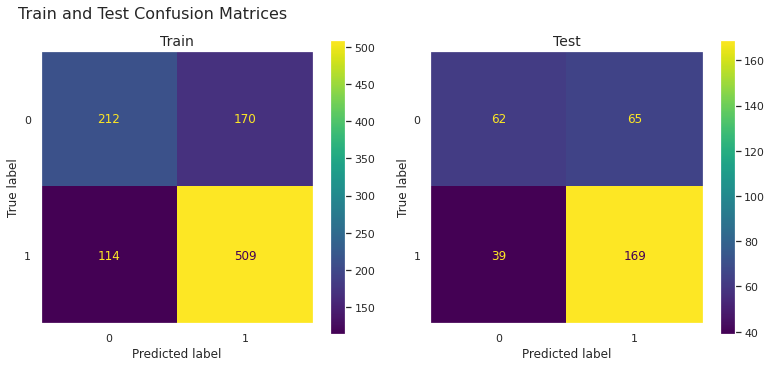

__________________________________________________________________________________________
Treino
              precision    recall  f1-score   support

           0       0.65      0.55      0.60       382
           1       0.75      0.82      0.78       623

    accuracy                           0.72      1005
   macro avg       0.70      0.69      0.69      1005
weighted avg       0.71      0.72      0.71      1005

__________________________________________________________________________________________
Teste
              precision    recall  f1-score   support

           0       0.61      0.49      0.54       127
           1       0.72      0.81      0.76       208

    accuracy                           0.69       335
   macro avg       0.67      0.65      0.65       335
weighted avg       0.68      0.69      0.68       335

__________________________________________________________________________________________


In [51]:
data = (X_train, X_test, y_train, y_test)

show_metrics_of(grid_mlp_1, *data, model_name='MLP 1')

In [52]:
grid_mlp_1.best_params_

{'mlp__optimizer': 'SGD',
 'mlp__n_units': [20, 30, 10],
 'mlp__epochs': 100,
 'mlp__dropout': False,
 'mlp__batch_size': 20}

### Modelo 2

Vamos agora buscar otimizar os hiperparâmetros em uma outra grade e outras arquiteturas para a MLP.

In [53]:
X_train, X_test, y_train, y_test, pre_processor = pre_process(columns=final_selection)

pipe_mlp = Pipeline([('pre_proc', pre_processor), 
                     ('mlp', KerasClassifier(build_fn=create_model))])

params_mlp = {
    'mlp__n_units': [[10, 15, 5], [10, 15, 10, 5, 2], [10, 20, 5, 5, 5, 2]],
    'mlp__optimizer': ['RMSprop', 'Adam', 'Nadam', 'SGD'],
    'mlp__dropout': [True],
    'mlp__epochs': range(25, 101, 25), 
    'mlp__batch_size': range(5, 16, 5)
}

grid_mlp = RandomizedSearchCV(estimator=pipe_mlp, 
                              param_distributions=params_mlp, 
                              cv=splitter, 
                              n_iter=40, 
                              scoring='f1_weighted',
                              random_state=42, 
                              n_jobs=-1)

grid_mlp.fit(X_train, y_train)

2022-06-20 02:48:17.913737: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-20 02:48:17.913733: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-20 02:48:17.920807: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-20 02:48:17.922747: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly 

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
54/54 [==============================] - 1s 4ms/step - loss: 0.6917 - binary_crossentropy: 0.6917
Epoch 2/50
54/54 [==============================] - 1s 4ms/step - loss: 0.6873 - binary_crossentropy: 0.6873
Epoch 2/50
54/54 [==============================] - 2s 4ms/step - loss: 0.7091 - binary_crossentropy: 0.7091
Epoch 2/50
161/161 [==============================] - 2s 3ms/step - loss: 0.6738 - binary_crossentropy: 0.6738
Epoch 2/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6863 - binary_crossentropy: 0.6863
Epoch 3/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6777 - binary_crossentropy: 0.6777
Epoch 3/50
Epoch 2/50
54/54 [==============================] - 2s 4ms/step - loss: 0.6753 - binary_crossentropy: 0.6753
Epoch 2/50
161/161 [==============================] - 2s 3ms/step - loss: 0.6817 - binary_crossentropy: 0.6817
Epoch 2/50
54/54 [==================

54/54 [==============================] - 0s 5ms/step - loss: 0.6264 - binary_crossentropy: 0.6264
Epoch 12/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6290 - binary_crossentropy: 0.6290
Epoch 13/50
54/54 [==============================] - 0s 5ms/step - loss: 0.6360 - binary_crossentropy: 0.6360
Epoch 11/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6371 - binary_crossentropy: 0.6371
Epoch 13/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6615 - binary_crossentropy: 0.6615
Epoch 6/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6156 - binary_crossentropy: 0.6156
Epoch 13/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6173 - binary_crossentropy: 0.6173
Epoch 12/50
54/54 [==============================] - 0s 5ms/step - loss: 0.6364 - binary_crossentropy: 0.6364
Epoch 14/50
54/54 [==============================] - 0s 5ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 7/50
54/54 [===

54/54 [==============================] - 0s 4ms/step - loss: 0.6384 - binary_crossentropy: 0.6384
Epoch 22/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6165 - binary_crossentropy: 0.6165
Epoch 22/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6183 - binary_crossentropy: 0.6183
Epoch 23/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6143 - binary_crossentropy: 0.6143
Epoch 21/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6447 - binary_crossentropy: 0.6447
Epoch 23/50
161/161 [==============================] - 0s 3ms/step - loss: 0.6534 - binary_crossentropy: 0.6534
Epoch 10/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6355 - binary_crossentropy: 0.6355
Epoch 23/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6072 - binary_crossentropy: 0.6072
Epoch 23/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6112 - binary_crossentropy: 0.6112
Epoch 11/50
Epoch 24

54/54 [==============================] - 0s 4ms/step - loss: 0.6333 - binary_crossentropy: 0.6333
Epoch 31/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6149 - binary_crossentropy: 0.6149
Epoch 33/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6186 - binary_crossentropy: 0.6186
Epoch 34/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6406 - binary_crossentropy: 0.6406
Epoch 33/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6042 - binary_crossentropy: 0.6042
Epoch 34/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6155 - binary_crossentropy: 0.6155
Epoch 35/50
161/161 [==============================] - 0s 3ms/step - loss: 0.6389 - binary_crossentropy: 0.6389
Epoch 15/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6251 - binary_crossentropy: 0.6251
Epoch 33/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6291 - binary_crossentropy: 0.6291
Epoch 35/50
161/161 

54/54 [==============================] - 0s 3ms/step - loss: 0.6403 - binary_crossentropy: 0.6403
Epoch 19/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6119 - binary_crossentropy: 0.6119
Epoch 42/50
161/161 [==============================] - 0s 3ms/step - loss: 0.6223 - binary_crossentropy: 0.6223
Epoch 19/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6094 - binary_crossentropy: 0.6094
Epoch 45/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6235 - binary_crossentropy: 0.6235
Epoch 44/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6098 - binary_crossentropy: 0.6098
Epoch 43/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6036 - binary_crossentropy: 0.6036
Epoch 45/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6106 - binary_crossentropy: 0.6106
Epoch 45/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6204 - binary_crossentropy: 0.6204
Epoch 46/50
161/161 

161/161 [==============================] - 0s 2ms/step - loss: 0.6080 - binary_crossentropy: 0.6080
Epoch 25/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6175 - binary_crossentropy: 0.6175
Epoch 26/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5997 - binary_crossentropy: 0.5997
Epoch 26/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6124 - binary_crossentropy: 0.6124
Epoch 26/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6407 - binary_crossentropy: 0.6407
Epoch 27/50
161/161 [==============================] - 1s 2ms/step - loss: 0.6849 - binary_crossentropy: 0.6849
Epoch 2/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6017 - binary_crossentropy: 0.6017
Epoch 27/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6322 - binary_crossentropy: 0.6322
Epoch 28/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6731 - binary_crossentropy: 0.6731
Epoch

161/161 [==============================] - 0s 2ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 14/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6120 - binary_crossentropy: 0.6120
Epoch 40/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5952 - binary_crossentropy: 0.5952
Epoch 40/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6150 - binary_crossentropy: 0.6150
Epoch 41/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6292 - binary_crossentropy: 0.6292
Epoch 16/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 15/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6052 - binary_crossentropy: 0.6052
Epoch 41/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6019 - binary_crossentropy: 0.6019
Epoch 41/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6222 - binary_crossentropy: 0.6222
Epoc

161/161 [==============================] - 0s 3ms/step - loss: 0.6640 - binary_crossentropy: 0.6640
Epoch 28/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6267 - binary_crossentropy: 0.6267
Epoch 30/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6640 - binary_crossentropy: 0.6640
Epoch 29/50
161/161 [==============================] - 0s 3ms/step - loss: 0.6165 - binary_crossentropy: 0.6165
Epoch 31/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6639 - binary_crossentropy: 0.6639
Epoch 30/50
161/161 [==============================] - 0s 3ms/step - loss: 0.6104 - binary_crossentropy: 0.6104
Epoch 32/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6480 - binary_crossentropy: 0.6480
Epoch 3/25
161/161 [==============================] - 0s 2ms/step - loss: 0.6642 - binary_crossentropy: 0.6642
Epoch 31/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6449 - binary_crossentropy: 0.6449
Epoch 4/2

81/81 [==============================] - 0s 4ms/step - loss: 0.6350 - binary_crossentropy: 0.6350
Epoch 7/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5895 - binary_crossentropy: 0.5895
Epoch 17/25
81/81 [==============================] - 0s 4ms/step - loss: 0.6718 - binary_crossentropy: 0.6718
Epoch 8/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6327 - binary_crossentropy: 0.6327
Epoch 10/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6702 - binary_crossentropy: 0.6702
Epoch 9/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5948 - binary_crossentropy: 0.5948
Epoch 18/25
Epoch 38/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6640 - binary_crossentropy: 0.6640
Epoch 37/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6727 - binary_crossentropy: 0.6727
Epoch 7/75
81/81 [==============================] - 0s 5ms/step - loss: 0.6166 - binary_crossentropy: 0.6166
Epoch 8/75
8

81/81 [==============================] - 0s 4ms/step - loss: 0.6653 - binary_crossentropy: 0.6653
Epoch 17/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6197 - binary_crossentropy: 0.6197
Epoch 18/75
120/161 [=====================>........] - ETA: 0s - loss: 0.6675 - binary_crossentropy: 0.6675Epoch 15/75
Epoch 43/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6652 - binary_crossentropy: 0.6652
Epoch 15/75
161/161 [==============================] - 1s 3ms/step - loss: 0.6639 - binary_crossentropy: 0.6639
Epoch 42/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6651 - binary_crossentropy: 0.6651
Epoch 18/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6126 - binary_crossentropy: 0.6126
Epoch 19/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6160 - binary_crossentropy: 0.6160
Epoch 16/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6650 - binary_crossentropy: 0.6650
Epoch 16/75

Epoch 12/25
81/81 [==============================] - 0s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 26/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 25/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6041 - binary_crossentropy: 0.6041
Epoch 13/25
81/81 [==============================] - 0s 4ms/step - loss: 0.6640 - binary_crossentropy: 0.6640
Epoch 24/75
81/81 [==============================] - 0s 3ms/step - loss: 0.5891 - binary_crossentropy: 0.5891
Epoch 25/75
161/161 [==============================] - 1s 3ms/step - loss: 0.6640 - binary_crossentropy: 0.6640
Epoch 48/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5836 - binary_crossentropy: 0.5836
Epoch 29/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 28/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6072 - binary_crossentropy: 0.6072
Epoch 26

81/81 [==============================] - 0s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 34/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6031 - binary_crossentropy: 0.6031
Epoch 32/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5848 - binary_crossentropy: 0.5848
Epoch 25/25
81/81 [==============================] - 0s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 33/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6167 - binary_crossentropy: 0.6167
Epoch 36/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 32/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5939 - binary_crossentropy: 0.5939
Epoch 33/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 34/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6032 - binary_crossentropy: 0.6032
Epoch 37/75
81/81 [===

81/81 [==============================] - 0s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 43/75
81/81 [==============================] - 0s 3ms/step - loss: 0.5762 - binary_crossentropy: 0.5762
Epoch 41/75
54/54 [==============================] - 0s 3ms/step - loss: 0.5995 - binary_crossentropy: 0.5995
Epoch 13/25
54/54 [==============================] - 0s 3ms/step - loss: 0.5909 - binary_crossentropy: 0.5909
Epoch 13/25
81/81 [==============================] - 0s 3ms/step - loss: 0.6352 - binary_crossentropy: 0.6352
Epoch 42/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 41/75
54/54 [==============================] - 0s 3ms/step - loss: 0.5870 - binary_crossentropy: 0.5870
Epoch 14/25
54/54 [==============================] - 0s 3ms/step - loss: 0.5821 - binary_crossentropy: 0.5821
Epoch 14/25
81/81 [==============================] - 0s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 44/75
81/81 [===

81/81 [==============================] - 0s 3ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 52/75
81/81 [==============================] - 0s 3ms/step - loss: 0.6108 - binary_crossentropy: 0.6108
Epoch 54/75
81/81 [==============================] - 0s 3ms/step - loss: 0.6143 - binary_crossentropy: 0.6143
Epoch 51/75
81/81 [==============================] - 0s 3ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 50/75
81/81 [==============================] - 0s 3ms/step - loss: 0.5893 - binary_crossentropy: 0.5893
Epoch 50/75
81/81 [==============================] - 0s 3ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 53/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6129 - binary_crossentropy: 0.6129
Epoch 55/75
81/81 [==============================] - 0s 3ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 51/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5941 - binary_crossentropy: 0.5941
Epoch 51/75
81/81 [===

81/81 [==============================] - 2s 4ms/step - loss: 0.6725 - binary_crossentropy: 0.6725
Epoch 2/25
81/81 [==============================] - 0s 5ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 61/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6110 - binary_crossentropy: 0.6110
Epoch 60/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6057 - binary_crossentropy: 0.6057
Epoch 11/25
81/81 [==============================] - 0s 4ms/step - loss: 0.6584 - binary_crossentropy: 0.6584
Epoch 4/25
81/81 [==============================] - 0s 5ms/step - loss: 0.5878 - binary_crossentropy: 0.5878
Epoch 59/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6534 - binary_crossentropy: 0.6534
Epoch 3/25
81/81 [==============================] - 0s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 62/75
81/81 [==============================] - 0s 5ms/step - loss: 0.6090 - binary_crossentropy: 0.6090
Epoch 61/75
81/81 [======

81/81 [==============================] - 0s 4ms/step - loss: 0.6275 - binary_crossentropy: 0.6275
Epoch 21/25
81/81 [==============================] - 0s 4ms/step - loss: 0.5844 - binary_crossentropy: 0.5844
Epoch 74/75
81/81 [==============================] - 0s 3ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 75/75
81/81 [==============================] - 0s 3ms/step - loss: 0.6065 - binary_crossentropy: 0.6065
Epoch 20/25
81/81 [==============================] - 0s 3ms/step - loss: 0.6244 - binary_crossentropy: 0.6244
Epoch 22/25
81/81 [==============================] - 0s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 1/25
81/81 [==============================] - 0s 3ms/step - loss: 0.6166 - binary_crossentropy: 0.6166
Epoch 21/25
81/81 [==============================] - 0s 3ms/step - loss: 0.6133 - binary_crossentropy: 0.6133
Epoch 23/25
81/81 [==============================] - 0s 3ms/step - loss: 0.6090 - binary_crossentropy: 0.6090
Epoch 22/25
81/81 [====

81/81 [==============================] - 0s 3ms/step - loss: 0.6385 - binary_crossentropy: 0.6385
Epoch 12/25
161/161 [==============================] - 0s 3ms/step - loss: 0.6277 - binary_crossentropy: 0.6277
Epoch 6/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6348 - binary_crossentropy: 0.6348
Epoch 10/25
161/161 [==============================] - 0s 3ms/step - loss: 0.6294 - binary_crossentropy: 0.6294
Epoch 5/50
161/161 [==============================] - 0s 3ms/step - loss: 0.6151 - binary_crossentropy: 0.6151
Epoch 7/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6182 - binary_crossentropy: 0.6182
Epoch 16/25
81/81 [==============================] - 0s 4ms/step - loss: 0.6334 - binary_crossentropy: 0.6334
Epoch 11/25
161/161 [==============================] - 1s 3ms/step - loss: 0.6169 - binary_crossentropy: 0.6169
Epoch 7/50
161/161 [==============================] - 0s 3ms/step - loss: 0.6091 - binary_crossentropy: 0.6091
Epoch 6/50
81/81

81/81 [==============================] - 0s 3ms/step - loss: 0.6157 - binary_crossentropy: 0.6157
Epoch 24/25
81/81 [==============================] - 0s 4ms/step - loss: 0.6315 - binary_crossentropy: 0.6315
Epoch 22/25
161/161 [==============================] - 1s 3ms/step - loss: 0.6228 - binary_crossentropy: 0.6228
Epoch 4/50
161/161 [==============================] - 0s 3ms/step - loss: 0.6114 - binary_crossentropy: 0.6114
Epoch 13/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5942 - binary_crossentropy: 0.5942
Epoch 8/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5992 - binary_crossentropy: 0.5992
Epoch 14/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6174 - binary_crossentropy: 0.6174
Epoch 5/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5951 - binary_crossentropy: 0.5951
Epoch 13/50
Epoch 14/50
161/161 [==============================] - 0s 3ms/step - loss: 0.6025 - binary_crossentropy: 0.6025
E

54/54 [==============================] - 0s 3ms/step - loss: 0.6038 - binary_crossentropy: 0.6038
Epoch 14/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6740 - binary_crossentropy: 0.6740
Epoch 3/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6079 - binary_crossentropy: 0.6079
Epoch 8/100
 93/161 [================>.............] - ETA: 0s - loss: 0.5994 - binary_crossentropy: 0.5994Epoch 4/100
Epoch 15/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6123 - binary_crossentropy: 0.6123
Epoch 9/100
161/161 [==============================] - 0s 3ms/step - loss: 0.6182 - binary_crossentropy: 0.6182
Epoch 11/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6037 - binary_crossentropy: 0.6037
Epoch 16/100
161/161 [==============================] - 1s 3ms/step - loss: 0.6062 - binary_crossentropy: 0.6062
Epoch 20/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6085 - binary_crossentropy: 0.6085
Epoch 

161/161 [==============================] - 0s 3ms/step - loss: 0.5968 - binary_crossentropy: 0.5968
Epoch 29/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5827 - binary_crossentropy: 0.5827
Epoch 31/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5744 - binary_crossentropy: 0.5744
Epoch 28/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5870 - binary_crossentropy: 0.5870
Epoch 29/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5813 - binary_crossentropy: 0.5813
Epoch 43/100
161/161 [==============================] - 0s 3ms/step - loss: 0.6019 - binary_crossentropy: 0.6019
Epoch 21/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5858 - binary_crossentropy: 0.5858
Epoch 37/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5874 - binary_crossentropy: 0.5874
Epoch 44/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5870 - binary_crossentropy: 0.5870
Epoch 24

54/54 [==============================] - 0s 3ms/step - loss: 0.5823 - binary_crossentropy: 0.5823
Epoch 44/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5918 - binary_crossentropy: 0.5918
Epoch 34/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5813 - binary_crossentropy: 0.5813
Epoch 56/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5931 - binary_crossentropy: 0.5931
Epoch 25/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5695 - binary_crossentropy: 0.5695
Epoch 28/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5829 - binary_crossentropy: 0.5829
Epoch 57/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5807 - binary_crossentropy: 0.5807
Epoch 33/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5805 - binary_crossentropy: 0.5805
Epoch 46/100
161/161 [==============================] - 0s 3ms/step - loss: 0.6004 - binary_crossentropy: 0.6004
Epoch 34

161/161 [==============================] - 1s 3ms/step - loss: 0.5589 - binary_crossentropy: 0.5589
Epoch 32/50
Epoch 69/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5737 - binary_crossentropy: 0.5737
Epoch 61/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5802 - binary_crossentropy: 0.5802
Epoch 37/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5718 - binary_crossentropy: 0.5718
Epoch 57/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5762 - binary_crossentropy: 0.5762
Epoch 70/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5819 - binary_crossentropy: 0.5819
Epoch 39/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5805 - binary_crossentropy: 0.5805
Epoch 71/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5728 - binary_crossentropy: 0.5728
Epoch 59/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5686 - binary_crossentropy: 0.5

54/54 [==============================] - 0s 3ms/step - loss: 0.5652 - binary_crossentropy: 0.5652
Epoch 69/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5734 - binary_crossentropy: 0.5734
Epoch 74/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5787 - binary_crossentropy: 0.5787
Epoch 43/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5888 - binary_crossentropy: 0.5888
Epoch 42/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5597 - binary_crossentropy: 0.5597
Epoch 70/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5744 - binary_crossentropy: 0.5744
Epoch 75/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5766 - binary_crossentropy: 0.5766
Epoch 42/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5630 - binary_crossentropy: 0.5630
Epoch 83/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5729 - binary_crossentropy: 0.5729
Epoch 71/10

54/54 [==============================] - 0s 4ms/step - loss: 0.5586 - binary_crossentropy: 0.5586
Epoch 83/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5630 - binary_crossentropy: 0.5630
Epoch 95/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5680 - binary_crossentropy: 0.5680
Epoch 89/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5674 - binary_crossentropy: 0.5674
Epoch 96/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5744 - binary_crossentropy: 0.5744
Epoch 90/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5768 - binary_crossentropy: 0.5768
Epoch 48/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5926 - binary_crossentropy: 0.5926
Epoch 47/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5683 - binary_crossentropy: 0.5683
Epoch 97/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5672 - binary_crossentropy: 0.5672
Epoch 85/100

161/161 [==============================] - 0s 3ms/step - loss: 0.5709 - binary_crossentropy: 0.5709
Epoch 44/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5568 - binary_crossentropy: 0.5568
Epoch 98/100
54/54 [==============================] - 1s 3ms/step - loss: 0.6636 - binary_crossentropy: 0.6636
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5586 - binary_crossentropy: 0.5586
Epoch 99/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6407 - binary_crossentropy: 0.6407
Epoch 3/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5558 - binary_crossentropy: 0.5558
Epoch 100/100
Epoch 47/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5731 - binary_crossentropy: 0.5731
Epoch 45/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6369 - binary_crossentropy: 0.6369
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6272 - binary_crossentropy: 0.6272


 72/161 [============>.................] - ETA: 0s - loss: 0.5630 - binary_crossentropy: 0.5630Epoch 8/50
Epoch 8/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5981 - binary_crossentropy: 0.5981
Epoch 20/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5976 - binary_crossentropy: 0.5976
Epoch 21/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6302 - binary_crossentropy: 0.6302
Epoch 6/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6365 - binary_crossentropy: 0.6365
Epoch 9/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6205 - binary_crossentropy: 0.6205
Epoch 9/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5803 - binary_crossentropy: 0.5803
Epoch 22/100
Epoch 19/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5877 - binary_crossentropy: 0.5877
Epoch 20/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5876 - binary_crossentropy: 0.5876
E

54/54 [==============================] - 0s 3ms/step - loss: 0.5715 - binary_crossentropy: 0.5715
Epoch 4/50
Epoch 35/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5899 - binary_crossentropy: 0.5899
Epoch 32/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6334 - binary_crossentropy: 0.6334
Epoch 8/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5747 - binary_crossentropy: 0.5747
Epoch 36/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6243 - binary_crossentropy: 0.6243
Epoch 17/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5778 - binary_crossentropy: 0.5778
Epoch 14/50
Epoch 33/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6074 - binary_crossentropy: 0.6074
Epoch 17/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6312 - binary_crossentropy: 0.6312
Epoch 5/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6327 - binary_crossentropy: 0.63

54/54 [==============================] - 0s 3ms/step - loss: 0.5832 - binary_crossentropy: 0.5832
Epoch 47/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6038 - binary_crossentropy: 0.6038
Epoch 25/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5687 - binary_crossentropy: 0.5687
Epoch 50/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5954 - binary_crossentropy: 0.5954
Epoch 25/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6021 - binary_crossentropy: 0.6021
Epoch 22/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6196 - binary_crossentropy: 0.6196
Epoch 13/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5942 - binary_crossentropy: 0.5942
Epoch 48/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6157 - binary_crossentropy: 0.6157
Epoch 17/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6062 - binary_crossentropy: 0.6062
Epoch 26/50
54/54 [

81/81 [==============================] - 0s 3ms/step - loss: 0.6087 - binary_crossentropy: 0.6087
Epoch 33/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5660 - binary_crossentropy: 0.5660
Epoch 65/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5945 - binary_crossentropy: 0.5945
Epoch 30/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5725 - binary_crossentropy: 0.5725
Epoch 62/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6173 - binary_crossentropy: 0.6173
Epoch 21/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6017 - binary_crossentropy: 0.6017
Epoch 34/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5986 - binary_crossentropy: 0.5986
Epoch 31/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5939 - binary_crossentropy: 0.5939
Epoch 67/100
Epoch 22/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5776 - binary_crossentropy: 0.5776
Epoch 6

81/81 [==============================] - 0s 3ms/step - loss: 0.6088 - binary_crossentropy: 0.6088
Epoch 32/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6022 - binary_crossentropy: 0.6022
Epoch 41/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5739 - binary_crossentropy: 0.5739
Epoch 75/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6019 - binary_crossentropy: 0.6019
Epoch 41/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5963 - binary_crossentropy: 0.5963
Epoch 38/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5657 - binary_crossentropy: 0.5657
Epoch 76/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6127 - binary_crossentropy: 0.6127
Epoch 33/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5984 - binary_crossentropy: 0.5984
Epoch 30/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5960 - binary_crossentropy: 0.5960
Epoch 39/50
54/54 [=

81/81 [==============================] - 0s 3ms/step - loss: 0.5862 - binary_crossentropy: 0.5862
Epoch 45/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5693 - binary_crossentropy: 0.5693
Epoch 93/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5794 - binary_crossentropy: 0.5794
Epoch 88/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5892 - binary_crossentropy: 0.5892
Epoch 49/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6051 - binary_crossentropy: 0.6051
Epoch 37/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5640 - binary_crossentropy: 0.5640
Epoch 94/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5607 - binary_crossentropy: 0.5607
Epoch 89/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5909 - binary_crossentropy: 0.5909
Epoch 49/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5604 - binary_crossentropy: 0.5604
Epoch 90/100
81/81

81/81 [==============================] - 0s 3ms/step - loss: 0.6675 - binary_crossentropy: 0.6675
Epoch 11/50
161/161 [==============================] - 3s 4ms/step - loss: 0.6902 - binary_crossentropy: 0.6902
Epoch 2/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6137 - binary_crossentropy: 0.6137
Epoch 14/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6119 - binary_crossentropy: 0.6119
Epoch 16/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6056 - binary_crossentropy: 0.6056
Epoch 14/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6058 - binary_crossentropy: 0.6058
Epoch 15/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6652 - binary_crossentropy: 0.6652
Epoch 17/50
Epoch 17/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6154 - binary_crossentropy: 0.6154
Epoch 15/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6119 - binary_crossentropy: 0.6119
Epoch 16/

81/81 [==============================] - 0s 4ms/step - loss: 0.6643 - binary_crossentropy: 0.6643
Epoch 20/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6106 - binary_crossentropy: 0.6106
Epoch 23/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6075 - binary_crossentropy: 0.6075
Epoch 23/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6695 - binary_crossentropy: 0.6695
Epoch 7/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6642 - binary_crossentropy: 0.6642
Epoch 21/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6152 - binary_crossentropy: 0.6152
Epoch 24/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5972 - binary_crossentropy: 0.5972
Epoch 24/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5951 - binary_crossentropy: 0.5951
Epoch 26/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 26/50
81/81 [==

161/161 [==============================] - 1s 4ms/step - loss: 0.6138 - binary_crossentropy: 0.6138
Epoch 17/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 31/50
81/81 [==============================] - 0s 5ms/step - loss: 0.6084 - binary_crossentropy: 0.6084
Epoch 33/50
81/81 [==============================] - 0s 5ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 35/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5867 - binary_crossentropy: 0.5867
Epoch 34/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6769 - binary_crossentropy: 0.6769
Epoch 4/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5858 - binary_crossentropy: 0.5858
Epoch 34/50
81/81 [==============================] - 0s 5ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 32/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5968 - binary_crossentropy: 0.5968
Epoch 35/50
81/81 [

Epoch 42/50
161/161 [==============================] - 1s 5ms/step - loss: 0.6675 - binary_crossentropy: 0.6675
Epoch 8/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 44/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5936 - binary_crossentropy: 0.5936
Epoch 45/50
161/161 [==============================] - 1s 5ms/step - loss: 0.6137 - binary_crossentropy: 0.6137
Epoch 22/50
81/81 [==============================] - 0s 5ms/step - loss: 0.5917 - binary_crossentropy: 0.5917
Epoch 44/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5918 - binary_crossentropy: 0.5918
Epoch 41/50
Epoch 43/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5981 - binary_crossentropy: 0.5981
Epoch 46/50
81/81 [==============================] - 0s 5ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 45/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5839 - binary_crossentropy: 0.

161/161 [==============================] - 1s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 22/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6649 - binary_crossentropy: 0.6649
Epoch 14/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6069 - binary_crossentropy: 0.6069
Epoch 28/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 23/50
81/81 [==============================] - 1s 4ms/step - loss: 0.6671 - binary_crossentropy: 0.6671
Epoch 2/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6100 - binary_crossentropy: 0.6100
Epoch 29/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6647 - binary_crossentropy: 0.6647
Epoch 15/50
81/81 [==============================] - 0s 2ms/step - loss: 0.6481 - binary_crossentropy: 0.6481
Epoch 3/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 24/5

81/81 [==============================] - 0s 3ms/step - loss: 0.5950 - binary_crossentropy: 0.5950
Epoch 18/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6650 - binary_crossentropy: 0.6650
Epoch 11/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 26/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 35/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5947 - binary_crossentropy: 0.5947
Epoch 20/25
161/161 [==============================] - 1s 3ms/step - loss: 0.5977 - binary_crossentropy: 0.5977
Epoch 41/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6647 - binary_crossentropy: 0.6647
Epoch 12/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6016 - binary_crossentropy: 0.6016
Epoch 21/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 27/5

81/81 [==============================] - 0s 4ms/step - loss: 0.6670 - binary_crossentropy: 0.6670
Epoch 49/50
Epoch 6/25
81/81 [==============================] - 0s 3ms/step - loss: 0.6323 - binary_crossentropy: 0.6323
Epoch 9/25
161/161 [==============================] - 1s 4ms/step - loss: 0.5937 - binary_crossentropy: 0.5937
Epoch 21/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6639 - binary_crossentropy: 0.6639
Epoch 20/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6613 - binary_crossentropy: 0.6613
Epoch 7/25
81/81 [==============================] - 0s 3ms/step - loss: 0.6215 - binary_crossentropy: 0.6215
Epoch 10/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 35/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6574 - binary_crossentropy: 0.6574
Epoch 8/25
161/161 [==============================] - 1s 5ms/step - loss: 0.5883 - binary_crossentropy: 0.5883
Epoch 

161/161 [==============================] - 1s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 26/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6211 - binary_crossentropy: 0.6211
Epoch 5/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6286 - binary_crossentropy: 0.6286
Epoch 22/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 50/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5824 - binary_crossentropy: 0.5824
Epoch 25/25
81/81 [==============================] - 0s 4ms/step - loss: 0.6211 - binary_crossentropy: 0.6211
Epoch 6/75
81/81 [==============================] - 0s 3ms/step - loss: 0.6338 - binary_crossentropy: 0.6338
Epoch 23/25
81/81 [==============================] - 0s 4ms/step - loss: 0.6052 - binary_crossentropy: 0.6052
Epoch 7/75
Epoch 24/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6024 - binary_crossentropy: 0.6024
Epoch 2

161/161 [==============================] - 1s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 47/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 33/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6857 - binary_crossentropy: 0.6857
Epoch 3/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6001 - binary_crossentropy: 0.6001
Epoch 19/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6787 - binary_crossentropy: 0.6787
Epoch 5/75
81/81 [==============================] - 0s 5ms/step - loss: 0.6500 - binary_crossentropy: 0.6500
Epoch 5/75
161/161 [==============================] - 1s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 48/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6659 - binary_crossentropy: 0.6659
Epoch 15/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5870 - binary_crossentropy: 0.5870
Epoch 35/50
81/81

161/161 [==============================] - 1s 4ms/step - loss: 0.5764 - binary_crossentropy: 0.5764
Epoch 44/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 33/75
81/81 [==============================] - 0s 3ms/step - loss: 0.5797 - binary_crossentropy: 0.5797
Epoch 39/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6003 - binary_crossentropy: 0.6003
Epoch 23/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6640 - binary_crossentropy: 0.6640
Epoch 25/75
81/81 [==============================] - 0s 3ms/step - loss: 0.5923 - binary_crossentropy: 0.5923
Epoch 25/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6639 - binary_crossentropy: 0.6639
Epoch 26/75
161/161 [==============================] - 1s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 44/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6071 - binary_crossentropy: 0.6071
Epoch 26/75
81/81 

81/81 [==============================] - 0s 4ms/step - loss: 0.5863 - binary_crossentropy: 0.5863
Epoch 50/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 44/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6129 - binary_crossentropy: 0.6129
Epoch 35/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 36/75
161/161 [==============================] - 1s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 49/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 45/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5872 - binary_crossentropy: 0.5872
Epoch 51/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5928 - binary_crossentropy: 0.5928
Epoch 36/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5808 - binary_crossentropy: 0.5808
Epoch 50/50
81/81 

81/81 [==============================] - 0s 5ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 55/75
Epoch 53/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5867 - binary_crossentropy: 0.5867
Epoch 55/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6305 - binary_crossentropy: 0.6305
Epoch 8/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5886 - binary_crossentropy: 0.5886
Epoch 70/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6270 - binary_crossentropy: 0.6270
Epoch 12/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 56/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 54/75
Epoch 65/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5808 - binary_crossentropy: 0.5808
Epoch 56/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6174 - binary_crossentropy: 0.61

81/81 [==============================] - 0s 4ms/step - loss: 0.6195 - binary_crossentropy: 0.6195
Epoch 18/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6229 - binary_crossentropy: 0.6229
Epoch 15/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5826 - binary_crossentropy: 0.5826
Epoch 62/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5878 - binary_crossentropy: 0.5878
Epoch 61/75
51/81 [=================>............] - ETA: 0s - loss: 0.5905 - binary_crossentropy: 0.5905Epoch 63/75
Epoch 72/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6286 - binary_crossentropy: 0.6286
Epoch 17/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6104 - binary_crossentropy: 0.6104
Epoch 16/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5759 - binary_crossentropy: 0.5759
Epoch 63/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5868 - binary_crossentropy: 0.5868
Epoch 62/75

81/81 [==============================] - 0s 4ms/step - loss: 0.5816 - binary_crossentropy: 0.5816
Epoch 70/75
81/81 [==============================] - 0s 5ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 72/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5740 - binary_crossentropy: 0.5740
Epoch 72/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5969 - binary_crossentropy: 0.5969
Epoch 25/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6174 - binary_crossentropy: 0.6174
Epoch 28/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6180 - binary_crossentropy: 0.6180
Epoch 26/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6672 - binary_crossentropy: 0.6672
Epoch 3/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 73/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5718 - binary_crossentropy: 0.5718
Epoch 73/75
81/81 [

81/81 [==============================] - 0s 4ms/step - loss: 0.6095 - binary_crossentropy: 0.6095
Epoch 38/100
Epoch 5/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6514 - binary_crossentropy: 0.6514
Epoch 7/100
54/54 [==============================] - 0s 5ms/step - loss: 0.6289 - binary_crossentropy: 0.6289
Epoch 3/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6194 - binary_crossentropy: 0.6194
Epoch 13/100
81/81 [==============================] - 0s 5ms/step - loss: 0.5992 - binary_crossentropy: 0.5992
Epoch 35/100
54/54 [==============================] - 0s 5ms/step - loss: 0.6256 - binary_crossentropy: 0.6256
Epoch 6/100
54/54 [==============================] - 0s 5ms/step - loss: 0.6112 - binary_crossentropy: 0.6112
Epoch 6/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6300 - binary_crossentropy: 0.6300
Epoch 4/100
81/81 [==============================] - 0s 5ms/step - loss: 0.6228 - binary_crossentropy: 0.6228
Epoch 3

81/81 [==============================] - 0s 4ms/step - loss: 0.6106 - binary_crossentropy: 0.6106
Epoch 19/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5905 - binary_crossentropy: 0.5905
Epoch 13/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6068 - binary_crossentropy: 0.6068
Epoch 16/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6278 - binary_crossentropy: 0.6278
Epoch 43/100
81/81 [==============================] - 0s 5ms/step - loss: 0.6259 - binary_crossentropy: 0.6259
Epoch 14/100
54/54 [==============================] - 0s 5ms/step - loss: 0.5931 - binary_crossentropy: 0.5931
Epoch 14/100
81/81 [==============================] - 0s 5ms/step - loss: 0.6034 - binary_crossentropy: 0.6034
Epoch 42/100
81/81 [==============================] - 0s 5ms/step - loss: 0.6215 - binary_crossentropy: 0.6215
Epoch 45/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5885 - binary_crossentropy: 0.5885
Epoch 17/100
8

81/81 [==============================] - 0s 5ms/step - loss: 0.5931 - binary_crossentropy: 0.5931
Epoch 48/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6272 - binary_crossentropy: 0.6272
Epoch 20/100
54/54 [==============================] - 0s 5ms/step - loss: 0.5790 - binary_crossentropy: 0.5790
Epoch 26/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5816 - binary_crossentropy: 0.5816
Epoch 23/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5953 - binary_crossentropy: 0.5953
Epoch 26/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6103 - binary_crossentropy: 0.6103
Epoch 26/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6093 - binary_crossentropy: 0.6093
Epoch 51/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6120 - binary_crossentropy: 0.6120
Epoch 50/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5848 - binary_crossentropy: 0.5848
Epoch 27/100
5

54/54 [==============================] - 0s 5ms/step - loss: 0.5938 - binary_crossentropy: 0.5938
Epoch 36/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5859 - binary_crossentropy: 0.5859
Epoch 37/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5845 - binary_crossentropy: 0.5845
Epoch 33/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5970 - binary_crossentropy: 0.5970
Epoch 58/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5937 - binary_crossentropy: 0.5937
Epoch 37/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5852 - binary_crossentropy: 0.5852
Epoch 38/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6162 - binary_crossentropy: 0.6162
Epoch 28/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5959 - binary_crossentropy: 0.5959
Epoch 56/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5804 - binary_crossentropy: 0.5804
Epoch 35/100
5

54/54 [==============================] - 0s 4ms/step - loss: 0.5891 - binary_crossentropy: 0.5891
Epoch 46/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5863 - binary_crossentropy: 0.5863
Epoch 39/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5833 - binary_crossentropy: 0.5833
Epoch 64/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6011 - binary_crossentropy: 0.6011
Epoch 62/100
81/81 [==============================] - 0s 5ms/step - loss: 0.6136 - binary_crossentropy: 0.6136
Epoch 63/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6075 - binary_crossentropy: 0.6075
Epoch 34/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5780 - binary_crossentropy: 0.5780
Epoch 47/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6075 - binary_crossentropy: 0.6075
Epoch 64/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5934 - binary_crossentropy: 0.5934
Epoch 63/100
5

81/81 [==============================] - 0s 4ms/step - loss: 0.6062 - binary_crossentropy: 0.6062
Epoch 46/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5765 - binary_crossentropy: 0.5765
Epoch 66/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5750 - binary_crossentropy: 0.5750
Epoch 66/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6035 - binary_crossentropy: 0.6035
Epoch 76/100
81/81 [==============================] - 0s 5ms/step - loss: 0.5917 - binary_crossentropy: 0.5917
Epoch 75/100
81/81 [==============================] - 0s 5ms/step - loss: 0.5901 - binary_crossentropy: 0.5901
Epoch 53/100
54/54 [==============================] - 0s 5ms/step - loss: 0.5712 - binary_crossentropy: 0.5712
Epoch 67/100
54/54 [==============================] - 0s 5ms/step - loss: 0.5689 - binary_crossentropy: 0.5689
Epoch 64/100
81/81 [==============================] - 0s 5ms/step - loss: 0.6141 - binary_crossentropy: 0.6141
Epoch 47/100
8

54/54 [==============================] - 0s 4ms/step - loss: 0.5643 - binary_crossentropy: 0.5643
Epoch 76/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5753 - binary_crossentropy: 0.5753
Epoch 76/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5696 - binary_crossentropy: 0.5696
Epoch 73/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5798 - binary_crossentropy: 0.5798
Epoch 59/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5709 - binary_crossentropy: 0.5709
Epoch 77/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5987 - binary_crossentropy: 0.5987
Epoch 53/100
54/54 [==============================] - 0s 5ms/step - loss: 0.5735 - binary_crossentropy: 0.5735
Epoch 77/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5961 - binary_crossentropy: 0.5961
Epoch 82/100
Epoch 74/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6081 - binary_crossentropy: 0.6081
E

37/54 [===================>..........] - ETA: 0s - loss: 0.5695 - binary_crossentropy: 0.5695Epoch 86/100
Epoch 88/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5633 - binary_crossentropy: 0.5633
Epoch 87/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5711 - binary_crossentropy: 0.5711
Epoch 83/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5685 - binary_crossentropy: 0.5685
Epoch 66/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5787 - binary_crossentropy: 0.5787
Epoch 90/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5681 - binary_crossentropy: 0.5681
Epoch 87/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5531 - binary_crossentropy: 0.5531
Epoch 84/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5863 - binary_crossentropy: 0.5863
Epoch 60/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5815 - binary_crossentropy: 0.5815
Epoch 

54/54 [==============================] - 0s 4ms/step - loss: 0.5669 - binary_crossentropy: 0.5669
Epoch 96/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5907 - binary_crossentropy: 0.5907
Epoch 65/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5610 - binary_crossentropy: 0.5610
Epoch 92/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5742 - binary_crossentropy: 0.5742
Epoch 95/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5853 - binary_crossentropy: 0.5853
Epoch 94/100
Epoch 95/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5839 - binary_crossentropy: 0.5839
Epoch 72/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5671 - binary_crossentropy: 0.5671
Epoch 97/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5739 - binary_crossentropy: 0.5739
Epoch 96/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5895 - binary_crossentropy: 0.5895
E

54/54 [==============================] - 0s 3ms/step - loss: 0.6389 - binary_crossentropy: 0.6389
Epoch 4/100
Epoch 1/25
81/81 [==============================] - 0s 4ms/step - loss: 0.5951 - binary_crossentropy: 0.5951
Epoch 74/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5798 - binary_crossentropy: 0.5798
Epoch 81/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6900 - binary_crossentropy: 0.6900
Epoch 3/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6844 - binary_crossentropy: 0.6844
Epoch 4/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5979 - binary_crossentropy: 0.5979
Epoch 75/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6334 - binary_crossentropy: 0.6334
Epoch 82/100
54/54 [==============================] - 0s 5ms/step - loss: 0.6813 - binary_crossentropy: 0.6813
Epoch 5/100
54/54 [==============================] - 0s 5ms/step - loss: 0.6110 - binary_crossentropy: 0.6110
Epoch 7

54/54 [==============================] - 0s 3ms/step - loss: 0.6534 - binary_crossentropy: 0.6534
Epoch 8/25
54/54 [==============================] - 0s 4ms/step - loss: 0.6712 - binary_crossentropy: 0.6712
Epoch 10/25
54/54 [==============================] - 0s 4ms/step - loss: 0.5682 - binary_crossentropy: 0.5682
Epoch 18/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6691 - binary_crossentropy: 0.6691
Epoch 12/25
81/81 [==============================] - 0s 4ms/step - loss: 0.6069 - binary_crossentropy: 0.6069
Epoch 83/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6500 - binary_crossentropy: 0.6500
Epoch 9/25
54/54 [==============================] - 0s 3ms/step - loss: 0.6125 - binary_crossentropy: 0.6125
Epoch 17/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5813 - binary_crossentropy: 0.5813
Epoch 90/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6405 - binary_crossentropy: 0.6405
Epoch 10/25
54/54 [=

Epoch 21/25
54/54 [==============================] - 0s 4ms/step - loss: 0.6654 - binary_crossentropy: 0.6654
Epoch 20/25
54/54 [==============================] - 0s 5ms/step - loss: 0.6057 - binary_crossentropy: 0.6057
Epoch 26/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5728 - binary_crossentropy: 0.5728
Epoch 96/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6650 - binary_crossentropy: 0.6650
Epoch 22/25
54/54 [==============================] - 0s 5ms/step - loss: 0.5698 - binary_crossentropy: 0.5698
Epoch 28/100
81/81 [==============================] - 0s 5ms/step - loss: 0.5906 - binary_crossentropy: 0.5906
Epoch 89/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6652 - binary_crossentropy: 0.6652
Epoch 21/25
54/54 [==============================] - 0s 4ms/step - loss: 0.6272 - binary_crossentropy: 0.6272
Epoch 20/25
54/54 [==============================] - 0s 3ms/step - loss: 0.5755 - binary_crossentropy: 0.5755
Epoch 

54/54 [==============================] - 0s 4ms/step - loss: 0.5815 - binary_crossentropy: 0.5815
Epoch 97/100
Epoch 39/100
54/54 [==============================] - 0s 5ms/step - loss: 0.5643 - binary_crossentropy: 0.5643
Epoch 42/100
81/81 [==============================] - 0s 5ms/step - loss: 0.5877 - binary_crossentropy: 0.5877
Epoch 98/100
54/54 [==============================] - 2s 5ms/step - loss: 0.6998 - binary_crossentropy: 0.6998
Epoch 43/100
Epoch 2/25
54/54 [==============================] - 0s 6ms/step - loss: 0.5857 - binary_crossentropy: 0.5857
Epoch 41/100
54/54 [==============================] - 2s 4ms/step - loss: 0.6868 - binary_crossentropy: 0.6868
Epoch 2/25
54/54 [==============================] - 0s 5ms/step - loss: 0.6870 - binary_crossentropy: 0.6870
Epoch 3/25
54/54 [==============================] - 0s 5ms/step - loss: 0.5830 - binary_crossentropy: 0.5830
Epoch 42/100
54/54 [==============================] - 0s 5ms/step - loss: 0.6740 - binary_crossentropy: 0

54/54 [==============================] - 0s 4ms/step - loss: 0.6345 - binary_crossentropy: 0.6345
Epoch 13/25
54/54 [==============================] - 0s 3ms/step - loss: 0.6674 - binary_crossentropy: 0.6674
Epoch 13/25
54/54 [==============================] - 0s 4ms/step - loss: 0.5591 - binary_crossentropy: 0.5591
Epoch 54/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5834 - binary_crossentropy: 0.5834
Epoch 52/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6410 - binary_crossentropy: 0.6410
Epoch 8/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5756 - binary_crossentropy: 0.5756
Epoch 53/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6226 - binary_crossentropy: 0.6226
Epoch 15/25
81/81 [==============================] - 0s 4ms/step - loss: 0.6173 - binary_crossentropy: 0.6173
Epoch 9/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6350 - binary_crossentropy: 0.6350
Epoch 9/50
54/54 [===

54/54 [==============================] - 0s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 23/25
54/54 [==============================] - 0s 5ms/step - loss: 0.6128 - binary_crossentropy: 0.6128
Epoch 23/25
81/81 [==============================] - 0s 4ms/step - loss: 0.6249 - binary_crossentropy: 0.6249
Epoch 14/50
54/54 [==============================] - 0s 5ms/step - loss: 0.5529 - binary_crossentropy: 0.5529
Epoch 63/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6100 - binary_crossentropy: 0.6100
Epoch 15/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6231 - binary_crossentropy: 0.6231
Epoch 12/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6152 - binary_crossentropy: 0.6152
Epoch 24/25
54/54 [==============================] - 0s 4ms/step - loss: 0.6643 - binary_crossentropy: 0.6643
Epoch 24/25
81/81 [==============================] - 0s 4ms/step - loss: 0.6305 - binary_crossentropy: 0.6305
Epoch 7/50
54/54 [===

81/81 [==============================] - 0s 3ms/step - loss: 0.6142 - binary_crossentropy: 0.6142
Epoch 20/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6161 - binary_crossentropy: 0.6161
Epoch 22/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5695 - binary_crossentropy: 0.5695
Epoch 72/100
81/81 [==============================] - 0s 5ms/step - loss: 0.5952 - binary_crossentropy: 0.5952
Epoch 23/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6107 - binary_crossentropy: 0.6107
Epoch 15/50
54/54 [==============================] - 0s 5ms/step - loss: 0.5438 - binary_crossentropy: 0.5438
Epoch 74/100
54/54 [==============================] - 0s 5ms/step - loss: 0.5643 - binary_crossentropy: 0.5643
Epoch 73/100
81/81 [==============================] - 0s 5ms/step - loss: 0.6142 - binary_crossentropy: 0.6142
Epoch 21/50
81/81 [==============================] - 0s 5ms/step - loss: 0.6139 - binary_crossentropy: 0.6139
Epoch 23/50
161/161

54/54 [==============================] - 0s 4ms/step - loss: 0.5639 - binary_crossentropy: 0.5639
Epoch 82/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5570 - binary_crossentropy: 0.5570
Epoch 31/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5981 - binary_crossentropy: 0.5981
Epoch 22/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6024 - binary_crossentropy: 0.6024
Epoch 28/50
54/54 [==============================] - 0s 5ms/step - loss: 0.5673 - binary_crossentropy: 0.5673
Epoch 83/100
81/81 [==============================] - 0s 5ms/step - loss: 0.6624 - binary_crossentropy: 0.6624
Epoch 8/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6313 - binary_crossentropy: 0.6313
Epoch 7/75
54/54 [==============================] - 0s 6ms/step - loss: 0.5740 - binary_crossentropy: 0.5740
Epoch 84/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6091 - binary_crossentropy: 0.6091
Epoch 29/50
54/54 [

81/81 [==============================] - 0s 5ms/step - loss: 0.6083 - binary_crossentropy: 0.6083
Epoch 39/50
81/81 [==============================] - 0s 6ms/step - loss: 0.6188 - binary_crossentropy: 0.6188
Epoch 37/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6189 - binary_crossentropy: 0.6189
Epoch 11/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6452 - binary_crossentropy: 0.6452
Epoch 16/50
81/81 [==============================] - 0s 5ms/step - loss: 0.6048 - binary_crossentropy: 0.6048
Epoch 40/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5699 - binary_crossentropy: 0.5699
Epoch 94/100
81/81 [==============================] - 0s 5ms/step - loss: 0.5977 - binary_crossentropy: 0.5977
Epoch 31/50
81/81 [==============================] - 0s 5ms/step - loss: 0.6117 - binary_crossentropy: 0.6117
Epoch 38/50
54/54 [==============================] - 0s 5ms/step - loss: 0.5555 - binary_crossentropy: 0.5555
Epoch 95/100
81/81 

81/81 [==============================] - 0s 3ms/step - loss: 0.5982 - binary_crossentropy: 0.5982
Epoch 45/50
81/81 [==============================] - 0s 2ms/step - loss: 0.5965 - binary_crossentropy: 0.5965
Epoch 48/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6001 - binary_crossentropy: 0.6001
Epoch 44/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6193 - binary_crossentropy: 0.6193
Epoch 24/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6006 - binary_crossentropy: 0.6006
Epoch 16/75
81/81 [==============================] - 0s 3ms/step - loss: 0.5935 - binary_crossentropy: 0.5935
Epoch 39/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5950 - binary_crossentropy: 0.5950
Epoch 45/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5889 - binary_crossentropy: 0.5889
Epoch 40/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6050 - binary_crossentropy: 0.6050
Epoch 47/50
81/81 [=

161/161 [==============================] - 0s 2ms/step - loss: 0.6725 - binary_crossentropy: 0.6725
Epoch 3/75
81/81 [==============================] - 0s 3ms/step - loss: 0.5983 - binary_crossentropy: 0.5983
Epoch 39/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6114 - binary_crossentropy: 0.6114
Epoch 25/75
161/161 [==============================] - 0s 2ms/step - loss: 0.6521 - binary_crossentropy: 0.6521
Epoch 40/50
Epoch 4/75
161/161 [==============================] - 0s 2ms/step - loss: 0.6671 - binary_crossentropy: 0.6671
Epoch 4/75
161/161 [==============================] - 0s 2ms/step - loss: 0.6646 - binary_crossentropy: 0.6646
Epoch 7/75
81/81 [==============================] - 0s 3ms/step - loss: 0.6014 - binary_crossentropy: 0.6014
Epoch 41/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6024 - binary_crossentropy: 0.6024
Epoch 26/75
161/161 [==============================] - 1s 2ms/step - loss: 0.6487 - binary_crossentropy: 0.6487


161/161 [==============================] - 0s 2ms/step - loss: 0.6068 - binary_crossentropy: 0.6068
Epoch 10/75
161/161 [==============================] - 0s 2ms/step - loss: 0.6088 - binary_crossentropy: 0.6088
Epoch 13/75
161/161 [==============================] - 0s 2ms/step - loss: 0.6546 - binary_crossentropy: 0.6546
Epoch 16/75
161/161 [==============================] - 0s 2ms/step - loss: 0.5962 - binary_crossentropy: 0.5962
Epoch 35/75
161/161 [==============================] - 0s 3ms/step - loss: 0.6227 - binary_crossentropy: 0.6227
Epoch 11/75
161/161 [==============================] - 0s 3ms/step - loss: 0.6528 - binary_crossentropy: 0.6528
Epoch 14/75
81/81 [==============================] - 1s 3ms/step - loss: 0.6773 - binary_crossentropy: 0.6773
Epoch 2/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6231 - binary_crossentropy: 0.6231
Epoch 12/75
161/161 [==============================] - 0s 2ms/step - loss: 0.6516 - binary_crossentropy: 0.6516
Epoch 1

161/161 [==============================] - 0s 2ms/step - loss: 0.6179 - binary_crossentropy: 0.6179
Epoch 23/75
Epoch 15/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5951 - binary_crossentropy: 0.5951
Epoch 45/75
161/161 [==============================] - 0s 2ms/step - loss: 0.6319 - binary_crossentropy: 0.6319
Epoch 26/75
161/161 [==============================] - 0s 2ms/step - loss: 0.6019 - binary_crossentropy: 0.6019
Epoch 21/75
161/161 [==============================] - 0s 2ms/step - loss: 0.5847 - binary_crossentropy: 0.5847
Epoch 24/75
161/161 [==============================] - 0s 2ms/step - loss: 0.6129 - binary_crossentropy: 0.6129
Epoch 24/75
161/161 [==============================] - 0s 2ms/step - loss: 0.5903 - binary_crossentropy: 0.5903
Epoch 46/75
161/161 [==============================] - 0s 2ms/step - loss: 0.6318 - binary_crossentropy: 0.6318
Epoch 27/75
81/81 [==============================] - 0s 3ms/step - loss: 0.6344 - binary_crossentropy: 0

81/81 [==============================] - 0s 3ms/step - loss: 0.6123 - binary_crossentropy: 0.6123
Epoch 30/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5660 - binary_crossentropy: 0.5660
Epoch 33/75
161/161 [==============================] - 0s 2ms/step - loss: 0.5689 - binary_crossentropy: 0.5689
Epoch 55/75
161/161 [==============================] - 0s 2ms/step - loss: 0.5887 - binary_crossentropy: 0.5887
Epoch 33/75
161/161 [==============================] - 0s 3ms/step - loss: 0.6136 - binary_crossentropy: 0.6136
Epoch 36/75
161/161 [==============================] - 0s 2ms/step - loss: 0.5738 - binary_crossentropy: 0.5738
Epoch 56/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5827 - binary_crossentropy: 0.5827
Epoch 34/75
161/161 [==============================] - 0s 2ms/step - loss: 0.5820 - binary_crossentropy: 0.5820
Epoch 34/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6078 - binary_crossentropy: 0.6078
Epoch 32

81/81 [==============================] - 0s 6ms/step - loss: 0.6498 - binary_crossentropy: 0.6498
Epoch 3/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5804 - binary_crossentropy: 0.5804
Epoch 5/50
Epoch 40/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5873 - binary_crossentropy: 0.5873
Epoch 42/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5822 - binary_crossentropy: 0.5822
Epoch 65/75
161/161 [==============================] - 1s 4ms/step - loss: 0.6035 - binary_crossentropy: 0.6035
Epoch 45/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6503 - binary_crossentropy: 0.6503
Epoch 4/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6033 - binary_crossentropy: 0.6033
Epoch 45/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6488 - binary_crossentropy: 0.6488
Epoch 6/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5759 - binary_crossentropy: 0.5759
Epoc

81/81 [==============================] - 0s 4ms/step - loss: 0.6343 - binary_crossentropy: 0.6343
Epoch 13/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5649 - binary_crossentropy: 0.5649
Epoch 49/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5845 - binary_crossentropy: 0.5845
Epoch 47/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6218 - binary_crossentropy: 0.6218
Epoch 16/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5939 - binary_crossentropy: 0.5939
Epoch 52/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5795 - binary_crossentropy: 0.5795
Epoch 72/75
Epoch 14/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5909 - binary_crossentropy: 0.5909
Epoch 49/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6357 - binary_crossentropy: 0.6357
Epoch 17/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5779 - binary_crossentropy: 0.577

81/81 [==============================] - 0s 4ms/step - loss: 0.6164 - binary_crossentropy: 0.6164
Epoch 23/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5672 - binary_crossentropy: 0.5672
Epoch 56/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5790 - binary_crossentropy: 0.5790
Epoch 54/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5953 - binary_crossentropy: 0.5953
Epoch 59/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6163 - binary_crossentropy: 0.6163
Epoch 24/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6236 - binary_crossentropy: 0.6236
Epoch 27/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5868 - binary_crossentropy: 0.5868
Epoch 56/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6250 - binary_crossentropy: 0.6250
Epoch 11/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6140 - binary_crossentropy: 0.6140
Epoch 25/50
81

161/161 [==============================] - 1s 3ms/step - loss: 0.5714 - binary_crossentropy: 0.5714
Epoch 62/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6004 - binary_crossentropy: 0.6004
Epoch 20/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6143 - binary_crossentropy: 0.6143
Epoch 34/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6635 - binary_crossentropy: 0.6635
Epoch 11/50
161/161 [==============================] - 0s 3ms/step - loss: 0.6010 - binary_crossentropy: 0.6010
Epoch 66/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5728 - binary_crossentropy: 0.5728
Epoch 63/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5715 - binary_crossentropy: 0.5715
Epoch 61/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5955 - binary_crossentropy: 0.5955
Epoch 21/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6005 - binary_crossentropy: 0.6005
Epoch 38/50
81

161/161 [==============================] - 0s 2ms/step - loss: 0.5712 - binary_crossentropy: 0.5712
Epoch 75/75
81/81 [==============================] - 0s 3ms/step - loss: 0.6266 - binary_crossentropy: 0.6266
Epoch 32/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5980 - binary_crossentropy: 0.5980
Epoch 42/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6252 - binary_crossentropy: 0.6252
Epoch 33/50
54/54 [==============================] - 2s 3ms/step - loss: 0.6914 - binary_crossentropy: 0.6914
Epoch 2/75
81/81 [==============================] - 0s 3ms/step - loss: 0.6055 - binary_crossentropy: 0.6055
Epoch 43/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6833 - binary_crossentropy: 0.6833
Epoch 3/75
81/81 [==============================] - 0s 3ms/step - loss: 0.6330 - binary_crossentropy: 0.6330
Epoch 34/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6008 - binary_crossentropy: 0.6008
Epoch 44/50
81/81 [===

81/81 [==============================] - 0s 3ms/step - loss: 0.6184 - binary_crossentropy: 0.6184
Epoch 43/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6063 - binary_crossentropy: 0.6063
Epoch 11/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6050 - binary_crossentropy: 0.6050
Epoch 9/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6552 - binary_crossentropy: 0.6552
Epoch 13/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6174 - binary_crossentropy: 0.6174
Epoch 17/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6148 - binary_crossentropy: 0.6148
Epoch 12/75
81/81 [==============================] - 0s 3ms/step - loss: 0.6251 - binary_crossentropy: 0.6251
Epoch 44/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6048 - binary_crossentropy: 0.6048
Epoch 10/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6192 - binary_crossentropy: 0.6192
Epoch 18/75
54/54 [====

54/54 [==============================] - 0s 5ms/step - loss: 0.6316 - binary_crossentropy: 0.6316
Epoch 27/75
Epoch 23/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5811 - binary_crossentropy: 0.5811
Epoch 20/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6457 - binary_crossentropy: 0.6457
Epoch 4/75
54/54 [==============================] - 0s 5ms/step - loss: 0.5918 - binary_crossentropy: 0.5918
Epoch 22/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6079 - binary_crossentropy: 0.6079
Epoch 28/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6314 - binary_crossentropy: 0.6314
Epoch 24/75
81/81 [==============================] - 0s 3ms/step - loss: 0.6129 - binary_crossentropy: 0.6129
Epoch 7/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6305 - binary_crossentropy: 0.6305
Epoch 9/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6010 - binary_crossentropy: 0.6010
Epoch 29/75
8

54/54 [==============================] - 0s 4ms/step - loss: 0.6124 - binary_crossentropy: 0.6124
Epoch 33/75
81/81 [==============================] - 2s 4ms/step - loss: 0.6725 - binary_crossentropy: 0.6725
Epoch 11/75
Epoch 2/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6033 - binary_crossentropy: 0.6033
Epoch 37/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6154 - binary_crossentropy: 0.6154
Epoch 34/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6207 - binary_crossentropy: 0.6207
Epoch 19/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6090 - binary_crossentropy: 0.6090
Epoch 32/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6060 - binary_crossentropy: 0.6060
Epoch 31/75
Epoch 12/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6416 - binary_crossentropy: 0.6416
Epoch 3/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6130 - binary_crossentropy: 0.6130


54/54 [==============================] - 0s 4ms/step - loss: 0.6061 - binary_crossentropy: 0.6061
Epoch 36/75
54/54 [==============================] - 0s 5ms/step - loss: 0.6024 - binary_crossentropy: 0.6024
Epoch 51/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5958 - binary_crossentropy: 0.5958
Epoch 54/75
77/81 [===========================>..] - ETA: 0s - loss: 0.5916 - binary_crossentropy: 0.5916Epoch 48/75
Epoch 27/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5902 - binary_crossentropy: 0.5902
Epoch 24/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5874 - binary_crossentropy: 0.5874
Epoch 49/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5958 - binary_crossentropy: 0.5958
Epoch 15/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6052 - binary_crossentropy: 0.6052
Epoch 37/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6060 - binary_crossentropy: 0.6060
Epoch 52/75
54/

54/54 [==============================] - 0s 5ms/step - loss: 0.5914 - binary_crossentropy: 0.5914
Epoch 45/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5772 - binary_crossentropy: 0.5772
Epoch 33/75
81/81 [==============================] - 0s 5ms/step - loss: 0.5777 - binary_crossentropy: 0.5777
Epoch 21/75
54/54 [==============================] - 0s 6ms/step - loss: 0.5982 - binary_crossentropy: 0.5982
Epoch 63/75
54/54 [==============================] - 0s 5ms/step - loss: 0.5832 - binary_crossentropy: 0.5832
Epoch 58/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5865 - binary_crossentropy: 0.5865
Epoch 46/75
54/54 [==============================] - 0s 5ms/step - loss: 0.5982 - binary_crossentropy: 0.5982
Epoch 61/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5744 - binary_crossentropy: 0.5744
Epoch 34/75
81/81 [==============================] - 0s 5ms/step - loss: 0.5730 - binary_crossentropy: 0.5730
Epoch 31/75
54/54 [===

54/54 [==============================] - 0s 5ms/step - loss: 0.5970 - binary_crossentropy: 0.5970
Epoch 71/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5854 - binary_crossentropy: 0.5854
Epoch 27/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5803 - binary_crossentropy: 0.5803
Epoch 37/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5702 - binary_crossentropy: 0.5702
Epoch 66/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5751 - binary_crossentropy: 0.5751
Epoch 40/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5837 - binary_crossentropy: 0.5837
Epoch 68/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5950 - binary_crossentropy: 0.5950
Epoch 56/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5798 - binary_crossentropy: 0.5798
Epoch 28/75
54/54 [==============================] - 0s 5ms/step - loss: 0.5876 - binary_crossentropy: 0.5876
Epoch 71/75
54/54 [===

54/54 [==============================] - 0s 4ms/step - loss: 0.5743 - binary_crossentropy: 0.5743
Epoch 75/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5780 - binary_crossentropy: 0.5780
Epoch 33/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5862 - binary_crossentropy: 0.5862
Epoch 64/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5761 - binary_crossentropy: 0.5761
Epoch 75/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5765 - binary_crossentropy: 0.5765
Epoch 44/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5674 - binary_crossentropy: 0.5674
Epoch 47/75
81/81 [==============================] - 0s 3ms/step - loss: 0.5788 - binary_crossentropy: 0.5788
Epoch 34/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5851 - binary_crossentropy: 0.5851
Epoch 66/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5722 - binary_crossentropy: 0.5722
Epoch 45/75
81/81 [===

81/81 [==============================] - 0s 4ms/step - loss: 0.5925 - binary_crossentropy: 0.5925
Epoch 9/75
Epoch 10/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5688 - binary_crossentropy: 0.5688
Epoch 57/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5722 - binary_crossentropy: 0.5722
Epoch 44/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6151 - binary_crossentropy: 0.6151
Epoch 10/75
161/161 [==============================] - 1s 3ms/step - loss: 0.6679 - binary_crossentropy: 0.6679
Epoch 4/25
81/81 [==============================] - 0s 4ms/step - loss: 0.5901 - binary_crossentropy: 0.5901
Epoch 11/75
161/161 [==============================] - 1s 4ms/step - loss: 0.6646 - binary_crossentropy: 0.6646
Epoch 4/25
81/81 [==============================] - 0s 4ms/step - loss: 0.5723 - binary_crossentropy: 0.5723
Epoch 55/75
81/81 [==============================] - 0s 4ms/step - loss: 0.6182 - binary_crossentropy: 0.6182
Epoch 11/

81/81 [==============================] - 0s 3ms/step - loss: 0.5716 - binary_crossentropy: 0.5716
Epoch 67/75
161/161 [==============================] - 1s 3ms/step - loss: 0.6599 - binary_crossentropy: 0.6599
Epoch 64/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5939 - binary_crossentropy: 0.5939
Epoch 20/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5783 - binary_crossentropy: 0.5783
Epoch 54/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5704 - binary_crossentropy: 0.5704
Epoch 68/75
161/161 [==============================] - 1s 3ms/step - loss: 0.6643 - binary_crossentropy: 0.6643
Epoch 10/25
81/81 [==============================] - 0s 4ms/step - loss: 0.5867 - binary_crossentropy: 0.5867
Epoch 21/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5627 - binary_crossentropy: 0.5627
Epoch 69/75
161/161 [==============================] - 1s 3ms/step - loss: 0.6591 - binary_crossentropy: 0.6591
Epoch 5/25
81/81

81/81 [==============================] - 0s 4ms/step - loss: 0.5659 - binary_crossentropy: 0.5659
Epoch 40/75
161/161 [==============================] - 1s 4ms/step - loss: 0.6165 - binary_crossentropy: 0.6165
Epoch 16/25
81/81 [==============================] - 0s 3ms/step - loss: 0.5635 - binary_crossentropy: 0.5635
Epoch 75/75
161/161 [==============================] - 1s 4ms/step - loss: 0.6652 - binary_crossentropy: 0.6652
Epoch 6/25
81/81 [==============================] - 0s 4ms/step - loss: 0.5639 - binary_crossentropy: 0.5639
Epoch 41/75
161/161 [==============================] - 1s 3ms/step - loss: 0.6639 - binary_crossentropy: 0.6639
Epoch 22/25
81/81 [==============================] - 0s 3ms/step - loss: 0.5767 - binary_crossentropy: 0.5767
Epoch 42/75
161/161 [==============================] - 0s 3ms/step - loss: 0.6254 - binary_crossentropy: 0.6254
Epoch 17/25
161/161 [==============================] - 0s 3ms/step - loss: 0.6491 - binary_crossentropy: 0.6491
Epoch 23/25
1

Epoch 5/25
54/54 [==============================] - 1s 4ms/step - loss: 0.6848 - binary_crossentropy: 0.6848
Epoch 24/25
Epoch 2/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5552 - binary_crossentropy: 0.5552
Epoch 55/75
81/81 [==============================] - 0s 5ms/step - loss: 0.5633 - binary_crossentropy: 0.5633
Epoch 54/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6769 - binary_crossentropy: 0.6769
Epoch 3/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6640 - binary_crossentropy: 0.6640
Epoch 14/25
54/54 [==============================] - 0s 3ms/step - loss: 0.6712 - binary_crossentropy: 0.6712
Epoch 4/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5765 - binary_crossentropy: 0.5765
Epoch 56/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6711 - binary_crossentropy: 0.6711
Epoch 4/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5717 - binary_crossentropy: 0.5717
E

54/54 [==============================] - 0s 3ms/step - loss: 0.6841 - binary_crossentropy: 0.6841
Epoch 3/50
161/161 [==============================] - 0s 3ms/step - loss: 0.6641 - binary_crossentropy: 0.6641
Epoch 19/25
81/81 [==============================] - 0s 3ms/step - loss: 0.5615 - binary_crossentropy: 0.5615
Epoch 65/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6617 - binary_crossentropy: 0.6617
Epoch 18/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6639 - binary_crossentropy: 0.6639
Epoch 5/50
Epoch 19/50
161/161 [==============================] - 0s 3ms/step - loss: 0.6640 - binary_crossentropy: 0.6640
Epoch 11/25
54/54 [==============================] - 0s 3ms/step - loss: 0.6624 - binary_crossentropy: 0.6624
Epoch 20/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5619 - binary_crossentropy: 0.5619
Epoch 66/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6627 - binary_crossentropy: 0.6627
Epoch 20

81/81 [==============================] - 0s 4ms/step - loss: 0.5588 - binary_crossentropy: 0.5588
Epoch 71/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6585 - binary_crossentropy: 0.6585
Epoch 31/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6633 - binary_crossentropy: 0.6633
Epoch 30/50
161/161 [==============================] - 0s 3ms/step - loss: 0.6640 - binary_crossentropy: 0.6640
Epoch 15/25
54/54 [==============================] - 0s 4ms/step - loss: 0.6639 - binary_crossentropy: 0.6639
Epoch 17/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6587 - binary_crossentropy: 0.6587
Epoch 32/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5674 - binary_crossentropy: 0.5674
Epoch 73/75
81/81 [==============================] - 0s 4ms/step - loss: 0.5661 - binary_crossentropy: 0.5661
Epoch 72/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6631 - binary_crossentropy: 0.6631
Epoch 31/50
161/161 

54/54 [==============================] - 0s 2ms/step - loss: 0.6610 - binary_crossentropy: 0.6610
Epoch 46/50
54/54 [==============================] - 1s 2ms/step - loss: 0.6814 - binary_crossentropy: 0.6814
Epoch 2/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6563 - binary_crossentropy: 0.6563
Epoch 49/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_crossentropy: 0.6600
Epoch 34/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6587 - binary_crossentropy: 0.6587
Epoch 47/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6730 - binary_crossentropy: 0.6730
Epoch 3/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6573 - binary_crossentropy: 0.6573
Epoch 50/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6558 - binary_crossentropy: 0.6558
Epoch 35/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6603 - binary_crossentropy: 0.6603
Epoch 48/50
54/54 [=====

54/54 [==============================] - 0s 2ms/step - loss: 0.6528 - binary_crossentropy: 0.6528
Epoch 25/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6576 - binary_crossentropy: 0.6576
Epoch 13/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6541 - binary_crossentropy: 0.6541
Epoch 26/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6589 - binary_crossentropy: 0.6589
Epoch 14/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6520 - binary_crossentropy: 0.6520
Epoch 27/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6617 - binary_crossentropy: 0.6617
Epoch 15/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6490 - binary_crossentropy: 0.6490
Epoch 28/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6587 - binary_crossentropy: 0.6587
Epoch 16/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6522 - binary_crossentropy: 0.6522
Epoch 29/50
54/54 [===

54/54 [==============================] - 0s 2ms/step - loss: 0.6085 - binary_crossentropy: 0.6085
Epoch 13/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6023 - binary_crossentropy: 0.6023
Epoch 9/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6069 - binary_crossentropy: 0.6069
Epoch 13/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6409 - binary_crossentropy: 0.6409
Epoch 43/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6391 - binary_crossentropy: 0.6391
Epoch 31/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6137 - binary_crossentropy: 0.6137
Epoch 8/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6029 - binary_crossentropy: 0.6029
Epoch 14/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5974 - binary_crossentropy: 0.5974
Epoch 14/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6393 - binary_crossentropy: 0.6393
Epoch 44/50
54/54 [=====

54/54 [==============================] - 0s 4ms/step - loss: 0.5869 - binary_crossentropy: 0.5869
Epoch 24/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6346 - binary_crossentropy: 0.6346
Epoch 42/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5934 - binary_crossentropy: 0.5934
Epoch 21/50
54/54 [==============================] - 0s 5ms/step - loss: 0.5921 - binary_crossentropy: 0.5921
Epoch 25/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6011 - binary_crossentropy: 0.6011
Epoch 25/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5704 - binary_crossentropy: 0.5704
Epoch 20/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6336 - binary_crossentropy: 0.6336
Epoch 43/50
54/54 [==============================] - 0s 5ms/step - loss: 0.5872 - binary_crossentropy: 0.5872
Epoch 22/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5830 - binary_crossentropy: 0.5830
Epoch 26/50
54/54 [===

54/54 [==============================] - 0s 3ms/step - loss: 0.5820 - binary_crossentropy: 0.5820
Epoch 32/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6766 - binary_crossentropy: 0.6766
Epoch 7/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5802 - binary_crossentropy: 0.5802
Epoch 36/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5796 - binary_crossentropy: 0.5796
Epoch 31/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5874 - binary_crossentropy: 0.5874
Epoch 36/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6069 - binary_crossentropy: 0.6069
Epoch 8/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5785 - binary_crossentropy: 0.5785
Epoch 33/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6749 - binary_crossentropy: 0.6749
Epoch 8/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5675 - binary_crossentropy: 0.5675
Epoch 32/50
54/54 [======

54/54 [==============================] - 0s 3ms/step - loss: 0.5758 - binary_crossentropy: 0.5758
Epoch 17/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5852 - binary_crossentropy: 0.5852
Epoch 43/50
Epoch 19/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5794 - binary_crossentropy: 0.5794
Epoch 48/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5666 - binary_crossentropy: 0.5666
Epoch 43/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5799 - binary_crossentropy: 0.5799
Epoch 44/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5884 - binary_crossentropy: 0.5884
Epoch 20/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5848 - binary_crossentropy: 0.5848
Epoch 48/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6660 - binary_crossentropy: 0.6660
Epoch 18/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5883 - binary_crossentropy: 0.5883
Epoch 49/5

54/54 [==============================] - 1s 3ms/step - loss: 0.6714 - binary_crossentropy: 0.6714
Epoch 2/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6762 - binary_crossentropy: 0.6762
Epoch 7/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5826 - binary_crossentropy: 0.5826
Epoch 37/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5745 - binary_crossentropy: 0.5745
Epoch 38/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6744 - binary_crossentropy: 0.6744
Epoch 8/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6385 - binary_crossentropy: 0.6385
Epoch 34/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5738 - binary_crossentropy: 0.5738
Epoch 4/50
Epoch 39/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6727 - binary_crossentropy: 0.6727
Epoch 9/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5718 - binary_crossentropy: 0.5718
Epoch 40/50
54/

54/54 [==============================] - 0s 3ms/step - loss: 0.6138 - binary_crossentropy: 0.6138
Epoch 44/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6752 - binary_crossentropy: 0.6752
Epoch 4/25
54/54 [==============================] - 0s 3ms/step - loss: 0.5764 - binary_crossentropy: 0.5764
Epoch 50/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6657 - binary_crossentropy: 0.6657
Epoch 19/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6157 - binary_crossentropy: 0.6157
Epoch 6/50
Epoch 45/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6691 - binary_crossentropy: 0.6691
Epoch 11/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6726 - binary_crossentropy: 0.6726
Epoch 5/25
54/54 [==============================] - 0s 4ms/step - loss: 0.6167 - binary_crossentropy: 0.6167
Epoch 15/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6655 - binary_crossentropy: 0.6655
Epoch 20/50
5

54/54 [==============================] - 0s 4ms/step - loss: 0.6661 - binary_crossentropy: 0.6661
Epoch 16/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5950 - binary_crossentropy: 0.5950
Epoch 25/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 30/50
81/81 [==============================] - 2s 4ms/step - loss: 0.6826 - binary_crossentropy: 0.6826
Epoch 13/25
Epoch 2/25
54/54 [==============================] - 0s 4ms/step - loss: 0.6053 - binary_crossentropy: 0.6053
Epoch 26/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 31/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6338 - binary_crossentropy: 0.6338
Epoch 22/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6654 - binary_crossentropy: 0.6654
Epoch 18/50
81/81 [==============================] - 0s 4ms/step - loss: 0.6739 - binary_crossentropy: 0.6739
Epoch 3/25


81/81 [==============================] - 0s 3ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 9/25
Epoch 20/25
81/81 [==============================] - 0s 3ms/step - loss: 0.6666 - binary_crossentropy: 0.6666
Epoch 8/25
54/54 [==============================] - 0s 4ms/step - loss: 0.5919 - binary_crossentropy: 0.5919
Epoch 35/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 40/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6641 - binary_crossentropy: 0.6641
Epoch 27/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6579 - binary_crossentropy: 0.6579
Epoch 10/25
54/54 [==============================] - 0s 4ms/step - loss: 0.6103 - binary_crossentropy: 0.6103
Epoch 31/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6658 - binary_crossentropy: 0.6658
Epoch 9/25
54/54 [==============================] - 0s 4ms/step - loss: 0.6061 - binary_crossentropy: 0.6061
Epoch 36/50
5

81/81 [==============================] - 0s 3ms/step - loss: 0.6528 - binary_crossentropy: 0.6528
Epoch 17/25
81/81 [==============================] - 0s 4ms/step - loss: 0.6647 - binary_crossentropy: 0.6647
Epoch 15/25
54/54 [==============================] - 0s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 49/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 16/25
54/54 [==============================] - 0s 4ms/step - loss: 0.5985 - binary_crossentropy: 0.5985
Epoch 40/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 37/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5949 - binary_crossentropy: 0.5949
Epoch 45/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 50/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6503 - binary_crossentropy: 0.6503
Epoch 18/25
81/81 [===

81/81 [==============================] - 0s 3ms/step - loss: 0.6629 - binary_crossentropy: 0.6629
Epoch 25/25
54/54 [==============================] - 0s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 48/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 8/25
161/161 [==============================] - 2s 3ms/step - loss: 0.6708 - binary_crossentropy: 0.6708
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 25/25
Epoch 49/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6643 - binary_crossentropy: 0.6643
Epoch 9/25
54/54 [==============================] - 0s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 50/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6636 - binary_crossentropy: 0.6636
Epoch 10/25
81/81 [==============================] - 0s 3ms/step - loss: 0.6640 - binary_crossentropy: 0.6640
Epoch 11/2

161/161 [==============================] - 1s 4ms/step - loss: 0.6312 - binary_crossentropy: 0.6312
Epoch 7/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6135 - binary_crossentropy: 0.6135
Epoch 16/100
161/161 [==============================] - 1s 5ms/step - loss: 0.6161 - binary_crossentropy: 0.6161
Epoch 13/25
161/161 [==============================] - 1s 5ms/step - loss: 0.6643 - binary_crossentropy: 0.6643
Epoch 14/100
161/161 [==============================] - 1s 5ms/step - loss: 0.6107 - binary_crossentropy: 0.6107
Epoch 18/100
Epoch 14/100
161/161 [==============================] - 1s 6ms/step - loss: 0.6646 - binary_crossentropy: 0.6646
Epoch 14/100
161/161 [==============================] - 1s 5ms/step - loss: 0.6080 - binary_crossentropy: 0.6080
Epoch 17/100
161/161 [==============================] - 1s 5ms/step - loss: 0.6245 - binary_crossentropy: 0.6245
Epoch 8/25
161/161 [==============================] - 1s 6ms/step - loss: 0.6237 - binary_crossentr

161/161 [==============================] - 1s 4ms/step - loss: 0.6092 - binary_crossentropy: 0.6092
Epoch 21/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6174 - binary_crossentropy: 0.6174
Epoch 21/100
Epoch 24/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6128 - binary_crossentropy: 0.6128
Epoch 15/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6639 - binary_crossentropy: 0.6639
Epoch 22/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6102 - binary_crossentropy: 0.6102
Epoch 26/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6088 - binary_crossentropy: 0.6088
Epoch 15/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6119 - binary_crossentropy: 0.6119
Epoch 21/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6058 - binary_crossentropy: 0.6058
Epoch 25/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6638 - binary_crossen

161/161 [==============================] - 1s 4ms/step - loss: 0.6082 - binary_crossentropy: 0.6082
Epoch 22/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6005 - binary_crossentropy: 0.6005
Epoch 29/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6114 - binary_crossentropy: 0.6114
Epoch 32/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6151 - binary_crossentropy: 0.6151
Epoch 34/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6637 - binary_crossentropy: 0.6637
Epoch 29/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 30/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6201 - binary_crossentropy: 0.6201
Epoch 23/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6044 - binary_crossentropy: 0.6044
Epoch 23/25
161/161 [==============================] - 2s 4ms/step - loss: 0.6634 - binary_crossentropy: 0.6634

161/161 [==============================] - 1s 3ms/step - loss: 0.6820 - binary_crossentropy: 0.6820
Epoch 3/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6640 - binary_crossentropy: 0.6640
Epoch 37/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6639 - binary_crossentropy: 0.6639
Epoch 38/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6198 - binary_crossentropy: 0.6198
Epoch 10/25
161/161 [==============================] - 1s 4ms/step - loss: 0.5955 - binary_crossentropy: 0.5955
Epoch 38/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6710 - binary_crossentropy: 0.6710
Epoch 4/25
Epoch 41/100
161/161 [==============================] - 1s 3ms/step - loss: 0.6767 - binary_crossentropy: 0.6767
Epoch 4/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6043 - binary_crossentropy: 0.6043
Epoch 43/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6639 - binary_crossentrop

161/161 [==============================] - 1s 4ms/step - loss: 0.5874 - binary_crossentropy: 0.5874
Epoch 52/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5989 - binary_crossentropy: 0.5989
Epoch 57/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5924 - binary_crossentropy: 0.5924
Epoch 25/25
161/161 [==============================] - 1s 3ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 21/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6178 - binary_crossentropy: 0.6178
Epoch 19/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6641 - binary_crossentropy: 0.6641
Epoch 52/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5857 - binary_crossentropy: 0.5857
Epoch 53/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 22/25
161/161 [==============================] - 1s 4ms/step - loss: 0.5993 - binary_crossentropy: 0.5993


161/161 [==============================] - 1s 4ms/step - loss: 0.5873 - binary_crossentropy: 0.5873
Epoch 60/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5874 - binary_crossentropy: 0.5874
Epoch 64/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6413 - binary_crossentropy: 0.6413
Epoch 5/25
161/161 [==============================] - 1s 4ms/step - loss: 0.5919 - binary_crossentropy: 0.5919
Epoch 61/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 62/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6359 - binary_crossentropy: 0.6359
Epoch 6/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6046 - binary_crossentropy: 0.6046
Epoch 61/100
Epoch 65/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5917 - binary_crossentropy: 0.5917
Epoch 67/100
161/161 [==============================] - 1s 3ms/step - loss: 0.6256 - binary_crossent

161/161 [==============================] - 1s 4ms/step - loss: 0.6639 - binary_crossentropy: 0.6639
Epoch 68/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5873 - binary_crossentropy: 0.5873
Epoch 67/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6109 - binary_crossentropy: 0.6109
Epoch 7/25
161/161 [==============================] - 1s 4ms/step - loss: 0.5993 - binary_crossentropy: 0.5993
Epoch 73/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6387 - binary_crossentropy: 0.6387
Epoch 67/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6639 - binary_crossentropy: 0.6639
Epoch 69/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5981 - binary_crossentropy: 0.5981
Epoch 74/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5949 - binary_crossentropy: 0.5949
Epoch 72/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6234 - binary_crossentropy: 0.623

161/161 [==============================] - 1s 4ms/step - loss: 0.6276 - binary_crossentropy: 0.6276
Epoch 73/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6173 - binary_crossentropy: 0.6173
Epoch 15/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6054 - binary_crossentropy: 0.6054
Epoch 78/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5844 - binary_crossentropy: 0.5844
Epoch 74/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5985 - binary_crossentropy: 0.5985
Epoch 17/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 76/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5920 - binary_crossentropy: 0.5920
Epoch 81/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6138 - binary_crossentropy: 0.6138
Epoch 22/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6221 - binary_crossentropy: 0.6221

161/161 [==============================] - 1s 4ms/step - loss: 0.6639 - binary_crossentropy: 0.6639
Epoch 82/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6163 - binary_crossentropy: 0.6163
Epoch 80/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5919 - binary_crossentropy: 0.5919
Epoch 85/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5859 - binary_crossentropy: 0.5859
Epoch 25/25
161/161 [==============================] - 1s 4ms/step - loss: 0.5857 - binary_crossentropy: 0.5857
Epoch 87/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5866 - binary_crossentropy: 0.5866
Epoch 81/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 83/100
120/161 [=====================>........] - ETA: 0s - loss: 0.5944 - binary_crossentropy: 0.5944Epoch 86/100
Epoch 81/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5926 - binary_crossentro

161/161 [==============================] - 1s 3ms/step - loss: 0.6166 - binary_crossentropy: 0.6166
Epoch 19/25
161/161 [==============================] - 1s 3ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 3/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5857 - binary_crossentropy: 0.5857
Epoch 15/75
161/161 [==============================] - 1s 3ms/step - loss: 0.6410 - binary_crossentropy: 0.6410
Epoch 4/75
161/161 [==============================] - 1s 4ms/step - loss: 0.6134 - binary_crossentropy: 0.6134
Epoch 20/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6050 - binary_crossentropy: 0.6050
Epoch 98/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5902 - binary_crossentropy: 0.5902
Epoch 16/75
161/161 [==============================] - 1s 3ms/step - loss: 0.6355 - binary_crossentropy: 0.6355
Epoch 5/75
161/161 [==============================] - 1s 4ms/step - loss: 0.6241 - binary_crossentropy: 0.6241
Epoch 

54/54 [==============================] - 0s 3ms/step - loss: 0.6757 - binary_crossentropy: 0.6757
Epoch 7/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5739 - binary_crossentropy: 0.5739
Epoch 25/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6740 - binary_crossentropy: 0.6740
Epoch 8/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5725 - binary_crossentropy: 0.5725
Epoch 10/75
54/54 [==============================] - 1s 3ms/step - loss: 0.6745 - binary_crossentropy: 0.6745
Epoch 2/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5923 - binary_crossentropy: 0.5923
Epoch 14/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6724 - binary_crossentropy: 0.6724
Epoch 9/75
161/161 [==============================] - 1s 3ms/step - loss: 0.6353 - binary_crossentropy: 0.6353
Epoch 4/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6538 - binary_crossentropy: 0.6538
Epoch 3/75
54/54 [=

161/161 [==============================] - 0s 3ms/step - loss: 0.5905 - binary_crossentropy: 0.5905
Epoch 16/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5844 - binary_crossentropy: 0.5844
Epoch 31/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6241 - binary_crossentropy: 0.6241
Epoch 18/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6648 - binary_crossentropy: 0.6648
Epoch 25/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5714 - binary_crossentropy: 0.5714
Epoch 16/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5905 - binary_crossentropy: 0.5905
Epoch 20/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6306 - binary_crossentropy: 0.6306
Epoch 19/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6647 - binary_crossentropy: 0.6647
Epoch 26/75
161/161 [==============================] - 0s 3ms/step - loss: 0.6034 - binary_crossentropy: 0.6034
Epoch 10/75


161/161 [==============================] - 0s 3ms/step - loss: 0.5872 - binary_crossentropy: 0.5872
Epoch 26/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 42/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5949 - binary_crossentropy: 0.5949
Epoch 16/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5843 - binary_crossentropy: 0.5843
Epoch 23/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5789 - binary_crossentropy: 0.5789
Epoch 38/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6098 - binary_crossentropy: 0.6098
Epoch 37/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 44/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5634 - binary_crossentropy: 0.5634
Epoch 23/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6090 - binary_crossentropy: 0.6090
Epoch 38/75


161/161 [==============================] - 0s 3ms/step - loss: 0.5767 - binary_crossentropy: 0.5767
Epoch 29/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 59/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5719 - binary_crossentropy: 0.5719
Epoch 44/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5888 - binary_crossentropy: 0.5888
Epoch 22/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 60/75
54/54 [==============================] - 0s 3ms/step - loss: 0.5950 - binary_crossentropy: 0.5950
Epoch 54/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5567 - binary_crossentropy: 0.5567
Epoch 29/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5784 - binary_crossentropy: 0.5784
Epoch 33/75
54/54 [==============================] - 0s 3ms/step - loss: 0.5881 - binary_crossentropy: 0.5881
Epoch 55/75


54/54 [==============================] - 0s 3ms/step - loss: 0.5955 - binary_crossentropy: 0.5955
Epoch 70/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5580 - binary_crossentropy: 0.5580
Epoch 35/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5822 - binary_crossentropy: 0.5822
Epoch 39/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6049 - binary_crossentropy: 0.6049
Epoch 71/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6025 - binary_crossentropy: 0.6025
Epoch 72/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5672 - binary_crossentropy: 0.5672
Epoch 51/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5638 - binary_crossentropy: 0.5638
Epoch 36/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5576 - binary_crossentropy: 0.5576
Epoch 36/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5823 - binary_crossentropy: 0.5823
Epoch 40/7

54/54 [==============================] - 0s 3ms/step - loss: 0.5933 - binary_crossentropy: 0.5933
Epoch 22/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6651 - binary_crossentropy: 0.6651
Epoch 14/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6639 - binary_crossentropy: 0.6639
Epoch 15/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6133 - binary_crossentropy: 0.6133
Epoch 25/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5855 - binary_crossentropy: 0.5855
Epoch 23/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5551 - binary_crossentropy: 0.5551
Epoch 48/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5656 - binary_crossentropy: 0.5656
Epoch 48/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6192 - binary_crossentropy: 0.6192
Epoch 26/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5738 - binary_crossentropy: 0.5738
Epoch 24/75
161/16

54/54 [==============================] - 0s 4ms/step - loss: 0.6402 - binary_crossentropy: 0.6402
Epoch 28/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5781 - binary_crossentropy: 0.5781
Epoch 56/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5732 - binary_crossentropy: 0.5732
Epoch 36/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6071 - binary_crossentropy: 0.6071
Epoch 38/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5699 - binary_crossentropy: 0.5699
Epoch 68/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6532 - binary_crossentropy: 0.6532
Epoch 29/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5650 - binary_crossentropy: 0.5650
Epoch 53/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5703 - binary_crossentropy: 0.5703
Epoch 37/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5536 - binary_crossentropy: 0.5536
Epoch 53/75
54

54/54 [==============================] - 0s 4ms/step - loss: 0.5784 - binary_crossentropy: 0.5784
Epoch 49/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5725 - binary_crossentropy: 0.5725
Epoch 61/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5650 - binary_crossentropy: 0.5650
Epoch 51/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5861 - binary_crossentropy: 0.5861
Epoch 73/75
Epoch 50/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5480 - binary_crossentropy: 0.5480
Epoch 58/75
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - binary_crossentropy: 0.5774
Epoch 51/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5603 - binary_crossentropy: 0.5603
Epoch 52/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6265 - binary_crossentropy: 0.6265
Epoch 52/75
Epoch 45/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5827 - binary_crossentrop

161/161 [==============================] - 1s 4ms/step - loss: 0.5656 - binary_crossentropy: 0.5656
Epoch 56/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5889 - binary_crossentropy: 0.5889
Epoch 64/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6147 - binary_crossentropy: 0.6147
Epoch 57/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5729 - binary_crossentropy: 0.5729
Epoch 66/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5808 - binary_crossentropy: 0.5808
Epoch 63/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5861 - binary_crossentropy: 0.5861
Epoch 65/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6161 - binary_crossentropy: 0.6161
Epoch 58/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5452 - binary_crossentropy: 0.5452
Epoch 63/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5814 - binary_crossentropy: 0.5814
Epoch 66/75
54/5

161/161 [==============================] - 0s 3ms/step - loss: 0.6443 - binary_crossentropy: 0.6443
Epoch 5/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6131 - binary_crossentropy: 0.6131
Epoch 69/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5405 - binary_crossentropy: 0.5405
Epoch 67/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5742 - binary_crossentropy: 0.5742
Epoch 70/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5659 - binary_crossentropy: 0.5659
Epoch 61/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5551 - binary_crossentropy: 0.5551
Epoch 67/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6118 - binary_crossentropy: 0.6118
Epoch 71/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5443 - binary_crossentropy: 0.5443
Epoch 68/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5758 - binary_crossentropy: 0.5758
Epoch 71/

161/161 [==============================] - 1s 4ms/step - loss: 0.6038 - binary_crossentropy: 0.6038
Epoch 22/75
161/161 [==============================] - 1s 4ms/step - loss: 0.6491 - binary_crossentropy: 0.6491
Epoch 6/75
161/161 [==============================] - 1s 4ms/step - loss: 0.6647 - binary_crossentropy: 0.6647
Epoch 15/75
161/161 [==============================] - 0s 3ms/step - loss: 0.6400 - binary_crossentropy: 0.6400
Epoch 9/75
161/161 [==============================] - 1s 3ms/step - loss: 0.6646 - binary_crossentropy: 0.6646
Epoch 10/25
Epoch 15/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6111 - binary_crossentropy: 0.6111
Epoch 11/25
161/161 [==============================] - 0s 3ms/step - loss: 0.6101 - binary_crossentropy: 0.6101
Epoch 23/75
161/161 [==============================] - 0s 3ms/step - loss: 0.6432 - binary_crossentropy: 0.6432
Epoch 7/75
161/161 [==============================] - 0s 3ms/step - loss: 0.6595 - binary_crossentropy: 0.65

161/161 [==============================] - 1s 3ms/step - loss: 0.6036 - binary_crossentropy: 0.6036
Epoch 28/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6051 - binary_crossentropy: 0.6051
Epoch 10/25
161/161 [==============================] - 0s 3ms/step - loss: 0.6003 - binary_crossentropy: 0.6003
Epoch 15/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6185 - binary_crossentropy: 0.6185
Epoch 9/25
54/54 [==============================] - 0s 4ms/step - loss: 0.5963 - binary_crossentropy: 0.5963
Epoch 11/25
54/54 [==============================] - 0s 3ms/step - loss: 0.5999 - binary_crossentropy: 0.5999
Epoch 12/25
161/161 [==============================] - 0s 3ms/step - loss: 0.6341 - binary_crossentropy: 0.6341
Epoch 13/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6083 - binary_crossentropy: 0.6083
Epoch 11/25
161/161 [==============================] - 0s 3ms/step - loss: 0.6040 - binary_crossentropy: 0.6040
Epoch 16/75
161

54/54 [==============================] - 0s 4ms/step - loss: 0.5945 - binary_crossentropy: 0.5945
Epoch 24/25
54/54 [==============================] - 0s 4ms/step - loss: 0.6163 - binary_crossentropy: 0.6163
Epoch 5/25
161/161 [==============================] - 0s 3ms/step - loss: 0.6646 - binary_crossentropy: 0.6646
Epoch 26/75
54/54 [==============================] - 0s 3ms/step - loss: 0.5895 - binary_crossentropy: 0.5895
Epoch 24/25
54/54 [==============================] - 0s 3ms/step - loss: 0.5988 - binary_crossentropy: 0.5988
Epoch 25/25
54/54 [==============================] - 0s 3ms/step - loss: 0.5947 - binary_crossentropy: 0.5947
Epoch 6/25
161/161 [==============================] - 1s 3ms/step - loss: 0.6039 - binary_crossentropy: 0.6039
Epoch 21/75
161/161 [==============================] - 1s 3ms/step - loss: 0.6277 - binary_crossentropy: 0.6277
Epoch 18/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5919 - binary_crossentropy: 0.5919
Epoch 25/25
161/16

161/161 [==============================] - 0s 3ms/step - loss: 0.6016 - binary_crossentropy: 0.6016
Epoch 27/75
161/161 [==============================] - 1s 3ms/step - loss: 0.6228 - binary_crossentropy: 0.6228
Epoch 24/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6324 - binary_crossentropy: 0.6324
Epoch 7/25
54/54 [==============================] - 0s 3ms/step - loss: 0.5635 - binary_crossentropy: 0.5635
Epoch 23/25
161/161 [==============================] - 0s 3ms/step - loss: 0.6180 - binary_crossentropy: 0.6180
Epoch 33/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5950 - binary_crossentropy: 0.5950
Epoch 40/75
161/161 [==============================] - 0s 3ms/step - loss: 0.6383 - binary_crossentropy: 0.6383
Epoch 4/100
161/161 [==============================] - 1s 3ms/step - loss: 0.6647 - binary_crossentropy: 0.6647
Epoch 33/75
54/54 [==============================] - 0s 4ms/step - loss: 0.5594 - binary_crossentropy: 0.5594
Epoch 24/25

161/161 [==============================] - 0s 3ms/step - loss: 0.6197 - binary_crossentropy: 0.6197
Epoch 40/75
161/161 [==============================] - 1s 3ms/step - loss: 0.6005 - binary_crossentropy: 0.6005
Epoch 34/75
161/161 [==============================] - 0s 3ms/step - loss: 0.6343 - binary_crossentropy: 0.6343
Epoch 3/100
161/161 [==============================] - 0s 3ms/step - loss: 0.6646 - binary_crossentropy: 0.6646
Epoch 40/75
161/161 [==============================] - 0s 3ms/step - loss: 0.6149 - binary_crossentropy: 0.6149
Epoch 31/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5937 - binary_crossentropy: 0.5937
Epoch 11/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5933 - binary_crossentropy: 0.5933
Epoch 47/75
161/161 [==============================] - 0s 3ms/step - loss: 0.6158 - binary_crossentropy: 0.6158
Epoch 41/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5944 - binary_crossentropy: 0.5944
Epo

161/161 [==============================] - 1s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 48/75
161/161 [==============================] - 1s 4ms/step - loss: 0.6008 - binary_crossentropy: 0.6008
Epoch 55/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5976 - binary_crossentropy: 0.5976
Epoch 19/100
161/161 [==============================] - 1s 3ms/step - loss: 0.6022 - binary_crossentropy: 0.6022
Epoch 6/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5975 - binary_crossentropy: 0.5975
Epoch 39/75
161/161 [==============================] - 1s 4ms/step - loss: 0.6095 - binary_crossentropy: 0.6095
Epoch 49/75
161/161 [==============================] - 1s 3ms/step - loss: 0.6047 - binary_crossentropy: 0.6047
Epoch 12/100
161/161 [==============================] - 1s 3ms/step - loss: 0.6646 - binary_crossentropy: 0.6646
Epoch 49/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5843 - binary_crossentropy: 0.5843
Ep

161/161 [==============================] - 0s 3ms/step - loss: 0.5893 - binary_crossentropy: 0.5893
Epoch 13/100
161/161 [==============================] - 1s 3ms/step - loss: 0.6017 - binary_crossentropy: 0.6017
Epoch 46/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5852 - binary_crossentropy: 0.5852
Epoch 50/75
161/161 [==============================] - 0s 3ms/step - loss: 0.6646 - binary_crossentropy: 0.6646
Epoch 56/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5918 - binary_crossentropy: 0.5918
Epoch 27/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5892 - binary_crossentropy: 0.5892
Epoch 14/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5985 - binary_crossentropy: 0.5985
Epoch 57/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5820 - binary_crossentropy: 0.5820
Epoch 51/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5983 - binary_crossentropy: 0.5983
E

161/161 [==============================] - 1s 3ms/step - loss: 0.5995 - binary_crossentropy: 0.5995
Epoch 26/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5986 - binary_crossentropy: 0.5986
Epoch 54/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5942 - binary_crossentropy: 0.5942
Epoch 64/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5710 - binary_crossentropy: 0.5710
Epoch 21/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5977 - binary_crossentropy: 0.5977
Epoch 35/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5886 - binary_crossentropy: 0.5886
Epoch 27/100
Epoch 71/75
161/161 [==============================] - 1s 4ms/step - loss: 0.6646 - binary_crossentropy: 0.6646
Epoch 64/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5906 - binary_crossentropy: 0.5906
Epoch 55/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5830 - binary_crossentr

161/161 [==============================] - 0s 3ms/step - loss: 0.5843 - binary_crossentropy: 0.5843
Epoch 43/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5769 - binary_crossentropy: 0.5769
Epoch 51/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5898 - binary_crossentropy: 0.5898
Epoch 7/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5623 - binary_crossentropy: 0.5623
Epoch 37/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5876 - binary_crossentropy: 0.5876
Epoch 74/75
161/161 [==============================] - 0s 3ms/step - loss: 0.5854 - binary_crossentropy: 0.5854
Epoch 71/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5883 - binary_crossentropy: 0.5883
Epoch 44/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5735 - binary_crossentropy: 0.5735
Epoch 52/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5886 - binary_crossentropy: 0.5886

161/161 [==============================] - 1s 4ms/step - loss: 0.6632 - binary_crossentropy: 0.6632
Epoch 4/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5643 - binary_crossentropy: 0.5643
Epoch 46/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5939 - binary_crossentropy: 0.5939
Epoch 11/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5787 - binary_crossentropy: 0.5787
Epoch 53/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5709 - binary_crossentropy: 0.5709
Epoch 16/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6421 - binary_crossentropy: 0.6421
Epoch 5/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6469 - binary_crossentropy: 0.6469
Epoch 5/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5720 - binary_crossentropy: 0.5720
Epoch 47/100
161/161 [==============================] - 1s 3ms/step - loss: 0.6017 - binary_crossentropy: 0.6017
Ep

161/161 [==============================] - 1s 3ms/step - loss: 0.5686 - binary_crossentropy: 0.5686
Epoch 69/100
161/161 [==============================] - 1s 3ms/step - loss: 0.6393 - binary_crossentropy: 0.6393
Epoch 12/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5783 - binary_crossentropy: 0.5783
Epoch 61/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6676 - binary_crossentropy: 0.6676
Epoch 8/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5670 - binary_crossentropy: 0.5670
Epoch 24/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5840 - binary_crossentropy: 0.5840
Epoch 20/100
161/161 [==============================] - 0s 3ms/step - loss: 0.6237 - binary_crossentropy: 0.6237
Epoch 13/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5716 - binary_crossentropy: 0.5716
Epoch 70/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5845 - binary_crossentropy: 0.5845


161/161 [==============================] - 1s 3ms/step - loss: 0.6147 - binary_crossentropy: 0.6147
Epoch 20/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5571 - binary_crossentropy: 0.5571
Epoch 78/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5564 - binary_crossentropy: 0.5564
Epoch 64/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5704 - binary_crossentropy: 0.5704
Epoch 32/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5793 - binary_crossentropy: 0.5793
Epoch 70/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6274 - binary_crossentropy: 0.6274
Epoch 21/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6156 - binary_crossentropy: 0.6156
Epoch 21/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6646 - binary_crossentropy: 0.6646
Epoch 16/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5715 - binary_crossentropy: 0.5715


161/161 [==============================] - 1s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 22/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6064 - binary_crossentropy: 0.6064
Epoch 28/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6107 - binary_crossentropy: 0.6107
Epoch 28/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5747 - binary_crossentropy: 0.5747
Epoch 36/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5778 - binary_crossentropy: 0.5778
Epoch 78/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5698 - binary_crossentropy: 0.5698
Epoch 40/100
161/161 [==============================] - 1s 3ms/step - loss: 0.6234 - binary_crossentropy: 0.6234
Epoch 29/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5722 - binary_crossentropy: 0.5722
Epoch 37/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5669 - binary_crossentropy: 0.5669


161/161 [==============================] - 1s 3ms/step - loss: 0.6138 - binary_crossentropy: 0.6138
Epoch 43/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5502 - binary_crossentropy: 0.5502
Epoch 88/100
161/161 [==============================] - 1s 3ms/step - loss: 0.6105 - binary_crossentropy: 0.6105
Epoch 43/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5640 - binary_crossentropy: 0.5640
Epoch 55/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5710 - binary_crossentropy: 0.5710
Epoch 94/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 37/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6101 - binary_crossentropy: 0.6101
Epoch 44/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5736 - binary_crossentropy: 0.5736
Epoch 53/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5962 - binary_crossentropy: 0.5962


161/161 [==============================] - 1s 3ms/step - loss: 0.6307 - binary_crossentropy: 0.6307
Epoch 7/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5639 - binary_crossentropy: 0.5639
Epoch 61/100
161/161 [==============================] - 0s 3ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 45/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5761 - binary_crossentropy: 0.5761
Epoch 63/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5540 - binary_crossentropy: 0.5540
Epoch 97/100
161/161 [==============================] - 0s 3ms/step - loss: 0.6272 - binary_crossentropy: 0.6272
Epoch 8/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5603 - binary_crossentropy: 0.5603
Epoch 62/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5494 - binary_crossentropy: 0.5494
Epoch 98/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5514 - binary_crossentropy: 0.5514
E

161/161 [==============================] - 0s 3ms/step - loss: 0.5756 - binary_crossentropy: 0.5756
Epoch 72/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6543 - binary_crossentropy: 0.6543
Epoch 9/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6101 - binary_crossentropy: 0.6101
Epoch 18/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6828 - binary_crossentropy: 0.6828
Epoch 3/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6436 - binary_crossentropy: 0.6436
Epoch 6/25
161/161 [==============================] - 1s 3ms/step - loss: 0.5605 - binary_crossentropy: 0.5605
Epoch 73/100
161/161 [==============================] - 1s 3ms/step - loss: 0.6464 - binary_crossentropy: 0.6464
Epoch 10/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5356 - binary_crossentropy: 0.5356
Epoch 75/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5572 - binary_crossentropy: 0.5572
Epoc

161/161 [==============================] - 1s 4ms/step - loss: 0.6071 - binary_crossentropy: 0.6071
Epoch 14/25
161/161 [==============================] - 1s 3ms/step - loss: 0.5487 - binary_crossentropy: 0.5487
Epoch 84/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6653 - binary_crossentropy: 0.6653
Epoch 12/25
161/161 [==============================] - 1s 3ms/step - loss: 0.6251 - binary_crossentropy: 0.6251
Epoch 19/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6084 - binary_crossentropy: 0.6084
Epoch 15/25
161/161 [==============================] - 0s 3ms/step - loss: 0.5582 - binary_crossentropy: 0.5582
Epoch 85/100
161/161 [==============================] - 1s 3ms/step - loss: 0.6271 - binary_crossentropy: 0.6271
Epoch 20/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5871 - binary_crossentropy: 0.5871
Epoch 29/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5550 - binary_crossentropy: 0.5550
Ep

161/161 [==============================] - 1s 3ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 20/25
161/161 [==============================] - 0s 3ms/step - loss: 0.5569 - binary_crossentropy: 0.5569
Epoch 93/100
161/161 [==============================] - 0s 3ms/step - loss: 0.6220 - binary_crossentropy: 0.6220
Epoch 28/50
161/161 [==============================] - 0s 3ms/step - loss: 0.5478 - binary_crossentropy: 0.5478
Epoch 94/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5723 - binary_crossentropy: 0.5723
Epoch 37/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6148 - binary_crossentropy: 0.6148
Epoch 18/25
161/161 [==============================] - 1s 4ms/step - loss: 0.6002 - binary_crossentropy: 0.6002
Epoch 23/25
161/161 [==============================] - 1s 3ms/step - loss: 0.5631 - binary_crossentropy: 0.5631
Epoch 94/100
161/161 [==============================] - 1s 3ms/step - loss: 0.6146 - binary_crossentropy: 0.6146
E

Epoch 4/25
161/161 [==============================] - 0s 2ms/step - loss: 0.5809 - binary_crossentropy: 0.5809
Epoch 49/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6030 - binary_crossentropy: 0.6030
Epoch 41/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6735 - binary_crossentropy: 0.6735
Epoch 5/25
161/161 [==============================] - 0s 2ms/step - loss: 0.5807 - binary_crossentropy: 0.5807
Epoch 50/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6077 - binary_crossentropy: 0.6077
Epoch 42/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6708 - binary_crossentropy: 0.6708
Epoch 6/25
161/161 [==============================] - 0s 2ms/step - loss: 0.6055 - binary_crossentropy: 0.6055
Epoch 43/50
161/161 [==============================] - 3s 2ms/step - loss: 0.6776 - binary_crossentropy: 0.6776
Epoch 2/25
161/161 [==============================] - 0s 2ms/step - loss: 0.6688 - binary_crossentropy: 0.6

81/81 [==============================] - 0s 2ms/step - loss: 0.6531 - binary_crossentropy: 0.6531
Epoch 7/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6241 - binary_crossentropy: 0.6241
Epoch 21/100
161/161 [==============================] - 0s 3ms/step - loss: 0.6639 - binary_crossentropy: 0.6639
Epoch 21/25
161/161 [==============================] - 0s 3ms/step - loss: 0.6142 - binary_crossentropy: 0.6142
Epoch 16/25
81/81 [==============================] - 0s 3ms/step - loss: 0.6163 - binary_crossentropy: 0.6163
Epoch 22/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6433 - binary_crossentropy: 0.6433
Epoch 9/100
161/161 [==============================] - 0s 3ms/step - loss: 0.6238 - binary_crossentropy: 0.6238
Epoch 17/25
81/81 [==============================] - 0s 3ms/step - loss: 0.6397 - binary_crossentropy: 0.6397
Epoch 10/100
Epoch 24/100
81/81 [==============================] - 1s 3ms/step - loss: 0.6767 - binary_crossentropy: 0.6767


81/81 [==============================] - 1s 3ms/step - loss: 0.6838 - binary_crossentropy: 0.6838
Epoch 2/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6673 - binary_crossentropy: 0.6673
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6303 - binary_crossentropy: 0.6303
Epoch 15/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6254 - binary_crossentropy: 0.6254
Epoch 37/100
Epoch 23/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6665 - binary_crossentropy: 0.6665
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6233 - binary_crossentropy: 0.6233
Epoch 16/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6315 - binary_crossentropy: 0.6315
Epoch 24/100
161/161 [==============================] - 0s 3ms/step - loss: 0.6152 - binary_crossentropy: 0.6152
Epoch 25/25
81/81 [==============================] - 0s 3ms/step - loss: 0.6512 - binary_crossentropy: 0.6512
Epo

54/54 [==============================] - 0s 2ms/step - loss: 0.6391 - binary_crossentropy: 0.6391
Epoch 9/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6081 - binary_crossentropy: 0.6081
Epoch 27/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6139 - binary_crossentropy: 0.6139
Epoch 15/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6350 - binary_crossentropy: 0.6350
Epoch 10/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6263 - binary_crossentropy: 0.6263
Epoch 35/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6050 - binary_crossentropy: 0.6050
Epoch 49/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6090 - binary_crossentropy: 0.6090
Epoch 28/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6234 - binary_crossentropy: 0.6234
Epoch 16/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6233 - binary_crossentropy: 0.6233
Epoch 12/50
81/81

81/81 [==============================] - 0s 3ms/step - loss: 0.6216 - binary_crossentropy: 0.6216
Epoch 44/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6341 - binary_crossentropy: 0.6341
Epoch 24/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5953 - binary_crossentropy: 0.5953
Epoch 58/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6111 - binary_crossentropy: 0.6111
Epoch 28/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6125 - binary_crossentropy: 0.6125
Epoch 25/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6257 - binary_crossentropy: 0.6257
Epoch 45/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6100 - binary_crossentropy: 0.6100
Epoch 29/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6069 - binary_crossentropy: 0.6069
Epoch 38/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6019 - binary_crossentropy: 0.6019
Epoch 59/100
81/

81/81 [==============================] - 0s 3ms/step - loss: 0.6040 - binary_crossentropy: 0.6040
Epoch 46/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5991 - binary_crossentropy: 0.5991
Epoch 34/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6018 - binary_crossentropy: 0.6018
Epoch 45/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6158 - binary_crossentropy: 0.6158
Epoch 54/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6177 - binary_crossentropy: 0.6177
Epoch 34/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5852 - binary_crossentropy: 0.5852
Epoch 46/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6029 - binary_crossentropy: 0.6029
Epoch 47/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5905 - binary_crossentropy: 0.5905
Epoch 47/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6038 - binary_crossentropy: 0.6038
Epoch 68/100
81/8

54/54 [==============================] - 0s 2ms/step - loss: 0.6615 - binary_crossentropy: 0.6615
Epoch 7/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5909 - binary_crossentropy: 0.5909
Epoch 77/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6055 - binary_crossentropy: 0.6055
Epoch 44/100
Epoch 64/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6042 - binary_crossentropy: 0.6042
Epoch 57/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_crossentropy: 0.6620
Epoch 8/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5979 - binary_crossentropy: 0.5979
Epoch 45/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6564 - binary_crossentropy: 0.6564
Epoch 9/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5886 - binary_crossentropy: 0.5886
Epoch 78/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6068 - binary_crossentropy: 0.6068
Epoch 4

81/81 [==============================] - 0s 3ms/step - loss: 0.5918 - binary_crossentropy: 0.5918
Epoch 67/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6197 - binary_crossentropy: 0.6197
Epoch 54/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5882 - binary_crossentropy: 0.5882
Epoch 87/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6087 - binary_crossentropy: 0.6087
Epoch 74/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5823 - binary_crossentropy: 0.5823
Epoch 55/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6247 - binary_crossentropy: 0.6247
Epoch 28/50
81/81 [==============================] - 0s 3ms/step - loss: 0.6166 - binary_crossentropy: 0.6166
Epoch 55/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5966 - binary_crossentropy: 0.5966
Epoch 88/100
Epoch 75/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5922 - binary_crossentropy: 0.5922
Ep

81/81 [==============================] - 0s 3ms/step - loss: 0.6177 - binary_crossentropy: 0.6177
Epoch 63/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6043 - binary_crossentropy: 0.6043
Epoch 83/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6020 - binary_crossentropy: 0.6020
Epoch 44/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5827 - binary_crossentropy: 0.5827
Epoch 64/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5972 - binary_crossentropy: 0.5972
Epoch 64/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5939 - binary_crossentropy: 0.5939
Epoch 84/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6095 - binary_crossentropy: 0.6095
Epoch 46/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5963 - binary_crossentropy: 0.5963
Epoch 97/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6149 - binary_crossentropy: 0.6149
Epoch 47/50
81/8

81/81 [==============================] - 0s 2ms/step - loss: 0.6142 - binary_crossentropy: 0.6142
Epoch 95/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5915 - binary_crossentropy: 0.5915
Epoch 76/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5803 - binary_crossentropy: 0.5803
Epoch 89/100
81/81 [==============================] - 0s 2ms/step - loss: 0.6109 - binary_crossentropy: 0.6109
Epoch 76/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5919 - binary_crossentropy: 0.5919
Epoch 96/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5724 - binary_crossentropy: 0.5724
Epoch 77/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5894 - binary_crossentropy: 0.5894
Epoch 90/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5881 - binary_crossentropy: 0.5881
Epoch 78/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5795 - binary_crossentropy: 0.5795
Epoch 97/100
8

54/54 [==============================] - 0s 2ms/step - loss: 0.6268 - binary_crossentropy: 0.6268
Epoch 5/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6327 - binary_crossentropy: 0.6327
Epoch 16/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5747 - binary_crossentropy: 0.5747
Epoch 89/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6178 - binary_crossentropy: 0.6178
Epoch 89/100
Epoch 6/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6271 - binary_crossentropy: 0.6271
Epoch 17/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6320 - binary_crossentropy: 0.6320
Epoch 7/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6288 - binary_crossentropy: 0.6288
Epoch 18/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5836 - binary_crossentropy: 0.5836
Epoch 90/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6186 - binary_crossentropy: 0.6186
Epoch 90/1

54/54 [==============================] - 0s 3ms/step - loss: 0.6027 - binary_crossentropy: 0.6027
Epoch 23/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5942 - binary_crossentropy: 0.5942
Epoch 34/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6285 - binary_crossentropy: 0.6285
Epoch 16/50
81/81 [==============================] - 0s 3ms/step - loss: 0.5839 - binary_crossentropy: 0.5839
Epoch 99/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5986 - binary_crossentropy: 0.5986
Epoch 24/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6027 - binary_crossentropy: 0.6027
Epoch 35/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6538 - binary_crossentropy: 0.6538
Epoch 3/100
161/161 [==============================] - 2s 3ms/step - loss: 0.6912 - binary_crossentropy: 0.6912
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6176 - binary_crossentropy: 0.6176
Epoch 17/50
54/54

54/54 [==============================] - 0s 3ms/step - loss: 0.6130 - binary_crossentropy: 0.6130
Epoch 32/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5780 - binary_crossentropy: 0.5780
Epoch 33/50
Epoch 41/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5828 - binary_crossentropy: 0.5828
Epoch 42/50
161/161 [==============================] - 0s 3ms/step - loss: 0.6290 - binary_crossentropy: 0.6290
Epoch 8/100
161/161 [==============================] - 0s 3ms/step - loss: 0.6688 - binary_crossentropy: 0.6688
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5662 - binary_crossentropy: 0.5662
Epoch 43/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5972 - binary_crossentropy: 0.5972
Epoch 35/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5837 - binary_crossentropy: 0.5837
Epoch 44/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5989 - binary_crossentropy: 0.5989
Epoch 

54/54 [==============================] - 0s 5ms/step - loss: 0.6396 - binary_crossentropy: 0.6396
Epoch 9/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 24/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6640 - binary_crossentropy: 0.6640
Epoch 18/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6168 - binary_crossentropy: 0.6168
Epoch 16/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5905 - binary_crossentropy: 0.5905
Epoch 26/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6152 - binary_crossentropy: 0.6152
Epoch 17/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6079 - binary_crossentropy: 0.6079
Epoch 17/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6270 - binary_crossentropy: 0.6270
Epoch 11/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6317 - binary_crossentropy: 0.6317
Epoch 12/50

54/54 [==============================] - 0s 4ms/step - loss: 0.6530 - binary_crossentropy: 0.6530
Epoch 6/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6042 - binary_crossentropy: 0.6042
Epoch 15/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5981 - binary_crossentropy: 0.5981
Epoch 22/100
54/54 [==============================] - 0s 5ms/step - loss: 0.6423 - binary_crossentropy: 0.6423
Epoch 7/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6184 - binary_crossentropy: 0.6184
Epoch 33/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 24/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6300 - binary_crossentropy: 0.6300
Epoch 8/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5896 - binary_crossentropy: 0.5896
Epoch 32/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6123 - binary_crossentropy: 0.6123
Epoch 27/50
5

161/161 [==============================] - 1s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 34/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6226 - binary_crossentropy: 0.6226
Epoch 38/50
54/54 [==============================] - 0s 5ms/step - loss: 0.5957 - binary_crossentropy: 0.5957
Epoch 45/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6045 - binary_crossentropy: 0.6045
Epoch 20/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5911 - binary_crossentropy: 0.5911
Epoch 20/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6085 - binary_crossentropy: 0.6085
Epoch 39/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5972 - binary_crossentropy: 0.5972
Epoch 27/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6201 - binary_crossentropy: 0.6201
Epoch 46/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6127 - binary_crossentropy: 0.6127
Epoch 21/50
1

54/54 [==============================] - 0s 4ms/step - loss: 0.6057 - binary_crossentropy: 0.6057
Epoch 34/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6040 - binary_crossentropy: 0.6040
Epoch 32/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5951 - binary_crossentropy: 0.5951
Epoch 35/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 40/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6054 - binary_crossentropy: 0.6054
Epoch 36/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5955 - binary_crossentropy: 0.5955
Epoch 26/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5904 - binary_crossentropy: 0.5904
Epoch 37/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 35/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5790 - binary_crossentropy: 0.5790
Epoch 43

161/161 [==============================] - 1s 4ms/step - loss: 0.5853 - binary_crossentropy: 0.5853
Epoch 47/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5993 - binary_crossentropy: 0.5993
Epoch 50/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6428 - binary_crossentropy: 0.6428
Epoch 8/50
54/54 [==============================] - 0s 5ms/step - loss: 0.6676 - binary_crossentropy: 0.6676
Epoch 14/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5914 - binary_crossentropy: 0.5914
Epoch 31/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6670 - binary_crossentropy: 0.6670
Epoch 15/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6341 - binary_crossentropy: 0.6341
Epoch 10/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 40/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5863 - binary_crossentropy: 0.5863
Epoch 48/100

54/54 [==============================] - 0s 4ms/step - loss: 0.6149 - binary_crossentropy: 0.6149
Epoch 25/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5803 - binary_crossentropy: 0.5803
Epoch 53/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6640 - binary_crossentropy: 0.6640
Epoch 30/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6254 - binary_crossentropy: 0.6254
Epoch 26/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 51/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6640 - binary_crossentropy: 0.6640
Epoch 31/50
161/161 [==============================] - 1s 3ms/step - loss: 0.5875 - binary_crossentropy: 0.5875
Epoch 37/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6159 - binary_crossentropy: 0.6159
Epoch 27/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6639 - binary_crossentropy: 0.6639
Epoch 32/50

54/54 [==============================] - 0s 4ms/step - loss: 0.6346 - binary_crossentropy: 0.6346
Epoch 48/50
161/161 [==============================] - 1s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 57/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6071 - binary_crossentropy: 0.6071
Epoch 44/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5913 - binary_crossentropy: 0.5913
Epoch 43/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5701 - binary_crossentropy: 0.5701
Epoch 60/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6639 - binary_crossentropy: 0.6639
Epoch 52/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6234 - binary_crossentropy: 0.6234
Epoch 50/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6227 - binary_crossentropy: 0.6227
Epoch 45/50
161/161 [==============================] - 1s 4ms/step - loss: 0.5900 - binary_crossentropy: 0.5900
Epoch 50

54/54 [==============================] - 0s 3ms/step - loss: 0.6618 - binary_crossentropy: 0.6618
Epoch 7/75
Epoch 58/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6664 - binary_crossentropy: 0.6664
Epoch 12/75
54/54 [==============================] - 1s 3ms/step - loss: 0.6956 - binary_crossentropy: 0.6956
Epoch 2/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6659 - binary_crossentropy: 0.6659
Epoch 13/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6655 - binary_crossentropy: 0.6655
Epoch 3/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6656 - binary_crossentropy: 0.6656
Epoch 14/75
161/161 [==============================] - 1s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 64/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6601 - binary_crossentropy: 0.6601
Epoch 10/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6653 - binary_crossentropy: 0.6653
Epoch 15/

54/54 [==============================] - 0s 4ms/step - loss: 0.6551 - binary_crossentropy: 0.6551
Epoch 20/75
161/161 [==============================] - 1s 4ms/step - loss: 0.6639 - binary_crossentropy: 0.6639
Epoch 62/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6652 - binary_crossentropy: 0.6652
Epoch 16/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5836 - binary_crossentropy: 0.5836
Epoch 70/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6651 - binary_crossentropy: 0.6651
Epoch 17/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6535 - binary_crossentropy: 0.6535
Epoch 22/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5764 - binary_crossentropy: 0.5764
Epoch 60/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 68/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6466 - binary_crossentropy: 0.6466
Epoch 23/7

54/54 [==============================] - 0s 3ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 30/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5710 - binary_crossentropy: 0.5710
Epoch 74/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6387 - binary_crossentropy: 0.6387
Epoch 35/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 41/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 31/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6373 - binary_crossentropy: 0.6373
Epoch 36/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5840 - binary_crossentropy: 0.5840
Epoch 64/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 42/75
Epoch 32/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6432 - binary_crossentropy: 0.6432
Epoc

54/54 [==============================] - 0s 3ms/step - loss: 0.6428 - binary_crossentropy: 0.6428
Epoch 50/75
161/161 [==============================] - 1s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 68/100
Epoch 71/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 56/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6234 - binary_crossentropy: 0.6234
Epoch 51/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 46/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 57/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6242 - binary_crossentropy: 0.6242
Epoch 52/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 47/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 

54/54 [==============================] - 0s 3ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 70/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 60/75
161/161 [==============================] - 1s 4ms/step - loss: 0.6644 - binary_crossentropy: 0.6644
Epoch 80/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6278 - binary_crossentropy: 0.6278
Epoch 66/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5718 - binary_crossentropy: 0.5718
Epoch 66/100
161/161 [==============================] - 1s 4ms/step - loss: 0.5779 - binary_crossentropy: 0.5779
Epoch 83/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 72/75
54/54 [==============================] - 0s 4ms/step - loss: 0.6304 - binary_crossentropy: 0.6304
Epoch 67/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 62/75
1

161/161 [==============================] - 1s 4ms/step - loss: 0.5843 - binary_crossentropy: 0.5843
Epoch 71/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 85/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6829 - binary_crossentropy: 0.6829
Epoch 3/75
161/161 [==============================] - 1s 4ms/step - loss: 0.5736 - binary_crossentropy: 0.5736
Epoch 88/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6791 - binary_crossentropy: 0.6791
Epoch 3/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6780 - binary_crossentropy: 0.6780
Epoch 4/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5799 - binary_crossentropy: 0.5799
Epoch 78/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 81/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6738 - binary_crossentropy: 0.6738
Epoch 4/75

54/54 [==============================] - 0s 3ms/step - loss: 0.6482 - binary_crossentropy: 0.6482
Epoch 22/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6620 - binary_crossentropy: 0.6620
Epoch 22/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6505 - binary_crossentropy: 0.6505
Epoch 23/75
161/161 [==============================] - 1s 3ms/step - loss: 0.5677 - binary_crossentropy: 0.5677
Epoch 94/100
161/161 [==============================] - 1s 3ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 91/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6613 - binary_crossentropy: 0.6613
Epoch 23/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6504 - binary_crossentropy: 0.6504
Epoch 24/75
161/161 [==============================] - 1s 3ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 87/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5657 - binary_crossentropy: 0.5657
Epoch 84/10

161/161 [==============================] - 1s 4ms/step - loss: 0.6645 - binary_crossentropy: 0.6645
Epoch 96/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6346 - binary_crossentropy: 0.6346
Epoch 42/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6545 - binary_crossentropy: 0.6545
Epoch 40/75
161/161 [==============================] - 1s 4ms/step - loss: 0.6638 - binary_crossentropy: 0.6638
Epoch 92/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5703 - binary_crossentropy: 0.5703
Epoch 89/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6318 - binary_crossentropy: 0.6318
Epoch 43/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6543 - binary_crossentropy: 0.6543
Epoch 41/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6416 - binary_crossentropy: 0.6416
Epoch 44/75
54/54 [==============================] - 0s 3ms/step - loss: 0.6524 - binary_crossentropy: 0.6524
Epoch 42/75
1

201/201 [==============================] - 0s 922us/step - loss: 0.5817 - binary_crossentropy: 0.5817
Epoch 9/75
201/201 [==============================] - 0s 935us/step - loss: 0.5840 - binary_crossentropy: 0.5840
Epoch 10/75
201/201 [==============================] - 0s 941us/step - loss: 0.5798 - binary_crossentropy: 0.5798
Epoch 11/75
201/201 [==============================] - 0s 920us/step - loss: 0.5791 - binary_crossentropy: 0.5791
Epoch 12/75
201/201 [==============================] - 0s 957us/step - loss: 0.5889 - binary_crossentropy: 0.5889
Epoch 13/75
201/201 [==============================] - 0s 921us/step - loss: 0.5831 - binary_crossentropy: 0.5831
Epoch 14/75
201/201 [==============================] - 0s 981us/step - loss: 0.5805 - binary_crossentropy: 0.5805
Epoch 15/75
201/201 [==============================] - 0s 960us/step - loss: 0.5807 - binary_crossentropy: 0.5807
Epoch 16/75
201/201 [==============================] - 0s 939us/step - loss: 0.5825 - binary_crossent

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('pre_proc',
                                              ColumnTransformer(transformers=[('transf',
                                                                               Pipeline(steps=[('ss',
                                                                                                StandardScaler()),
                                                                                               ('knni',
                                                                                                KNNImputer()),
                                                                                               ('mms',
                                                                                                MinMaxScaler())]),
                                                                               ['GamesPlayed',
                                                                                'MinutesPlayed',
                                                                                'PointsPerGame',
                                                                                'FieldGoalsMade',
                                                                                'FieldGoalsAttempt',
                                                                                'FieldGoalPercent',
                                                                                '...
                                             ('mlp',
                                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f61866f2070>)]),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'mlp__batch_size': range(5, 16, 5),
                                        'mlp__dropout': [True],
                                        'mlp__epochs': range(25, 101, 25),
                                        'mlp__n_units': [[10, 15, 5],
                                                         [10, 15, 10, 5, 2],
                                                         [10, 20, 5, 5, 5, 2]],
                                        'mlp__optimizer': ['RMSprop', 'Adam',
                                                           'Nadam', 'SGD']},
                   random_state=42, scoring='f1_weighted')

11/11 [==============================] - 0s 905us/step
=========================================== MLP ===========================================


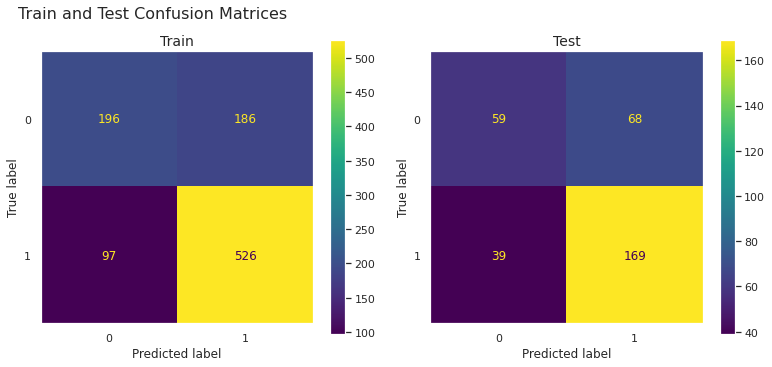

__________________________________________________________________________________________
Treino
              precision    recall  f1-score   support

           0       0.67      0.51      0.58       382
           1       0.74      0.84      0.79       623

    accuracy                           0.72      1005
   macro avg       0.70      0.68      0.68      1005
weighted avg       0.71      0.72      0.71      1005

__________________________________________________________________________________________
Teste
              precision    recall  f1-score   support

           0       0.60      0.46      0.52       127
           1       0.71      0.81      0.76       208

    accuracy                           0.68       335
   macro avg       0.66      0.64      0.64       335
weighted avg       0.67      0.68      0.67       335

__________________________________________________________________________________________


In [54]:
data = (X_train, X_test, y_train, y_test)

show_metrics_of(grid_mlp, *data, model_name='MLP')

In [55]:
grid_mlp.best_params_

{'mlp__optimizer': 'Nadam',
 'mlp__n_units': [10, 15, 5],
 'mlp__epochs': 75,
 'mlp__dropout': True,
 'mlp__batch_size': 5}

## Discussão dos Modelos Treinados

Vamos compilar os scores dos modelos em um Dataframe para poder compará-los.

In [56]:
X_train, X_test, y_train, y_test, pre_processor = pre_process(columns=final_selection)

In [57]:
# cria um dicionário com os modelos treinados
models = dict(lr=grid_lr, 
              svc=grid_svc, 
              gb=grid_gb, 
              ppn=pipe_ppn, 
              mlp_1=grid_mlp_1,
              mlp=grid_mlp)

In [58]:
# dicionario para armazenar os scores de treino e testes dos modelos
dicts = {
    'train': {
        'data': (X_train, y_train),
        'scores': []
    }, 
    'test': {
        'data': (X_test, y_test),
        'scores': []
    }
}

In [59]:
# obtém a média ponderada do f1-score para um dado modelo.
def get_score(model, X, y):
    w = 'weighted avg'
    f = 'f1-score'
    
    y_pred = model.predict(X)
    
    return classification_report(y, y_pred, output_dict=True)[w][f]

In [60]:
# inclui o score de cada modelo e tipo de dado no dicionario dicts. 
for m in models:
    for k in dicts:
        score = get_score(models[m], *dicts[k]['data'])
        dicts[k]['scores'].append(score)

11/11 [==============================] - 0s 917us/step


In [61]:
# sumariza a pontuação e cria um Dataframe
scores = dict(train=dicts['train']['scores'], 
              test=dicts['test']['scores'])
    
results = pd.DataFrame(scores, index=models.keys())

results

train     test
lr    0.692097 0.690748
svc   0.694710 0.687140
gb    0.774018 0.711657
ppn   0.669131 0.646468
mlp_1 0.712314 0.680982
mlp   0.709230 0.670421

Excetuando-se o perceptron, todos os demais modelos tiveram desempenhos próximos uns dos outros.

Vemos que o modelo com a melhor pontução "f1" ponderada, foi o Gradient Boosting. Por outro lado, este modelo foi o que mais caminhou no sentido de sobreajustar os dados (*overfitting*).

Dos demais modelos, nenhum apresentou sobreajuste.

De modo geral, pode-se dizer que todos tiveram bom desempenho.

Para finalizar, a ideia inicial era testar os modelos considerando todas as variáveis do *dataset* e não apenas aquelas selecionadas antes das modelagens.

Mas vamos verificar apenas com o modelo de melhor desempenho o que acontece quando consideramos todas as variáveis do *dataset*.

Primeiro vamos verificar os hiperparâmetros encontrados e rodar um modelo com eles considerando todas as *features*

In [62]:
grid_gb.best_params_

{'gb__n_estimators': 600, 'gb__max_depth': 1, 'gb__loss': 'log_loss'}

==================================== Gradient Boosting ====================================


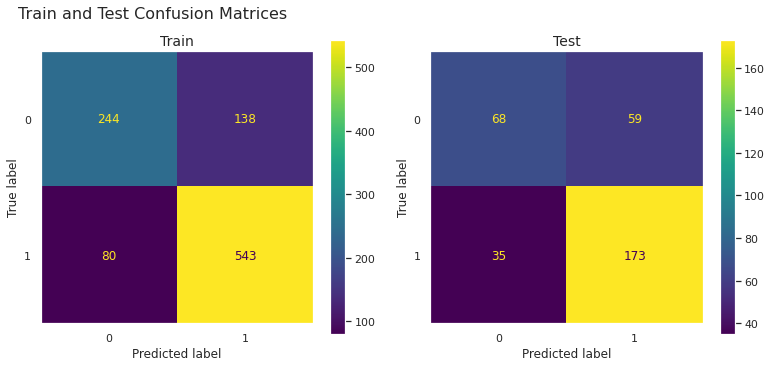

__________________________________________________________________________________________
Treino
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       382
           1       0.80      0.87      0.83       623

    accuracy                           0.78      1005
   macro avg       0.78      0.76      0.76      1005
weighted avg       0.78      0.78      0.78      1005

__________________________________________________________________________________________
Teste
              precision    recall  f1-score   support

           0       0.66      0.54      0.59       127
           1       0.75      0.83      0.79       208

    accuracy                           0.72       335
   macro avg       0.70      0.68      0.69       335
weighted avg       0.71      0.72      0.71       335

__________________________________________________________________________________________


In [64]:
X_train, X_test, y_train, y_test, pre_processor = pre_process()

pipe_gb = Pipeline([('pre_proc', pre_processor), 
                     ('gb', GradientBoostingClassifier(random_state=42, 
                                                       n_estimators=600, 
                                                       max_depth=1, 
                                                       loss='log_loss'))])

pipe_gb.fit(X_train, y_train)

data = (X_train, X_test, y_train, y_test)

show_metrics_of(pipe_gb, *data, model_name='Gradient Boosting')

Não melhorou o desempenho e ainda causou um leve aumento de *overfitting*.

Agora vamos fazer um busca aleatória por melhores parâmetros.

==================================== Gradient Boosting ====================================


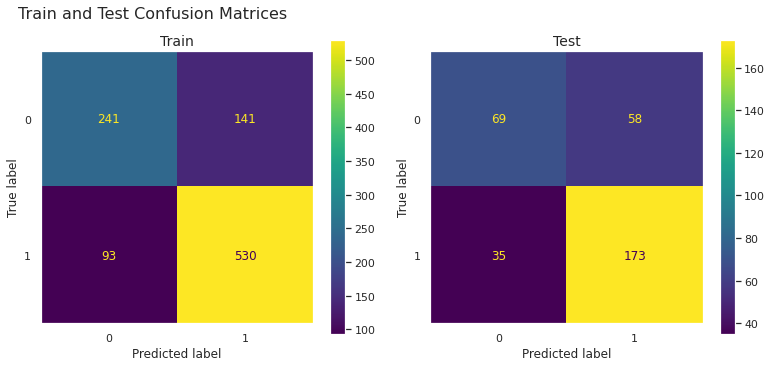

__________________________________________________________________________________________
Treino
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       382
           1       0.79      0.85      0.82       623

    accuracy                           0.77      1005
   macro avg       0.76      0.74      0.75      1005
weighted avg       0.76      0.77      0.76      1005

__________________________________________________________________________________________
Teste
              precision    recall  f1-score   support

           0       0.66      0.54      0.60       127
           1       0.75      0.83      0.79       208

    accuracy                           0.72       335
   macro avg       0.71      0.69      0.69       335
weighted avg       0.72      0.72      0.72       335

__________________________________________________________________________________________


In [65]:
X_train, X_test, y_train, y_test, pre_processor = pre_process()

pipe_gb = Pipeline([('pre_proc', pre_processor), 
                     ('gb', GradientBoostingClassifier(random_state=42))])

params_gb = {
    'gb__loss' : ['log_loss', 'exponential'],
    'gb__n_estimators' : range(100, 1000, 100),
    'gb__max_depth' : range(1, 5)
}

grid_gb_all = RandomizedSearchCV(estimator=pipe_gb, 
                             param_distributions=params_gb, 
                             cv=splitter, 
                             n_iter=40, 
                             scoring='f1_weighted',
                             random_state=42, 
                             n_jobs=-1)

grid_gb_all.fit(X_train, y_train)

data = (X_train, X_test, y_train, y_test)

show_metrics_of(grid_gb_all, *data, model_name='Gradient Boosting')

Conseguimos uma pequena melhora de pontuação f1: de 0.71 para 0.72 no teste.

Vejamos os parâmetros escolhidos.

In [66]:
grid_gb_all.best_params_

{'gb__n_estimators': 400, 'gb__max_depth': 1, 'gb__loss': 'exponential'}